#Full ML Report (1hr+ runtime(Run All))

## Abstract



Counter-Strike: Global Offensive (CS:GO) is a multiplayer tactical first-person shooter developed by Valve and Hidden Path Entertainment. Counter-Strike: Global Offensive is a tactical shooter that emphasizes teamwork, strategy, and gunplay. Winning a game requires extensive teamwork, as well as personal economy management.

CS:GO’s primary game mode for its casual and competitive queues is bomb defusal. Each round, a team of terrorists must take the bomb and plant it on one of two bomb sites. The team of counter-terrorists are tasked with stopping them from planting, or defusing the bomb after it’s planted. If the bomb explodes, or if the terrorists kill all the CTs, then they win the round. If the CTs kill all the terrorists before the bomb is planted, or defuse the bomb after its planted, then they win. A CT can defuse the bomb even if other terrorists are still alive. If the bomb isn’t planted and players from both sides are alive at the end of a round, the CTs win that round.

At the beginning of the round, each player has to buy their equipment, consisting of weapons, armor, and grenades. There are five categories of purchasable weaponry: rifles, submachine guns, "heavy" weaponry (light machine guns and shotguns), pistols, and grenades. Players can choose between full or half armor, a handful of grenades, and several weapons. Players will earn money each round, and can earn additional money for killing players and fulfilling objectives like planting or defusing the bomb.

The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset

• Which independent variables are useful to predict a target (dependent variable)?

• Which independent variables have missing data? How much

• Do the training and test sets have the same data?

• In the predictor variables independent of all the other predictor variables?

• Which predictor variables are the most important?

• Do the ranges of the predictor variables make sense?

• What are the distributions of the predictor variables?

## Aim:

In this assignment we aim to create a complete ML project with

Checking Data Quality

Feature Selection

Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning

Model Interpretibility

Reports and Visualizations

## What question are you trying to answer? How did you frame it as an ML task?

The question I am trying to answer is how to predict the round winner in Counter-Strike: Global Offensive (CSGO) based on various factors such as armors, weapons, and utility.


To frame this as an ML task, we can approach it as a binary classification problem where the goal is to predict whether the round will be won by the Terrorists or the Counter-Terrorists. We can use a supervised learning approach where we train a model on a labeled dataset of historical match data.


We can use various features such as the weapons and equipment owned by each player at the start of the round, the positions of the players, and the historical performance of each team to predict the round winner. We can preprocess the data by encoding categorical features such as weapon types using one-hot encoding and scaling numerical features using standardization.


We can then train various machine learning models on the preprocessed data. We can evaluate the performance of these models using metrics such as accuracy, precision, recall, and F1-score on a validation dataset.


Once we have trained and evaluated the model, we can use it to predict the round winner in real-time during a CSGO match by inputting the features of the current round and outputting the predicted winner.

## What is human-level performance on that task? What level of performance is needed?

Determining the human-level performance on the task of predicting the round winner in CSGO based on armors, weapons, and other utilities is difficult to quantify precisely, as it depends on various factors such as the skill level of the player and the complexity of the match scenario.


However, in general, we can consider a professional CSGO player's performance as the benchmark for human-level performance. Professional players are highly skilled and experienced in the game and can predict the round winner based on various factors such as team compositions, strategies, and player performances. Therefore, we can consider their performance as the standard for human-level performance on this task.


In terms of the level of performance needed for a machine learning model to be useful in predicting the round winner, we can aim to achieve a performance that is comparable to or better than human-level performance. However, it is essential to note that achieving human-level performance does not necessarily guarantee that the model will be accurate in all scenarios, as the complexity of the game can make it challenging to predict the outcome accurately.


Therefore, we need to evaluate the performance of the model on a test dataset that represents a diverse range of scenarios and situations to ensure that it can perform accurately in different contexts. We can aim for a high accuracy, precision, recall, and F1-score in predicting the round winner, indicating that the model can effectively distinguish between the two teams and accurately predict the winner.

## Where did the feature data and label come from?

The dataset was originally published by Skybox as part of their CS:GO AI Challenge, running from Spring to Fall 2020. The data set consists of ~700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot have been recorded every 20 seconds until the round is decided. Following the initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411.

## Import all the packages that we may need.

In [ ]:
#importing the libraries
from math import ceil
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from statsmodels.stats import outliers_influence
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

pd.set_option('max_colwidth', 400)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## About this Dataset: 



The dataset consists of round snapshots from about 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot has been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.

## Variable Definition Key



time_left - The time left in the current round.

ct_score - The current score of the Counter-Terrorist team.

t_score - The current score of the Terrorist team.

map - The map the round is being played on. E.g. de_dust2, de_inferno and de_overpass

bomb_planted - If the bomb has been planted or not. False = No, True = Yes

ct_health - The total health of all Counter-Terrorist players. Player health in range 0-100.

t_health - The total health of all Terrorist players. Player health in range 0-100.

ct_armor - The total armor of all Counter-Terrorist players.

t_armor - The total armor of all Terrorist players.

ct_money - The total bankroll of all Counter-Terrorist players. Amount in USD.

t_money - The total bankroll of all Terrorist players. Amount in USD.

ct_helmets - Number of helmets on the Counter-Terrorist team.

t_helmets - Number of helmets on the Terrorist team.

ct_defuse_kits - Number of defuse kits on the Counter-Terrorist team.

ct_players_alive - Number of alive players on the Counter-Terrorist team. Range 0 to 5.

t_players_alive - Number of alive players on the Terrorist team. Range 0 to 5.

ct_weapon_X - Weapon X count on Counter-Terrorist team. E.g. Ak47, Deagle and UMP45.

t_weapon_X - Weapon X count on Terrorist team. E.g. Ak47, Deagle and UMP45.

ct_grenade_X - Grenade X count on Counter-Terrorist team. E.g. HeGrenade, Flashbang.

t_grenade_X - Grenade X count on Terrorist team. E.g. HeGrenade, Flashbang.

round_winner - Winner. CT = Counter-Terrorist, T = Terrorist

## Exploratory Data Analysis (EDA)

### Reading the Dataset and understanding

In [ ]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("https://raw.githubusercontent.com/7srik/Auto_ML_CSGO_Round_Winner/main/csgo_round_snapshots.csv")
data2=pd.read_csv("https://raw.githubusercontent.com/7srik/Auto_ML_CSGO_Round_Winner/main/csgo_round_snapshots.csv")

data.name = "data"
data.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00         0        0  de_dust2         False        500       500   
1     156.03         0        0  de_dust2         False        500       500   
2      96.03         0        0  de_dust2         False        391       400   
3      76.03         0        0  de_dust2         False        391       400   
4     174.97         1        0  de_dust2         False        500       500   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0         0        0      4000  ...                    0   
1       400      300       600  ...                    0   
2       294      200       750  ...                    0   
3       294      200       750  ...                    0   
4       192        0     18350  ...                    0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                        0                       0   
1                        0                       2   
2                        0                       2   
3                        0                       0   
4                        0                       0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                        0                       0            CT  
1                        0                       0            CT  
2                        0                       0            CT  
3                        0                       0            CT  
4                        0                       0            CT  

[5 rows x 97 columns]

### What are the data types? (Only numeric and categorical)

In [ ]:
#Data types of the columns present in the DataSet
data.dtypes

time_left                    float64
ct_score                       int64
t_score                        int64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade      int64
t_grenade_molotovgrenade       int64
ct_grenade_decoygrenade        int64
t_grenade_decoygrenade         int64
round_winner                  object
Length: 97, dtype: object

"info()" method provides a summary of the data in the dataframe, including the number of non-null values in each column, the data type of each column, and the amount of memory used by the dataframe. This information can be useful for understanding the structure and contents of a dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

 ### Are there missing values?

In [ ]:
# printing number of rows in each feature
data.count()

time_left                    122410
ct_score                     122410
t_score                      122410
map                          122410
bomb_planted                 122410
                              ...  
ct_grenade_molotovgrenade    122410
t_grenade_molotovgrenade     122410
ct_grenade_decoygrenade      122410
t_grenade_decoygrenade       122410
round_winner                 122410
Length: 97, dtype: int64

In [ ]:
#checking if the any data is missing
np.sum(data.isnull().sum())

0

In [ ]:
# We need to check NaN values in dataset
data.isna().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

### Are there any duplicate values?

In [ ]:
print(data.duplicated().value_counts()) 

False    117448
True       4962
dtype: int64


There are 4962 Duplicate entries in our Dataset, So we need to delete the duplicates for better understanding and predictions.

In [ ]:
#Duplicates have been dropped 
data = data.drop_duplicates()
data2 = data2.drop_duplicates()

In [ ]:
print(data.duplicated().value_counts()) 

False    117448
dtype: int64


### What are the distributions of the dependent variable?   

Understanding our dependent variable (or) output variable. 'round_winner' is a categorical variable with either CT or T as value.

Suggesting if the round is won by CT or T

In [ ]:
# Lets count numbers of row for 'round_winner' type
data.groupby("round_winner").size()

round_winner
CT    57507
T     59941
dtype: int64

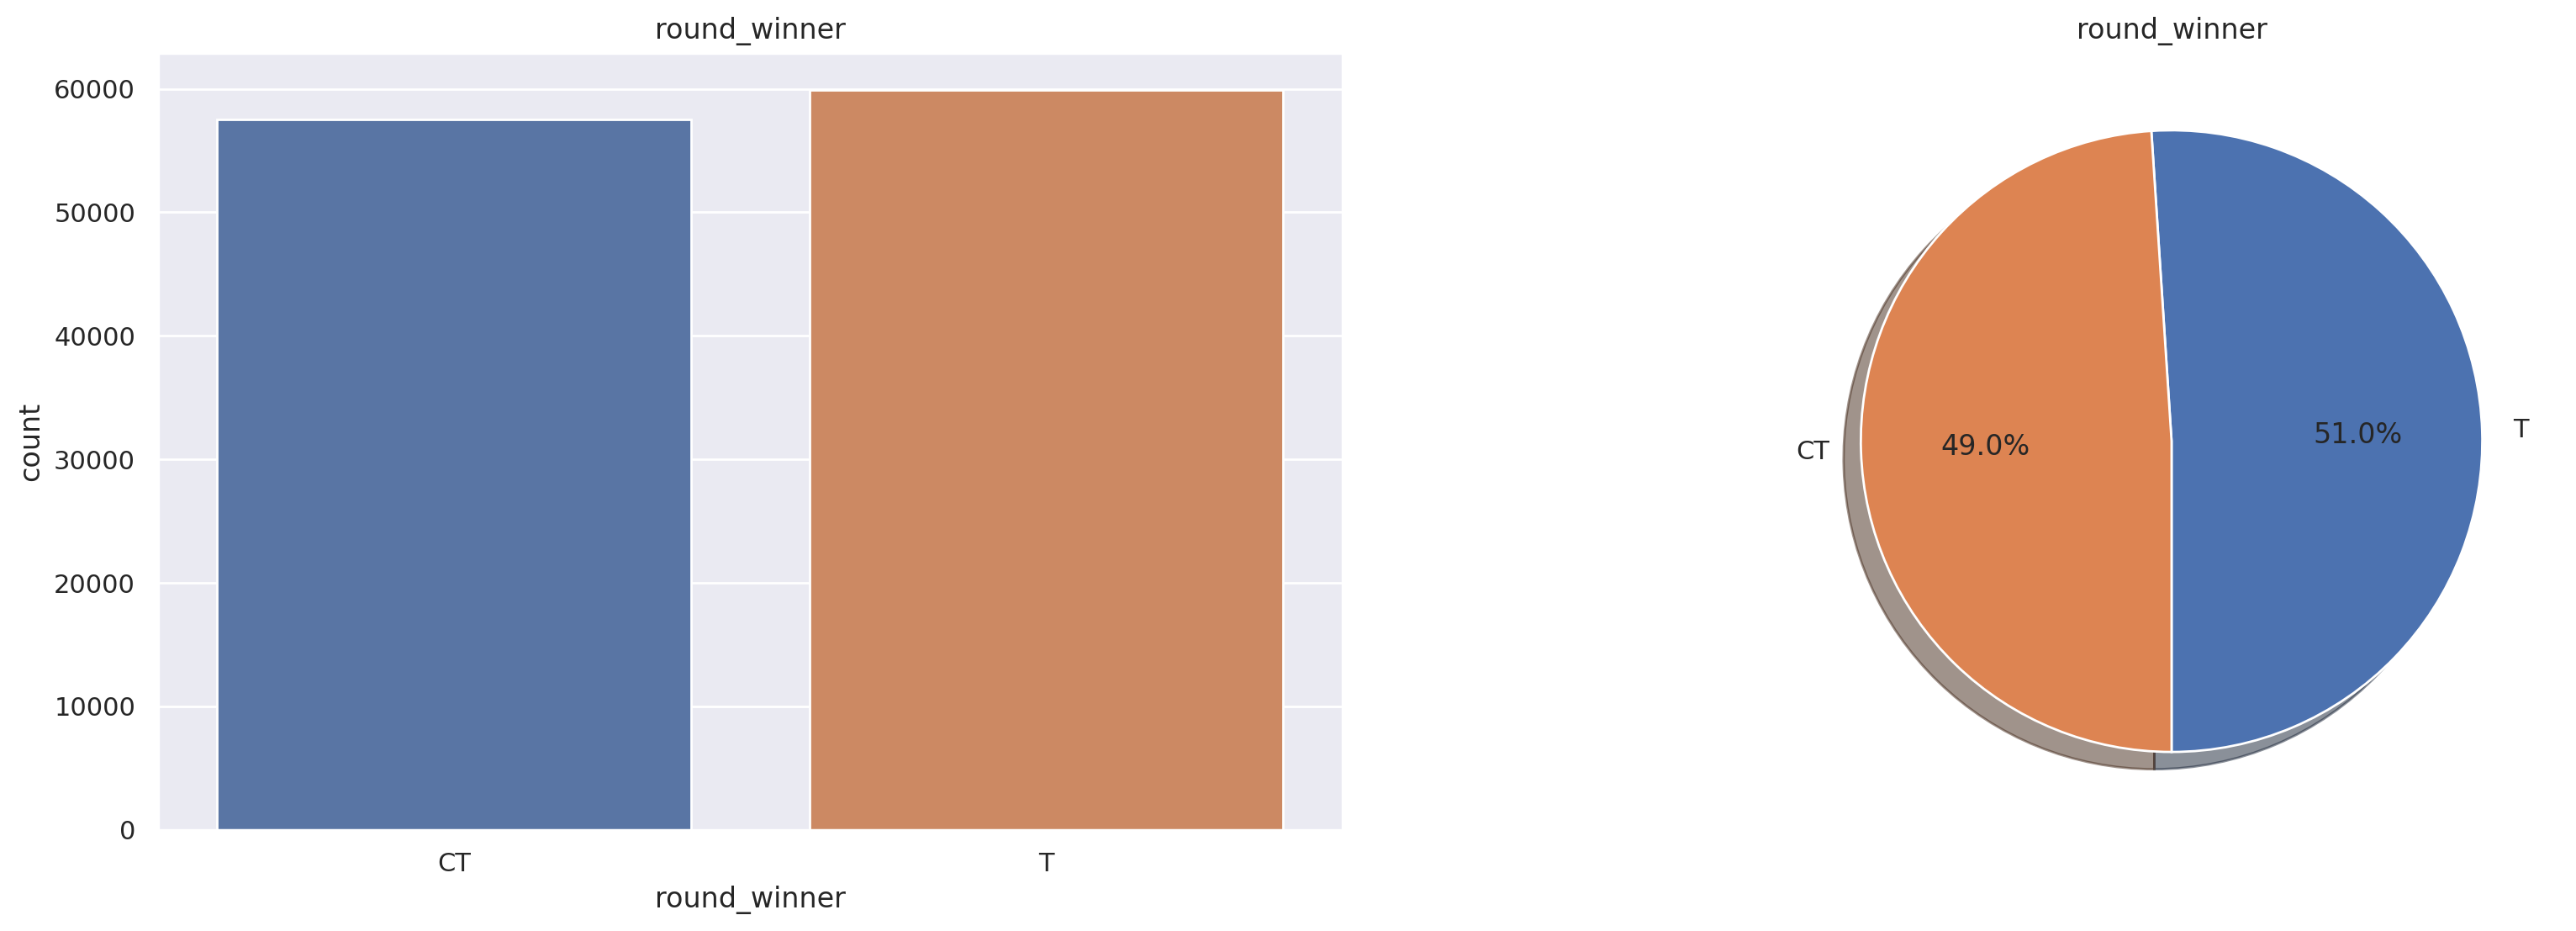

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='round_winner',data=data)
plt.title("round_winner")
plt.subplot(1,2,2)
labels =data['round_winner'].value_counts(sort = True).index
sizes = data['round_winner'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('round_winner',size = 12)
plt.show()

create a visualization using the Python libraries Matplotlib and Seaborn to display the distribution of the 'round_winner' variable in a dataset called 'data'.

Seaborn's countplot function to create a bar chart showing the count of each category in the 'round_winner' variable, and sets the title of the plot to "round_winner".

creates a pie chart using Matplotlib's pie function, using the value counts of the 'round_winner' variable as the sizes and the categories as the labels. The autopct argument specifies the format of the percentage labels on the chart, while the shadow and startangle arguments specify additional visual properties of the chart.


## What kind of data exploration did you do?

Preliminary findings from the EDA.

Datatype Check - All the features in the dataset are Integers/ Float.

Missing Data Check - Our Dataset Didn't had any missing values in any of the features.

Distribution of training data - I checked the probability distribution of each and every feature in the training dataset

Duplicate Values Check - Dataset has some duplicate values and have deleted these duplicate values

and also plots to visualize distribution of round winner who won how many rounds.

## Data Cleaning


This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.

## Handling Missing Data

In any ML modeling task, one of the very important task is to check if we have any missing values in our dataset. If there are missing values in the dataset it can horribly change the results and make our model inefficient.

But there are ways to tackle this problem, we will discuss these methods in a bit detail below

## Converting categorical data of some features into Numerical data

Changing the values of round_winner from CT or T to 0 or 1

In [ ]:
encoder = LabelEncoder()
data['round_winner'] = encoder.fit_transform(data['round_winner'])
winner_mappings = {index: label for index, label in enumerate(encoder.classes_)}

Assigning each map an integer value,

In [ ]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [ ]:
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

Changing the values of bomb_planted from False or True to 0 or 1

In [ ]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

### What are the likely distributions of the numeric variables?

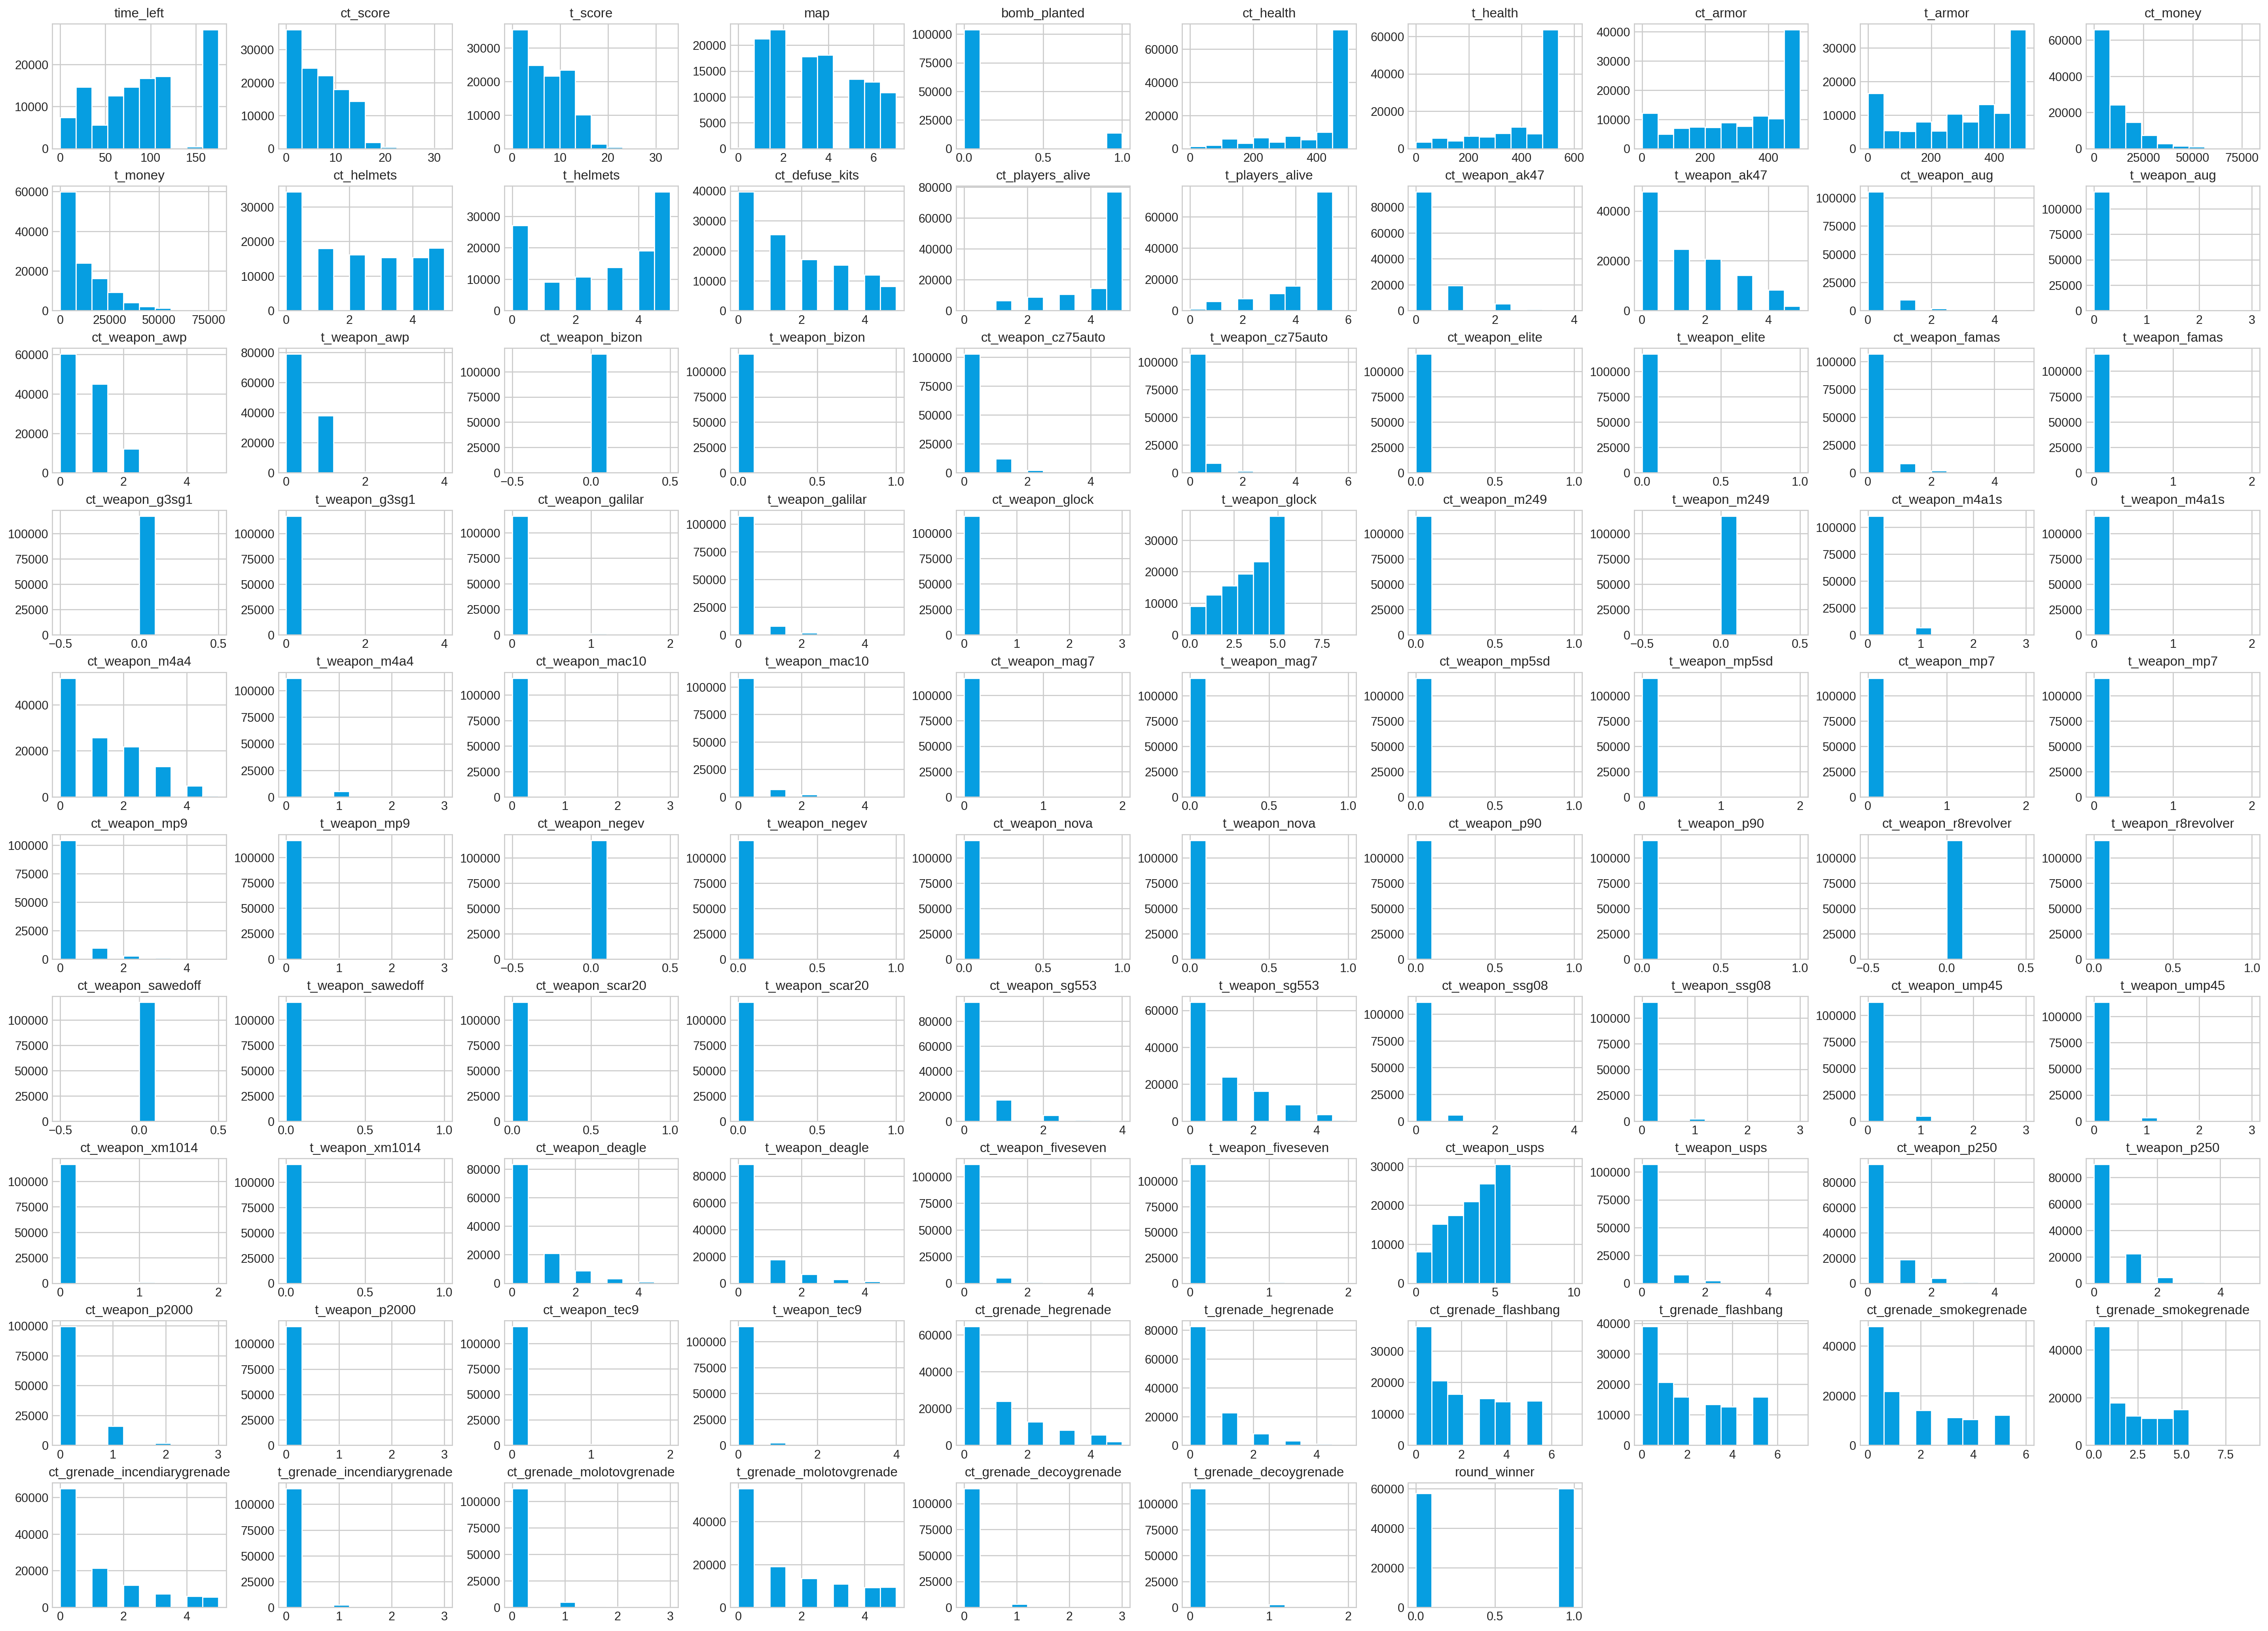

In [ ]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=10, figsize=(36,26), color='#069EE1')
plt.show();

## How to handle missing data - Data Imputation techniques

1)Delete rows with missing data

2)Fill the missing data points by either mean/mode/median

Model a regression with rest of the feature as input and the missing value as the target i.e. MICE Imputation
Our dataset doesn't have any missing values, lets deliberately create some missing values and have a comparative analysis of how effectively each method is recovering the data back.


We will remove 1%, 5% and 10% of the data from alcohol in our dataset and see how well Mean Imputation and MICE imputation will recover the data back

In [ ]:
df_imputation = data.copy()
# Creating three extra coloumns of Alcohol for performing Data Imputation techniques
df_imputation["round_winner_1_percent"] = df_imputation[["round_winner"]]
df_imputation["round_winner_5_percent"] = df_imputation[["round_winner"]]
df_imputation["round_winner_10_percent"] = df_imputation[["round_winner"]]

In [ ]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["round_winner_1_percent"] = mm_impute_train_df[
        "round_winner_1_percent"
    ].fillna(mm_impute_train_df["round_winner"].mean())
    mm_impute_train_df["round_winner_5_percent"] = mm_impute_train_df[
        "round_winner_5_percent"
    ].fillna(mm_impute_train_df["round_winner"].mean())
    mm_impute_train_df["round_winner_10_percent"] = mm_impute_train_df[
        "round_winner_10_percent"
    ].fillna(mm_impute_train_df["round_winner"].mean())
    return mm_impute_train_df


# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) * 100
    avg_change = (percent_change.sum() / percent_change.count()) 
    return avg_change

In [ ]:
# Checking for % missing values in dataset
print(get_percent_missing(df_imputation))

                                     column_name  percent_missing
time_left                              time_left              0.0
ct_score                                ct_score              0.0
t_score                                  t_score              0.0
map                                          map              0.0
bomb_planted                        bomb_planted              0.0
...                                          ...              ...
t_grenade_decoygrenade    t_grenade_decoygrenade              0.0
round_winner                        round_winner              0.0
round_winner_1_percent    round_winner_1_percent              0.0
round_winner_5_percent    round_winner_5_percent              0.0
round_winner_10_percent  round_winner_10_percent              0.0

[100 rows x 2 columns]


In [ ]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(df_imputation, 0.01, "round_winner_1_percent")
create_missing(df_imputation, 0.05, "round_winner_5_percent")
create_missing(df_imputation, 0.1, "round_winner_10_percent")

In [ ]:
# Performing Mean Imputation
mm_imputed_df_imputation = mean_impute(df_imputation)

For MICE imputation, we have to be carefull and create three different dataframes for all three configuration, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity which will mislead the regression model and result in bad imputation

In [ ]:
# Dataframe for 1% missing value
df_imputation_1_percent = df_imputation.drop(
    ["round_winner", "round_winner_5_percent", "round_winner_10_percent"], axis=1
)
# Dataframe for 5% missing value
df_imputation_5_percent = df_imputation.drop(
    ["round_winner", "round_winner_1_percent", "round_winner_10_percent"], axis=1
)
# Dataframe for 10% missing value
df_imputation_10_percent = df_imputation.drop(
    ["round_winner", "round_winner_1_percent", "round_winner_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
mice_imputed_df_imputation_1_percent = mice_impute(df_imputation_1_percent)
# Performing Imputation on Dataframe with 5% missing values
mice_imputed_df_imputation_5_percent = mice_impute(df_imputation_5_percent)
# Performing Imputation on Dataframe with 10% missing values
mice_imputed_df_imputation_10_percent = mice_impute(df_imputation_10_percent)

Lets see how our imputation methods have recovered the data

In [ ]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["round_winner"],
        mm_imputed_df_imputation["round_winner_1_percent"],
    )
)

# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["round_winner"],
        mice_imputed_df_imputation_1_percent["round_winner_1_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["round_winner"],
        mm_imputed_df_imputation["round_winner_5_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["round_winner"],
        mice_imputed_df_imputation_5_percent["round_winner_5_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["round_winner"],
        mm_imputed_df_imputation["round_winner_10_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["round_winner"],
        mice_imputed_df_imputation_10_percent["round_winner_10_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using Mean Imputation
0.4997074276909007
Average % error on residuals for 1% missing data imputed using MICE Imputation
49.58646912776113
Average % error on residuals for 5% missing data imputed using Mean Imputation
2.499370933780845
Average % error on residuals for 5% missing data imputed using MICE Imputation
49.66214992087231
Average % error on residuals for 10% missing data imputed using Mean Imputation
4.996741357588129
Average % error on residuals for 10% missing data imputed using MICE Imputation
49.598994925651425


## Interpreting the Imputation Methods

From the above 6 readings we can conclude that the MICE imputation works well when compared to the Mean imputation method as the imputed value is a function of rest of the features.

We can also observe that the % error of residuals increase as the missing data points increase. From this we can conclude that if we have less missing data in the dataset, more perfectly it is imputed back by the imputation method.

## Why Imputing data is always better than deleting the row ?

For obvious reason - Data Loss. When we delete a row we end up deleting a sample from training data which will do more harm to the model instead of doing any good.

Selecting of imputation method is really a personal choice, although from the above analysis we can come to the conclusion that MICE does a better job in getting the databack, but after creating a model it hardly has any positive effects on the accuracy of model. But it is always a better choice to use MICE as it can give you the closest possible value.

## Divinding the data into dependent and independent variables

here y is the dependent variable. and x is culmination of all the independent variables.

In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
x=data
y=data['round_winner']
x=data.drop('round_winner', axis=1) # features

## Scaling all the independent variables for better training of the data.

In [ ]:
scaler = RobustScaler()
x = scaler.fit_transform(x)
pd.DataFrame(x)

0         1      2         3    4         5         6   \
0       1.334055 -0.857143 -0.750 -0.666667  0.0  0.000000  0.000000   
1       1.018152 -0.857143 -0.750 -0.666667  0.0  0.000000  0.000000   
2       0.018984 -0.857143 -0.750 -0.666667  0.0 -0.664634 -0.523560   
3      -0.314072 -0.857143 -0.750 -0.666667  0.0 -0.664634 -0.523560   
4       1.333555 -0.714286 -0.750 -0.666667  0.0  0.000000  0.000000   
...          ...       ...    ...       ...  ...       ...       ...   
117443 -1.323564  0.714286  1.000  1.000000  1.0 -1.829268 -1.350785   
117444  1.332889  0.714286  1.125  1.000000  0.0  0.000000  0.000000   
117445  0.333722  0.714286  1.125  1.000000  0.0  0.000000  0.000000   
117446  0.000666  0.714286  1.125  1.000000  0.0  0.000000  0.000000   
117447 -0.332390  0.714286  1.125  1.000000  0.0 -0.762195 -0.109948   

              7         8         9   ...        86        87        88  \
0      -1.308219 -1.208904 -0.138686  ... -0.666667 -0.333333 -0.333333   
1       0.061644 -0.181507 -0.386861  ... -0.666667 -0.333333 -0.333333   
2      -0.301370 -0.523973 -0.375912  ... -0.666667 -0.333333 -0.333333   
3      -0.301370 -0.523973 -0.375912  ... -0.666667 -0.333333 -0.333333   
4      -0.650685 -1.208904  0.908759  ... -0.666667 -0.333333 -0.333333   
...          ...       ...       ...  ...       ...       ...       ...   
117443 -0.640411  0.020548 -0.423358  ... -0.333333  0.333333  0.000000   
117444 -0.982877 -0.609589  0.408759  ... -0.333333  0.333333  0.000000   
117445  0.386986  0.417808 -0.343066  ...  0.666667  1.000000  0.666667   
117446  0.386986  0.417808 -0.343066  ... -0.333333  1.333333 -0.333333   
117447  0.044521  0.386986 -0.350365  ... -0.666667  0.666667 -0.333333   

              89   90   91   92        93   94   95  
0      -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
1       0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
2       0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
3      -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
4      -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
...          ...  ...  ...  ...       ...  ...  ...  
117443  0.000000  0.0  0.0  0.0 -0.333333  0.0  0.0  
117444 -0.333333  0.0  0.0  0.0 -0.333333  0.0  0.0  
117445  1.333333  0.5  0.0  0.0  1.333333  0.0  0.0  
117446  0.666667  0.0  0.0  0.0  1.000000  0.0  0.0  
117447  0.333333  0.0  0.0  0.0  0.666667  0.0  0.0  

[117448 rows x 96 columns]

## Which independent variables are useful to predict a target (dependent variable)?

The three methods we will be following are

1)Pearson Correlation

2)SelectKBest

3)Feature Importance

Creaing Pearson Correlation Heat Map

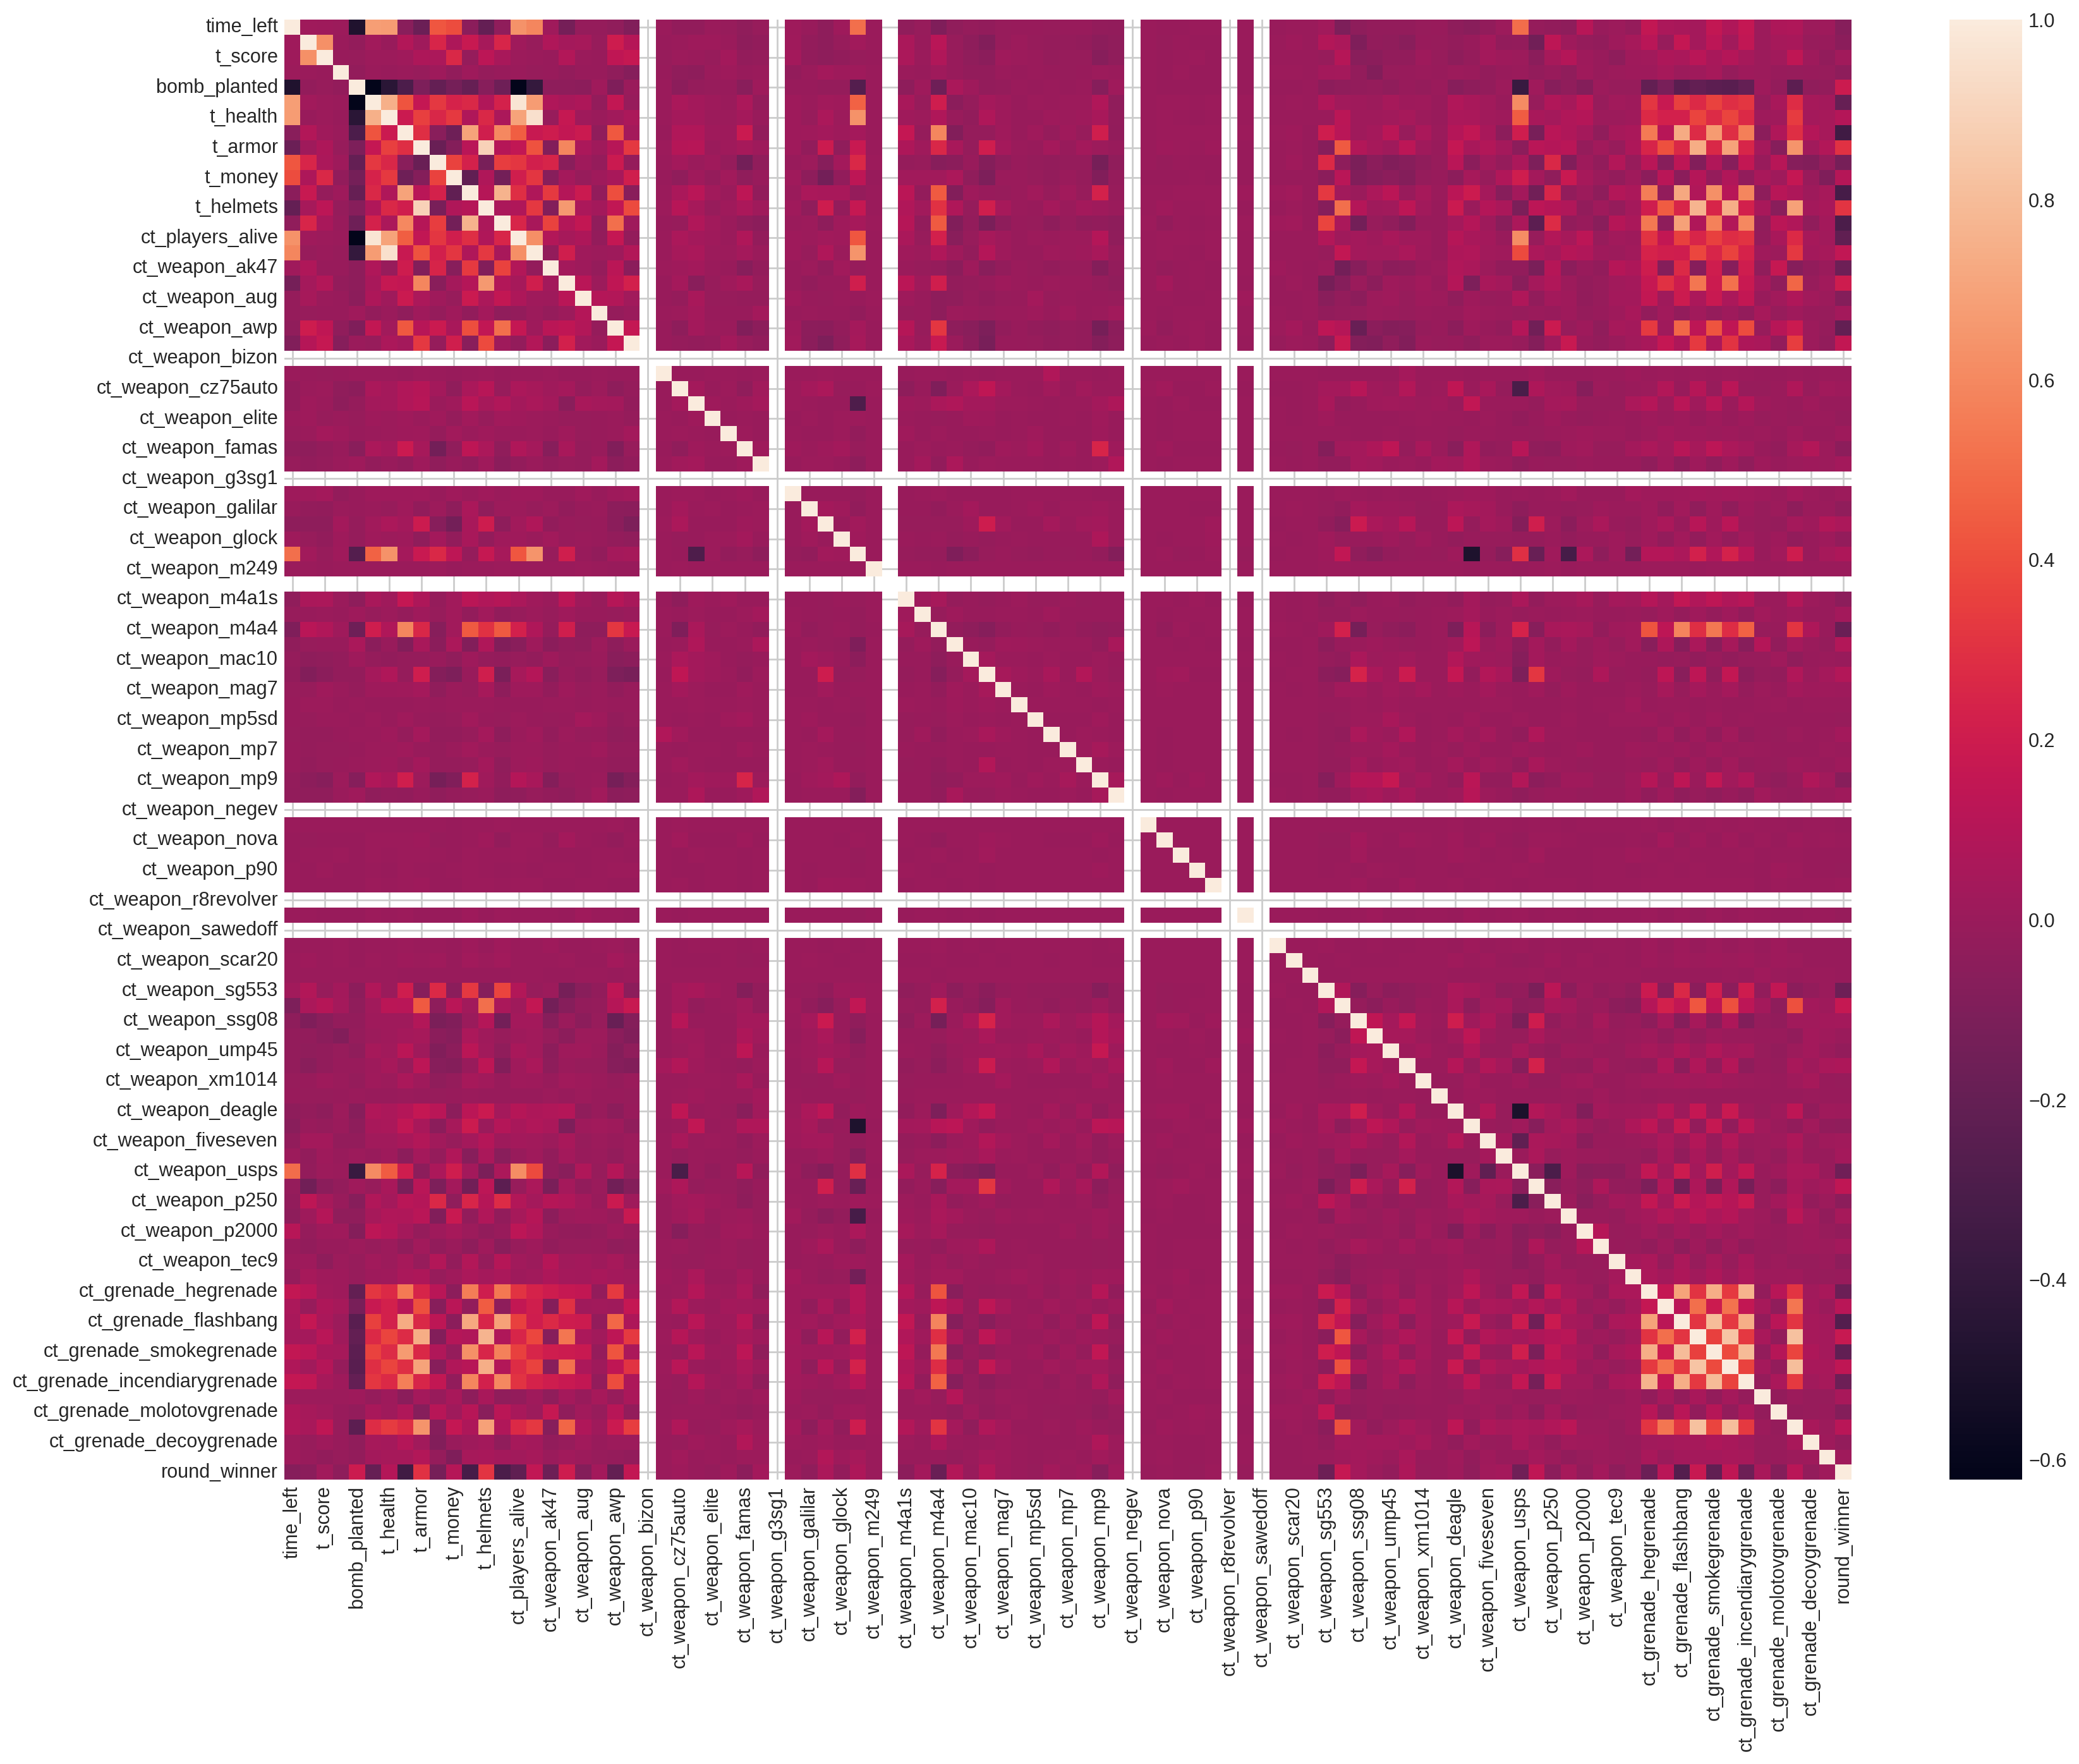

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
#checking the correlation between all the features in the data
data.corr().head()

time_left  ct_score   t_score       map  bomb_planted  \
time_left      1.000000  0.019256  0.011702  0.009349     -0.487034   
ct_score       0.019256  1.000000  0.629747 -0.000053     -0.020600   
t_score        0.011702  0.629747  1.000000 -0.005547     -0.013932   
map            0.009349 -0.000053 -0.005547  1.000000     -0.026197   
bomb_planted  -0.487034 -0.020600 -0.013932 -0.026197      1.000000   

              ct_health  t_health  ct_armor   t_armor  ct_money  ...  \
time_left      0.681461  0.673525 -0.064390 -0.173521  0.424418  ...   
ct_score       0.024748 -0.002267  0.088757  0.023988  0.247527  ...   
t_score        0.009105  0.008951  0.023156  0.072825  0.065716  ...   
map           -0.000967 -0.006786  0.003353 -0.011000  0.014725  ...   
bomb_planted  -0.616745 -0.443429 -0.296987 -0.107751 -0.199785  ...   

              t_grenade_flashbang  ct_grenade_smokegrenade  \
time_left                0.038784                 0.151979   
ct_score                 0.042539                 0.128890   
t_score                  0.113306                 0.051320   
map                      0.022635                 0.043311   
bomb_planted            -0.208201                -0.231101   

              t_grenade_smokegrenade  ct_grenade_incendiarygrenade  \
time_left                   0.075183                      0.161406   
ct_score                    0.028587                      0.146376   
t_score                     0.097498                      0.043136   
map                        -0.015453                      0.012072   
bomb_planted               -0.245254                     -0.202474   

              t_grenade_incendiarygrenade  ct_grenade_molotovgrenade  \
time_left                        0.010197                   0.071389   
ct_score                         0.007453                   0.048244   
t_score                          0.011235                   0.028763   
map                              0.005279                  -0.001524   
bomb_planted                     0.014556                  -0.024997   

              t_grenade_molotovgrenade  ct_grenade_decoygrenade  \
time_left                     0.078509                 0.011316   
ct_score                      0.054285                -0.011054   
t_score                       0.140325                 0.017125   
map                          -0.009835                -0.002059   
bomb_planted                 -0.232077                -0.034399   

              t_grenade_decoygrenade  round_winner  
time_left                   0.013931     -0.071897  
ct_score                   -0.005302     -0.057439  
t_score                    -0.027744      0.028812  
map                        -0.010189     -0.040091  
bomb_planted               -0.023669      0.191126  

[5 rows x 97 columns]

In [ ]:
data.corr().unstack().sort_values().drop_duplicates().head()

bomb_planted    ct_players_alive   -0.622296
ct_health       bomb_planted       -0.616745
ct_weapon_usps  ct_weapon_deagle   -0.504927
t_weapon_glock  t_weapon_deagle    -0.490944
time_left       bomb_planted       -0.487034
dtype: float64

In [ ]:

#Checking the correlation of input variables with the output variables.
data.corr()["round_winner"].sort_values(ascending=False)

round_winner            1.000000
t_helmets               0.312204
t_armor                 0.301770
t_weapon_ak47           0.200281
bomb_planted            0.191126
                          ...   
ct_weapon_g3sg1              NaN
t_weapon_m249                NaN
ct_weapon_negev              NaN
ct_weapon_r8revolver         NaN
ct_weapon_sawedoff           NaN
Name: round_winner, Length: 97, dtype: float64

In [ ]:
def corrFilter(bound: float):
    xCorr = data.corr()
    data_corr_Filtered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    data_corr_Flattened = data_corr_Filtered.unstack().sort_values().drop_duplicates()
    return data_corr_Flattened
corrFilter(0.4)

ct_players_alive        bomb_planted          -0.622296
ct_health               bomb_planted          -0.616745
ct_weapon_deagle        ct_weapon_usps        -0.504927
t_weapon_glock          t_weapon_deagle       -0.490944
bomb_planted            time_left             -0.487034
                                                 ...   
t_grenade_smokegrenade  t_grenade_flashbang    0.830374
t_helmets               t_armor                0.891163
t_health                t_players_alive        0.955287
ct_health               ct_players_alive       0.971247
time_left               time_left                   NaN
Length: 88, dtype: float64

From above graph and corr values we can see that above variables are highly correlated to round_winner(output).

Feature selection through SelectKBest model.

In [ ]:

# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
     

# Create feature and target variable for Classification problem
X_clf=data.drop('round_winner', axis=1) # features
y_clf=data['round_winner'] # Target variable

In [ ]:
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
# Create and fit selector
selector = SelectKBest(f_classif, k=20)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [ ]:
features_df_new.head()

bomb_planted  ct_health  ct_armor  t_armor  ct_helmets  t_helmets  \
0             0        500         0        0           0          0   
1             0        500       400      300           0          0   
2             0        391       294      200           0          0   
3             0        391       294      200           0          0   
4             0        500       192        0           0          0   

   ct_defuse_kits  ct_players_alive  ct_weapon_ak47  t_weapon_ak47  \
0               0                 5               0              0   
1               1                 5               0              0   
2               1                 4               0              0   
3               1                 4               0              0   
4               1                 5               0              0   

   ct_weapon_awp  ct_weapon_m4a4  ct_weapon_sg553  t_weapon_sg553  \
0              0               0                0               0   
1              0               0                0               0   
2              0               0                0               0   
3              0               0                0               0   
4              0               0                0               0   

   ct_weapon_usps  ct_grenade_hegrenade  ct_grenade_flashbang  \
0               4                     0                     0   
1               4                     0                     0   
2               4                     0                     0   
3               4                     0                     0   
4               4                     0                     0   

   t_grenade_flashbang  ct_grenade_smokegrenade  ct_grenade_incendiarygrenade  
0                    0                        0                             0  
1                    0                        0                             0  
2                    0                        0                             0  
3                    0                        0                             0  
4                    0                        0                             0

Indentifying predictor Significance for the SelectKBest model.



In [ ]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data['round_winner'],features_df_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          1.073e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        02:38:57   Log-Likelihood:                         -66128.
No. Observations:              117448   AIC:                                  1.323e+05
Df Residuals:                  117428   BIC:                                  1.325e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bomb_planted                     0.3911      0.004     96.734      0.000       0.383       0.399
ct_health                       -0.0002   3.98e-05     -6.061      0.000      -0.000      -0.000
ct_armor                        -0.0008   1.37e-05    -60.725      0.000      -0.001      -0.001
t_armor                          0.0010   1.73e-05     60.051      0.000       0.001       0.001
ct_helmets                      -0.0117      0.001     -8.941      0.000      -0.014      -0.009
t_helmets                        0.0426      0.002     21.561      0.000       0.039       0.046
ct_defuse_kits                  -0.0132      0.001     -9.060      0.000      -0.016      -0.010
ct_players_alive                 0.1132      0.004     27.524      0.000       0.105       0.121
ct_weapon_ak47                  -0.0164      0.002     -6.738      0.000      -0.021      -0.012
t_weapon_ak47                    0.0268      0.002     16.639      0.000       0.024       0.030
ct_weapon_awp                   -0.0381      0.002    -16.743      0.000      -0.043      -0.034
ct_weapon_m4a4                  -0.0269      0.002    -17.889      0.000      -0.030      -0.024
ct_weapon_sg553                 -0.0236      0.003     -9.247      0.000      -0.029      -0.019
t_weapon_sg553                   0.0362      0.002     21.464      0.000       0.033       0.040
ct_weapon_usps                   0.0061      0.001      5.571      0.000       0.004       0.008
ct_grenade_hegrenade             0.0003      0.002      0.168      0.867      -0.003       0.003
ct_grenade_flashbang            -0.0089      0.002     -5.836      0.000      -0.012      -0.006
t_grenade_flashbang             -0.0415      0.001    -34.038      0.000      -0.044      -0.039
ct_grenade_smokegrenade         -0.0024      0.001     -1.641      0.101      -0.005       0.000
ct_grenade_incendiarygrenade     0.0132      0.002      8.147      0.000       0.010       0.016
==============================================================================
Omnibus:                    19274.934   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4282.384
Skew:                          -0.008   Prob(JB):                         0.00
Kurtosis:                       2.065   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.26e+03. This might indicate that there are
stro

By using SelectKbest method we got above variables as predictable variables.

Feature Importance

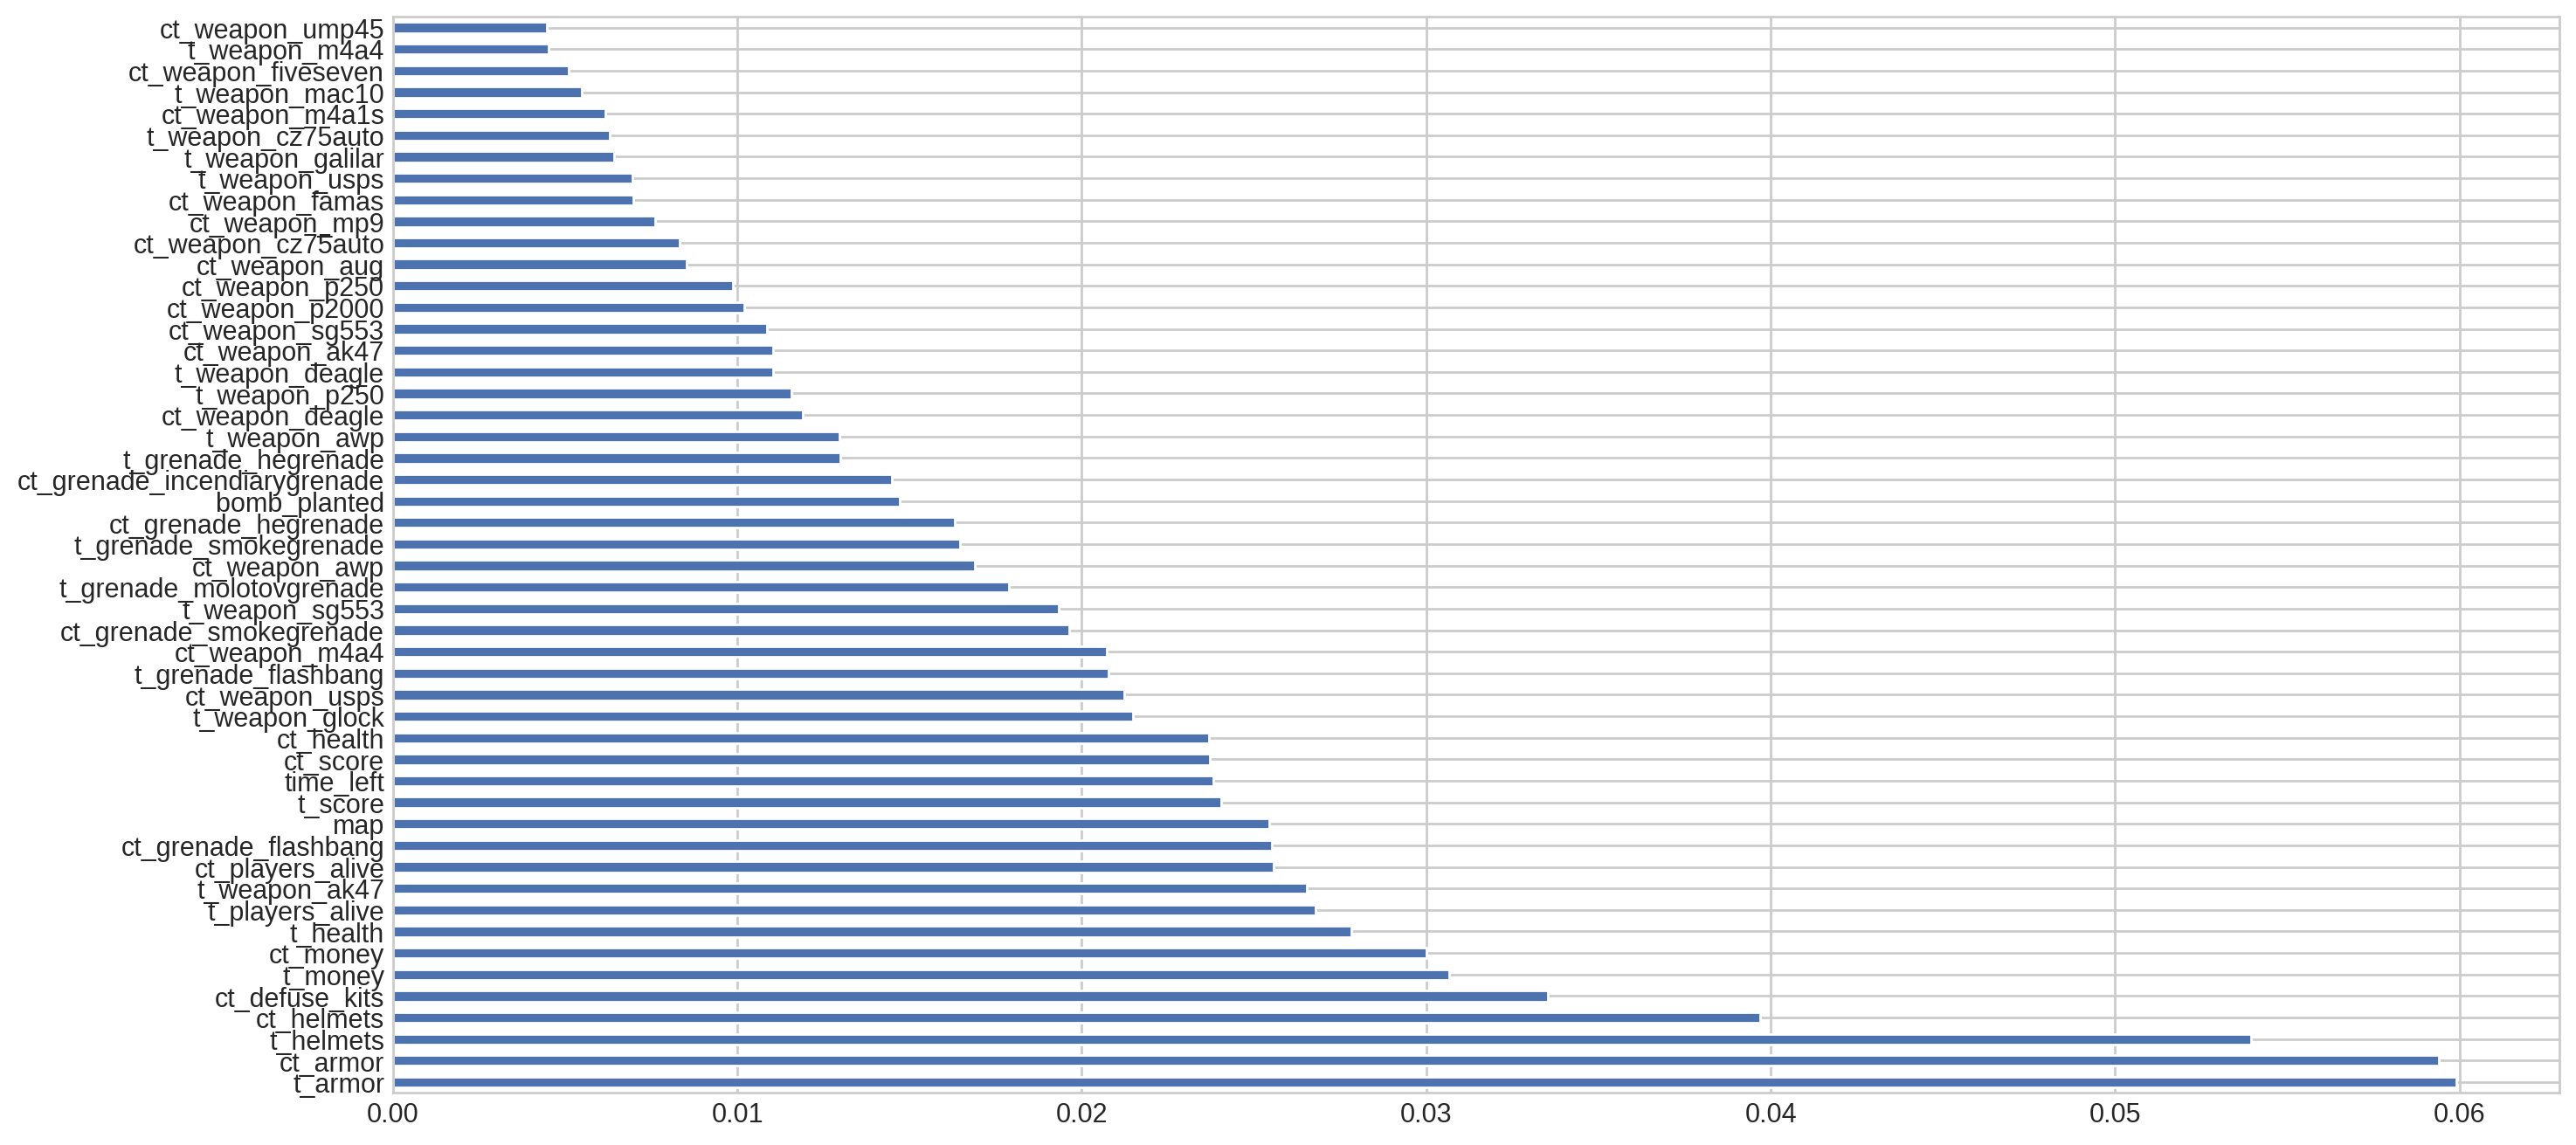

In [ ]:
y = data['round_winner']
x = data.drop('round_winner', axis=1)
model = ExtraTreesClassifier()
model.fit(x,y)
#print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

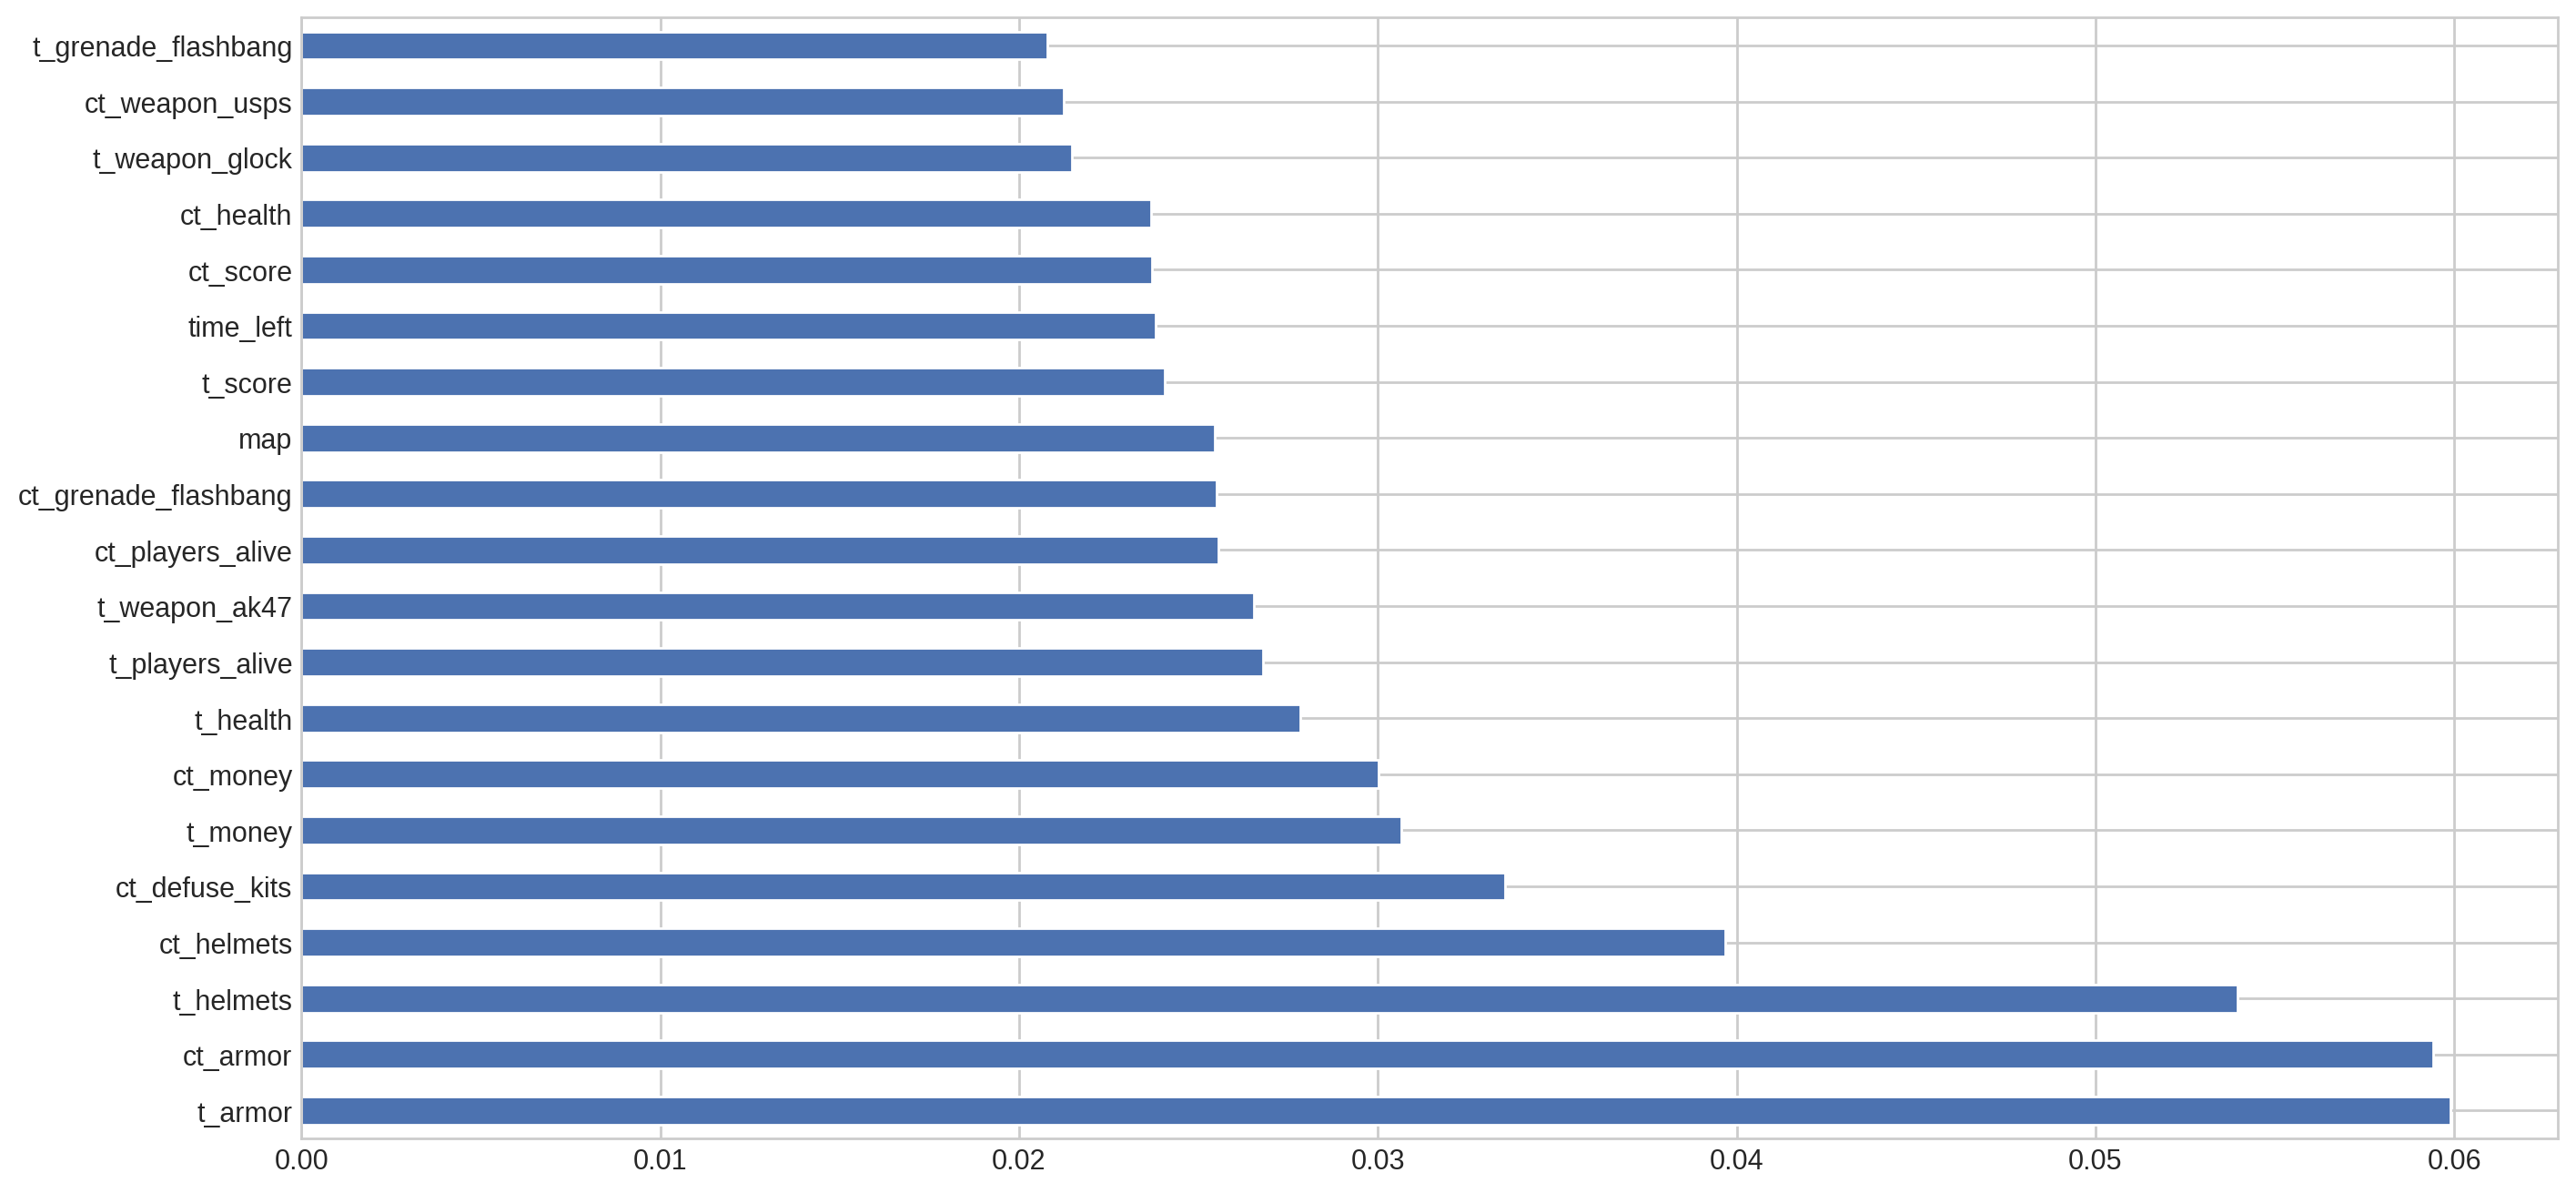

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

## Which predictor variables are the most important?

looking at the feature selection methods,

armors, 

helmets,

defuse kits, 

money, 

players alive, 

health, 

map, 

time left, 

scores up to that point, 

flashbang grenades, and 

weapons like ak47, Glock, and usps 

are given under the top 20 ranking, but looking at the total data and gameplay next 30 features are very close to each other based on there rankings. CSGO is an unpredictive game.

This code performs feature selection for a classification problem using the SelectKBest method from the scikit-learn library. It first imports the SelectKBest method along with two score functions (chi2 and f_regression) for classification and regression respectively. The code then creates a feature matrix X_clf and a target variable y_clf, and drops the target variable from the feature matrix. Next, it replaces any infinite values in the dataset with NaN values and drops any rows containing NaN values. Finally, it creates a SelectKBest object with k=20, fits the object to the feature matrix and target variable, and selects the top 20 features based on the F-value (f_classif score function) of each feature. The selected features are stored in a new dataframe called "features_df_new", which is returned by the last line of the code. This process can be used to reduce the dimensionality of a dataset and improve the accuracy and performance of machine learning models.

In [ ]:

# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
     

# Create feature and target variable for Classification problem
X_clf=data.drop('round_winner', axis=1) # features
y_clf=data['round_winner'] # Target variable

In [ ]:
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
# Create and fit selector
selector = SelectKBest(f_classif, k=20)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [ ]:
features_df_new.head()

bomb_planted  ct_health  ct_armor  t_armor  ct_helmets  t_helmets  \
0             0        500         0        0           0          0   
1             0        500       400      300           0          0   
2             0        391       294      200           0          0   
3             0        391       294      200           0          0   
4             0        500       192        0           0          0   

   ct_defuse_kits  ct_players_alive  ct_weapon_ak47  t_weapon_ak47  \
0               0                 5               0              0   
1               1                 5               0              0   
2               1                 4               0              0   
3               1                 4               0              0   
4               1                 5               0              0   

   ct_weapon_awp  ct_weapon_m4a4  ct_weapon_sg553  t_weapon_sg553  \
0              0               0                0               0   
1              0               0                0               0   
2              0               0                0               0   
3              0               0                0               0   
4              0               0                0               0   

   ct_weapon_usps  ct_grenade_hegrenade  ct_grenade_flashbang  \
0               4                     0                     0   
1               4                     0                     0   
2               4                     0                     0   
3               4                     0                     0   
4               4                     0                     0   

   t_grenade_flashbang  ct_grenade_smokegrenade  ct_grenade_incendiarygrenade  
0                    0                        0                             0  
1                    0                        0                             0  
2                    0                        0                             0  
3                    0                        0                             0  
4                    0                        0                             0

### Indentifying predictor Significance for the SelectKBest model.



This code uses the Ordinary Least Squares (OLS) method from the statsmodels library to build a linear regression model with the target variable 'round_winner' and the feature matrix 'features_df_new'. The OLS method estimates the coefficients of the linear regression model that minimize the sum of squared residuals between the predicted and actual values. The code fits the model using the fit() method and displays a summary of the model's statistics using the summary() method. The summary includes the coefficient estimates, standard errors, t-values, p-values, and other statistics for each predictor variable in the model. The p-values can be used to assess the statistical significance of each predictor variable and to determine whether to include or exclude it from the model. Overall, this code is used for statistical modeling and analysis of linear regression.

In [ ]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data['round_winner'],features_df_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                          1.073e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        02:39:26   Log-Likelihood:                         -66128.
No. Observations:              117448   AIC:                                  1.323e+05
Df Residuals:                  117428   BIC:                                  1.325e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bomb_planted                     0.3911      0.004     96.734      0.000       0.383       0.399
ct_health                       -0.0002   3.98e-05     -6.061      0.000      -0.000      -0.000
ct_armor                        -0.0008   1.37e-05    -60.725      0.000      -0.001      -0.001
t_armor                          0.0010   1.73e-05     60.051      0.000       0.001       0.001
ct_helmets                      -0.0117      0.001     -8.941      0.000      -0.014      -0.009
t_helmets                        0.0426      0.002     21.561      0.000       0.039       0.046
ct_defuse_kits                  -0.0132      0.001     -9.060      0.000      -0.016      -0.010
ct_players_alive                 0.1132      0.004     27.524      0.000       0.105       0.121
ct_weapon_ak47                  -0.0164      0.002     -6.738      0.000      -0.021      -0.012
t_weapon_ak47                    0.0268      0.002     16.639      0.000       0.024       0.030
ct_weapon_awp                   -0.0381      0.002    -16.743      0.000      -0.043      -0.034
ct_weapon_m4a4                  -0.0269      0.002    -17.889      0.000      -0.030      -0.024
ct_weapon_sg553                 -0.0236      0.003     -9.247      0.000      -0.029      -0.019
t_weapon_sg553                   0.0362      0.002     21.464      0.000       0.033       0.040
ct_weapon_usps                   0.0061      0.001      5.571      0.000       0.004       0.008
ct_grenade_hegrenade             0.0003      0.002      0.168      0.867      -0.003       0.003
ct_grenade_flashbang            -0.0089      0.002     -5.836      0.000      -0.012      -0.006
t_grenade_flashbang             -0.0415      0.001    -34.038      0.000      -0.044      -0.039
ct_grenade_smokegrenade         -0.0024      0.001     -1.641      0.101      -0.005       0.000
ct_grenade_incendiarygrenade     0.0132      0.002      8.147      0.000       0.010       0.016
==============================================================================
Omnibus:                    19274.934   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4282.384
Skew:                          -0.008   Prob(JB):                         0.00
Kurtosis:                       2.065   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.26e+03. This might indicate that there are
stro

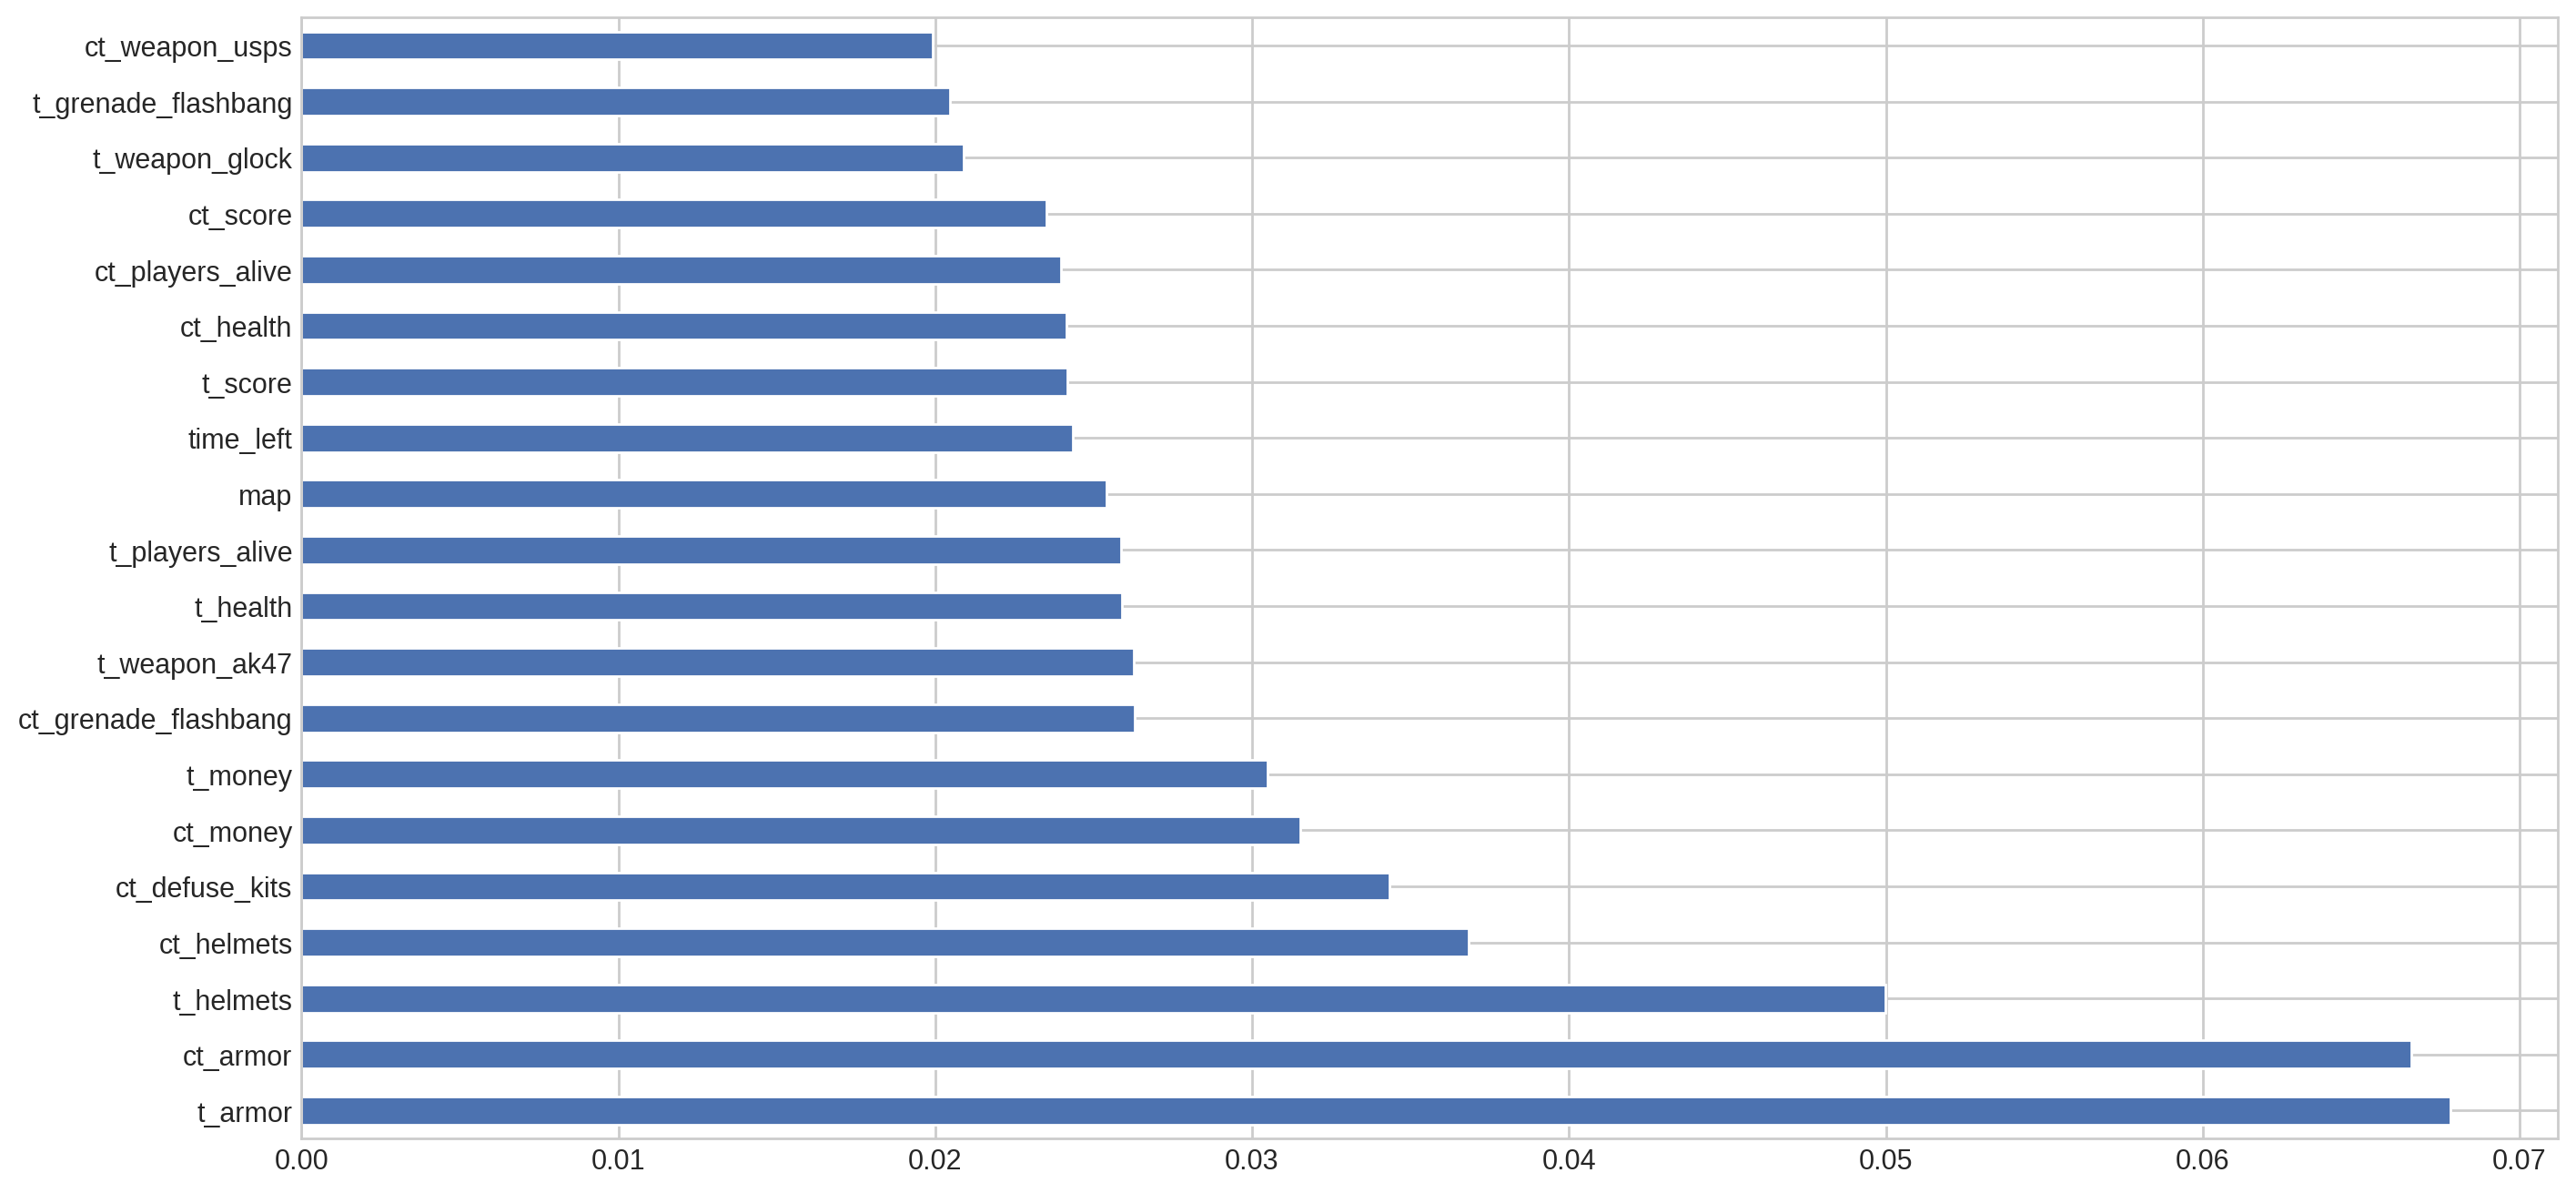

In [ ]:
y = data['round_winner']
x = data.drop('round_winner', axis=1)
model = ExtraTreesClassifier()
model.fit(x,y)
#print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

By using SelectKbest method we got above variables as predictable variables.

## In the predictor variables independent of all the other predictor variables?

Yes, all the predictor variables are independent of the other predictor variables. 

Weapons and grenades can be bought by the player with the money they have or teammates can drop/donate them. Every round minimum money is provided to each player irrespective of the win or loss. with which they can buy armor, helmets, and defuse kits. It comes to the decision made by the player

From personal experience from playing this game, the game is unpredictable and sometimes teamwork will triumph, sometimes not, sometimes the team with the most money wins, and sometimes the team which the player with no armor or helmets may win. Even though armor, helmets, defuse kits, money, and players alive are shown to be more important in the feature selection methods, From looking at the data most of the features(85%) are important to predict the output they just fall a little behind in feature importance rankings.

## Importing our dataset with H2O.

This below code initializes an H2O cluster by setting the minimum memory size to 6GB or 50% of the available virtual memory, whichever is smaller. It also sets the runtime to 222 seconds and starts the H2O server on a random port between 5555 and 55555. 

The below code then attempts to start the H2O cluster with the specified settings, and if it fails, it logs the error and shuts down the cluster.

In [ ]:
h2o.init()
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         47 mins 25 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_t902dr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

4


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:18308..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6fmjuwah
  JVM stdout: /tmp/tmp6fmjuwah/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6fmjuwah/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:18308
Connecting to H2O server at http://127.0.0.1:18308 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_ki3dpr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:18308
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

This code uses the H2O library to convert a Pandas dataframe 'data' into an H2O dataframe 'df', which is used for automatic machine learning (AutoML) tasks. The H2OFrame() function converts the Pandas dataframe into an H2O dataframe format. The df.types function displays the data types of each column in the H2O dataframe, while the df.describe() function provides a summary of the H2O dataframe, including count, mean, standard deviation, minimum, and maximum values for each column. Overall, this code is used for data preparation and exploratory data analysis (EDA) before running AutoML tasks on the H2O dataframe.

In [ ]:
df = h2o.H2OFrame(
    data
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'time_left': 'real',
 'ct_score': 'int',
 't_score': 'int',
 'map': 'int',
 'bomb_planted': 'int',
 'ct_health': 'int',
 't_health': 'int',
 'ct_armor': 'int',
 't_armor': 'int',
 'ct_money': 'int',
 't_money': 'int',
 'ct_helmets': 'int',
 't_helmets': 'int',
 'ct_defuse_kits': 'int',
 'ct_players_alive': 'int',
 't_players_alive': 'int',
 'ct_weapon_ak47': 'int',
 't_weapon_ak47': 'int',
 'ct_weapon_aug': 'int',
 't_weapon_aug': 'int',
 'ct_weapon_awp': 'int',
 't_weapon_awp': 'int',
 'ct_weapon_bizon': 'int',
 't_weapon_bizon': 'int',
 'ct_weapon_cz75auto': 'int',
 't_weapon_cz75auto': 'int',
 'ct_weapon_elite': 'int',
 't_weapon_elite': 'int',
 'ct_weapon_famas': 'int',
 't_weapon_famas': 'int',
 'ct_weapon_g3sg1': 'int',
 't_weapon_g3sg1': 'int',
 'ct_weapon_galilar': 'int',
 't_weapon_galilar': 'int',
 'ct_weapon_glock': 'int',
 't_weapon_glock': 'int',
 'ct_weapon_m249': 'int',
 't_weapon_m249': 'int',
 'ct_weapon_m4a1s': 'int',
 't_weapon_m4a1s': 'int',
 'ct_weapon_m4a4': 'int

In [ ]:
df.describe()

Rows:117448
Cols:97

time_left          ct_score           t_score            map                 bomb_planted         ct_health           t_health            ct_armor            t_armor             ct_money            t_money             ct_helmets          t_helmets          ct_defuse_kits      ct_players_alive    t_players_alive     ct_weapon_ak47      t_weapon_ak47       ct_weapon_aug       t_weapon_aug          ct_weapon_awp       t_weapon_awp        ct_weapon_bizon    t_weapon_bizon         ct_weapon_cz75auto    t_weapon_cz75auto    ct_weapon_elite        t_weapon_elite         ct_weapon_famas      t_weapon_famas        ct_weapon_g3sg1    t_weapon_g3sg1         ct_weapon_galilar     t_weapon_galilar     ct_weapon_glock       t_weapon_glock      ct_weapon_m249         t_weapon_m249    ct_weapon_m4a1s      t_weapon_m4a1s         ct_weapon_m4a4      t_weapon_m4a4        ct_weapon_mac10      t_weapon_mac10       ct_weapon_mag7        t_weapon_mag7          ct_weapon_mp5sd        t_weapon_mp5sd         ct_weapon_mp7          t_weapon_mp7          ct_weapon_mp9        t_weapon_mp9           ct_weapon_negev    t_weapon_negev         ct_weapon_nova         t_weapon_nova           ct_weapon_p90           t_weapon_p90            ct_weapon_r8revolver    t_weapon_r8revolver    ct_weapon_sawedoff    t_weapon_sawedoff      ct_weapon_scar20       t_weapon_scar20        ct_weapon_sg553      t_weapon_sg553      ct_weapon_ssg08      t_weapon_ssg08        ct_weapon_ump45      t_weapon_ump45       ct_weapon_xm1014      t_weapon_xm1014        ct_weapon_deagle    t_weapon_deagle     ct_weapon_fiveseven    t_weapon_fiveseven    ct_weapon_usps      t_weapon_usps        ct_weapon_p250       t_weapon_p250        ct_weapon_p2000      t_weapon_p2000        ct_weapon_tec9        t_weapon_tec9         ct_grenade_hegrenade    t_grenade_hegrenade    ct_grenade_flashbang    t_grenade_flashbang    ct_grenade_smokegrenade    t_grenade_smokegrenade    ct_grenade_incendiarygrenade    t_grenade_incendiarygrenade    ct_grenade_molotovgrenade    t_grenade_molotovgrenade    ct_grenade_decoygrenade    t_grenade_decoygrenade    round_winner
-------  -----------------  -----------------  -----------------  ------------------  -------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  -----------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  --------------------  ------------------  ------------------  -----------------  ---------------------  --------------------  -------------------  ---------------------  ---------------------  -------------------  --------------------  -----------------  ---------------------  --------------------  -------------------  --------------------  ------------------  ---------------------  ---------------  -------------------  ---------------------  ------------------  -------------------  -------------------  -------------------  --------------------  ---------------------  ---------------------  ---------------------  ---------------------  --------------------  -------------------  ---------------------  -----------------  ---------------------  ---------------------  ----------------------  ----------------------  ----------------------  ----------------------  ---------------------  --------------------  ---------------------  ---------------------  ---------------------  -------------------  ------------------  -------------------  --------------------  -------------------  -------------------  --------------------  ---------------------  ------------------  ------------------  ---------------------  --------------------  ------------------  -------------------  -------------------  -------------------  -------------------  --------------------  --------------------  --------------------  ----------------------  ---------------------  ----------------------  -----------

## Splitting our dataset

The below code splits an H2O dataframe 'df' into three datasets, 'df_train', 'df_test', and 'df_valid', with a ratio of 0.7, 0.15, and 0.15, respectively. These three datasets will be used for training, testing, and validation purposes, respectively. The split_frame() function from the H2O library is used to split the data. The df_train dataset contains 70% of the data from the original H2O dataframe 'df'.

In [ ]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [ ]:
df_train

time_left    ct_score    t_score    map    bomb_planted    ct_health    t_health    ct_armor    t_armor    ct_money    t_money    ct_helmets    t_helmets    ct_defuse_kits    ct_players_alive    t_players_alive    ct_weapon_ak47    t_weapon_ak47    ct_weapon_aug    t_weapon_aug    ct_weapon_awp    t_weapon_awp    ct_weapon_bizon    t_weapon_bizon    ct_weapon_cz75auto    t_weapon_cz75auto    ct_weapon_elite    t_weapon_elite    ct_weapon_famas    t_weapon_famas    ct_weapon_g3sg1    t_weapon_g3sg1    ct_weapon_galilar    t_weapon_galilar    ct_weapon_glock    t_weapon_glock    ct_weapon_m249    t_weapon_m249    ct_weapon_m4a1s    t_weapon_m4a1s    ct_weapon_m4a4    t_weapon_m4a4    ct_weapon_mac10    t_weapon_mac10    ct_weapon_mag7    t_weapon_mag7    ct_weapon_mp5sd    t_weapon_mp5sd    ct_weapon_mp7    t_weapon_mp7    ct_weapon_mp9    t_weapon_mp9    ct_weapon_negev    t_weapon_negev    ct_weapon_nova    t_weapon_nova    ct_weapon_p90    t_weapon_p90    ct_weapon_r8revolver    t_weapon_r8revolver    ct_weapon_sawedoff    t_weapon_sawedoff    ct_weapon_scar20    t_weapon_scar20    ct_weapon_sg553    t_weapon_sg553    ct_weapon_ssg08    t_weapon_ssg08    ct_weapon_ump45    t_weapon_ump45    ct_weapon_xm1014    t_weapon_xm1014    ct_weapon_deagle    t_weapon_deagle    ct_weapon_fiveseven    t_weapon_fiveseven    ct_weapon_usps    t_weapon_usps    ct_weapon_p250    t_weapon_p250    ct_weapon_p2000    t_weapon_p2000    ct_weapon_tec9    t_weapon_tec9    ct_grenade_hegrenade    t_grenade_hegrenade    ct_grenade_flashbang    t_grenade_flashbang    ct_grenade_smokegrenade    t_grenade_smokegrenade    ct_grenade_incendiarygrenade    t_grenade_incendiarygrenade    ct_grenade_molotovgrenade    t_grenade_molotovgrenade    ct_grenade_decoygrenade    t_grenade_decoygrenade    round_winner
-----------  ----------  ---------  -----  --------------  -----------  ----------  ----------  ---------  ----------  ---------  ------------  -----------  ----------------  ------------------  -----------------  ----------------  ---------------  ---------------  --------------  ---------------  --------------  -----------------  ----------------  --------------------  -------------------  -----------------  ----------------  -----------------  ----------------  -----------------  ----------------  -------------------  ------------------  -----------------  ----------------  ----------------  ---------------  -----------------  ----------------  ----------------  ---------------  -----------------  ----------------  ----------------  ---------------  -----------------  ----------------  ---------------  --------------  ---------------  --------------  -----------------  ----------------  ----------------  ---------------  ---------------  --------------  ----------------------  ---------------------  --------------------  -------------------  ------------------  -----------------  -----------------  ----------------  -----------------  ----------------  -----------------  ----------------  ------------------  -----------------  ------------------  -----------------  ---------------------  --------------------  ----------------  ---------------  ----------------  ---------------  -----------------  ----------------  ----------------  ---------------  ----------------------  ---------------------  ----------------------  ---------------------  -------------------------  ------------------------  ------------------------------  -----------------------------  ---------------------------  --------------------------  -------------------------  ------------------------  --------------
     175              0          0      1               0          500         500           0          0        4000       4000             0            0                 0                   5                  5                 0                0                0               0                0               0                  0                 0                     0        

## Removing target variable and unnecessary features

This code defines the target variable y as the "round_winner" column of the H2O dataframe df, and the input variables x as all the columns in df except for the "round_winner" column and a set of specific columns that are being removed. These specific columns are the ones that are considered to contribute the least to predicting the target variable.

In [ ]:
#removing features which are contributing the lowest to predict the output (or) target variable.
x=x.drop("t_weapon_scar20", axis=1)
x=x.drop("t_weapon_p90", axis=1)
x=x.drop("ct_weapon_p90", axis=1)
x=x.drop("t_weapon_xm1014", axis=1)
x=x.drop("t_weapon_nova", axis=1)
x=x.drop("t_weapon_bizon", axis=1)
x=x.drop("t_weapon_mag7", axis=1)
x=x.drop("t_weapon_negev", axis=1)
x=x.drop("t_weapon_r8revolver", axis=1)
x=x.drop("t_weapon_sawedoff", axis=1)
x=x.drop("ct_weapon_g3sg1", axis=1)
x=x.drop("t_weapon_m249", axis=1)
x=x.drop("ct_weapon_negev", axis=1)
x=x.drop("ct_weapon_bizon", axis=1)
x=x.drop("ct_weapon_sawedoff", axis=1)
x=x.drop("ct_weapon_r8revolver", axis=1)
x=x.drop("ct_weapon_m249", axis=1)

## Identifing predictor significance

The below code performs Ordinary Least Squares (OLS) regression using the statsmodels library in Python to calculate the p-values of each feature in the data set. The 'round_winner' column is removed from the dataset, and then the OLS model is fit with the target variable 'round_winner' against all remaining features in the dataset. The output of the model summary includes information about the regression coefficients, standard errors, t-values, p-values, and confidence intervals for each feature. This information can be used to identify the significant features that have a statistically significant relationship with the target variable.

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

data3=data.drop('round_winner', axis = 1)

model = sm.OLS(data['round_winner'],data3).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              2739.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        02:40:22   Log-Likelihood:                         -60701.
No. Observations:              117448   AIC:                                  1.216e+05
Df Residuals:                  117358   BIC:                                  1.225e+05
Df Model:                          90                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
time_left                        0.0011      5e-05     21.105      0.000       0.001       0.001
ct_score                         0.0014      0.000      4.153      0.000       0.001       0.002
t_score                          0.0024      0.000      7.025      0.000       0.002       0.003
map                              0.0045      0.001      7.560      0.000       0.003       0.006
bomb_planted                     0.2693      0.004     62.938      0.000       0.261       0.278
ct_health                       -0.0011   4.16e-05    -26.006      0.000      -0.001      -0.001
t_health                        -0.0003   3.35e-05     -7.474      0.000      -0.000      -0.000
ct_armor                        -0.0005   1.75e-05    -28.858      0.000      -0.001      -0.000
t_armor                          0.0006   2.11e-05     30.850      0.000       0.001       0.001
ct_money                     -3.753e-06    1.7e-07    -22.021      0.000   -4.09e-06   -3.42e-06
t_money                       1.791e-06   1.51e-07     11.851      0.000     1.5e-06    2.09e-06
ct_helmets                       0.0015      0.001      1.027      0.304      -0.001       0.004
t_helmets                        0.0005      0.003      0.176      0.860      -0.005       0.006
ct_defuse_kits                  -0.0015      0.002     -1.023      0.307      -0.004       0.001
ct_players_alive                 0.0678      0.012      5.844      0.000       0.045       0.091
t_players_alive                  0.1249      0.011     11.130      0.000       0.103       0.147
ct_weapon_ak47                  -0.0383      0.003    -14.049      0.000      -0.044      -0.033
t_weapon_ak47                    0.0834      0.003     32.333      0.000       0.078       0.088
ct_weapon_aug                   -0.0606      0.003    -19.307      0.000      -0.067      -0.054
t_weapon_aug                     0.0803      0.013      6.196      0.000       0.055       0.106
ct_weapon_awp                   -0.0603      0.003    -23.036      0.000      -0.065      -0.055
t_weapon_awp                     0.1038      0.003     29.878      0.000       0.097       0.111
ct_weapon_bizon               2.046e-15   1.54e-15      1.327      0.184   -9.76e-16    5.07e-15
t_weapon_bizon                   0.0151      0.129      0.117      0.907      -0.238       0.268
ct_weapon_cz75auto               0.0129      0.011      1.152      0.249      -0.009       0.035
t_weapon_cz75auto                0.0039      0.011      0.351      0.725      -0.018       0.026
ct_weapon_elite                 -0.0036      0.022     -0.166      0.868      -0.047       0.040
t_weapon_elite                   0.0461      0.030      1.550      0.121  

## VIF(multicollinearity)

This code calculates the variance inflation factor (VIF) for each feature in a dataset. VIF is a measure of the extent to which a feature is linearly related to other features in the dataset. High VIF values indicate that a feature may be redundant and can be removed to improve the model's performance. The code first creates an empty DataFrame to store the feature names and their corresponding VIF values. It then uses the variance_inflation_factor function from the statsmodels.stats.outliers_influence module to calculate the VIF for each feature in the dataset and adds them to the DataFrame. Finally, the code prints the DataFrame containing the VIF values for each feature.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data3.values, i)
                          for i in range(len(data3.columns))]
  
print(vif_data)

                        feature        VIF
0                     time_left  20.996472
1                      ct_score   5.941714
2                       t_score   5.904450
3                           map   4.099048
4                  bomb_planted   1.520743
..                          ...        ...
91  t_grenade_incendiarygrenade   1.054083
92    ct_grenade_molotovgrenade   1.135750
93     t_grenade_molotovgrenade   6.999967
94      ct_grenade_decoygrenade   1.070405
95       t_grenade_decoygrenade   1.062536

[96 rows x 2 columns]


## Split the data into train, and test

The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    x, y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

## Fitting a Linear Model

In [ ]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [ ]:
y_linear_predictions = linear_model.predict(x_test).round()

## Fitting a Tree Based Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=x.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=79, n_estimators=10, random_state=0)

In [ ]:
y_tree_based_predictions = tree_model.predict(x_test).round()

## Fitting a Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [ ]:
svm_predictions = svm_model.predict(x_test).round()

## Fitting a MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
mlp_predictions = regr.predict(x_test).round()

## Using H2O automl

This code defines the target variable y as the "round_winner" column of the H2O dataframe df, and the input variables x as all the columns in df except for the "round_winner" column and a set of specific columns that are being removed. These specific columns are the ones that are considered to contribute the least to predicting the target variable.

In [ ]:
y3 = "round_winner"
x3 = df.columns
x3.remove(y3)

In [ ]:
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [ ]:
#starting the automl process
#It will test all the models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which variable will it be using for the prediction purposes. 
aml.train(x = x3, y = y3, training_frame = df_train, validation_frame=df_valid)
#taken from references

AutoML progress: |
03:09:47.85: Project: AutoML_1_20230410_30946
03:09:47.85: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:09:47.86: Setting stopping tolerance adaptively based on the training frame: 0.003484405163288778
03:09:47.86: Build control seed: 10
03:09:47.103: training frame: Frame key: AutoML_1_20230410_30946_training_py_6_sid_b381    cols: 97    rows: 82365  chunks: 12    size: 4178224  checksum: 5613087829822190410
03:09:47.104: validation frame: Frame key: py_8_sid_b381    cols: 97    rows: 17572  chunks: 12    size: 958355  checksum: 6134810513116365790
03:09:47.104: leaderboard frame: Frame key: py_8_sid_b381    cols: 97    rows: 17572  chunks: 12    size: 958355  checksum: 6134810513116365790
03:09:47.104: blending frame: NULL
03:09:47.104: response column: round_winner
03:09:47.104: fold column: null
03:09:47.109: weights column: null
03:09:47.189: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20230410_30946


Model Summary: 
    number_of_trees
--  -----------------
    200

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.017066915965002438
RMSE: 0.13064040709138364
MAE: 0.08922139450456322
RMSLE: 0.09611115156584404
Mean Residual Deviance: 0.017066915965002438

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.10769292676118568
RMSE: 0.32816600488348224
MAE: 0.23131453210092368
RMSLE: 0.2326769073039739
Mean Residual Deviance: 0.10769292676118568

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance     validation_rmse      validation_mae       validation_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------  -------------------  -------------------  ---------------------
     2023-04-10 03:13:22  0.010 sec         0.0                0.5                  0.5                  0.25                  0.5                  0.5                  0.25
     2023-04-10 03:13:25  2.365 sec         5.0                0.3640871305840857   0.30720675748018217  0.13255943865695308   0.37978222161443126  0.3189190512257205   0.144234535854393
     2023-04-10 03:13:27  4.064 sec         10.0               0.34512670857247946  0.2643543217417785   0.11911244497007316   0.3709893370210278   0.28402069195402857  0.13763308818330178
     2023-04-10 03:13:28  5.854 sec         15.0               0.33366388591906415  0.2510806361237185   0.11133158876661026   0.36698769706595136  0.2764231869728289   0.13467996979777047
     2023-04-10 03:13:30  7.960 sec         20.0               0.32269102435875086  0.24093963139436214  0.10412949720169994   0.36279926728686546  0.27134539296516874  0.13162330834388644
     2023-04-10 03:13:33  10.270 sec        25.0               0.3133576798926279   0.23287133304775937  0.09819303554769068   0.36005712183354927  0.26851842747464855  0.12964113098305935
     2023-04-10 03:13:35  12.141 sec        30.0               0.30412745683416426  0.22485567718076696  0.09249351000041645   0.35740564994921864  0.2652616117911949   0.1277387986156234
     2023-04-10 03:13:36  14.020 sec        35.0               0.29611593938621467  0.21800556855688602  0.08768464955858035   0.35445952462563046  0.2624265612504788   0.12564155459782794
     2023-04-10 03:13:38  15.927 sec        40.0               0.28899293613704946  0.21189920801047685  0.08351691713711275   0.3534453322067273   0.26115441366762177  0.12492360285872381
     2023-04-10 03:13:40  17.838 sec        45.0               0.2800001296991981   0.20426583766380035  0.07840007263156773   0.35163466820433237  0.25873515732381164  0.12364693988317092
---  ---                  ---               ---                ---                  ---                  ---                   ---                  ---                  ---
     2023-04-10 03:14:39  1 min 16.409 sec  155.0              0.1596914734961631   0.11021708272624116  0.025501366707375767  0.33008281011036467  0.2342274751867815   0.10895466153035506
     2023-04-10 03:14:42  1 min 19.516 sec  160.0              0.15563669907263658  0.10729816712614097  0.024222782098226432  0.3294726864508323   0.23347818888783212  0.10855225111712843
     2023-04-10 03:14:46  1 min 23.577 sec  165.0              0.1533414954323401   0.10555268509939547  0.023513614221426383  0.329584674028388    0.2334217000290524   0.10862605735439876
     2023-04-10 03:14:49  1 min 26.649 sec  170.0              0.14962260308345798  0.10305516174392015  0.022386923353470013  0.3291777302980367   0.2329232106458047   0.10835797812416698
     2023-04-10 03:14:52  1 min 29.787 sec  175.0              0.14720906082824906  0.10127041012452165  0.021670507589935134  0.32886016147894515  0.2325536294950729   0.10814900580795789
     2023-04

In [ ]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_4_AutoML_1_20230214_155340" as the leader(best performing) model .

lb = aml.leaderboard

In [ ]:
lb.head()
# Leaderboard showing the performance of different models on the dataset.

model_id                               rmse       mse       mae     rmsle    mean_residual_deviance
---------------------------------  --------  --------  --------  --------  ------------------------
XGBoost_2_AutoML_1_20230410_30946  0.328166  0.107693  0.231315  0.232677                  0.107693
GBM_4_AutoML_1_20230410_30946      0.329208  0.108378  0.24388   0.232379                  0.108378
DRF_1_AutoML_1_20230410_30946      0.332983  0.110878  0.247309  0.235122                  0.110878
XGBoost_1_AutoML_1_20230410_30946  0.33305   0.110923  0.233355  0.236278                  0.110923
GBM_3_AutoML_1_20230410_30946      0.343305  0.117859  0.259141  0.242182                  0.117859
GBM_1_AutoML_1_20230410_30946      0.346428  0.120012  0.262569  0.244353                  0.120012
XGBoost_3_AutoML_1_20230410_30946  0.34806   0.121146  0.263804  0.245703                  0.121146
GBM_2_AutoML_1_20230410_30946      0.350815  0.123071  0.266998  0.247283                  0.123071
XRT_1_AutoML_1_20230410_30946      0.379388  0.143935  0.334725  0.271707                  0.143935
GLM_1_AutoML_1_20230410_30946      0.397795  0.158241  0.340353  0.280632                  0.158241
[10 rows x 6 columns]

In [ ]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
OverWeight_pred.head()
#predicitions

predict
----------
 0.97155
 0.97304
 0.761115
 0.0725452
-0.0805525
 0.983498
 0.967253
 0.220891
-0.0138521
-0.165116
[10 rows x 1 column]

In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.11121294100260677
RMSE: 0.33348604319012626
MAE: 0.23652885759872763
RMSLE: 0.236527226535868
Mean Residual Deviance: 0.11121294100260677

The code retrieves a list of model IDs for the models in the H2O AutoML leaderboard. aml.leaderboard is a data frame object containing the performance metrics and details of all models trained by H2O AutoML. By calling the as_data_frame() method, the leaderboard is converted into a Pandas DataFrame. The iloc method is then used to select the first column of the DataFrame, which contains the model IDs. These model IDs are stored in the model_ids variable as a Python list.

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids
#all the models that were used in the automl are below

['XGBoost_2_AutoML_1_20230410_30946',
 'GBM_4_AutoML_1_20230410_30946',
 'DRF_1_AutoML_1_20230410_30946',
 'XGBoost_1_AutoML_1_20230410_30946',
 'GBM_3_AutoML_1_20230410_30946',
 'GBM_1_AutoML_1_20230410_30946',
 'XGBoost_3_AutoML_1_20230410_30946',
 'GBM_2_AutoML_1_20230410_30946',
 'XRT_1_AutoML_1_20230410_30946',
 'GLM_1_AutoML_1_20230410_30946']

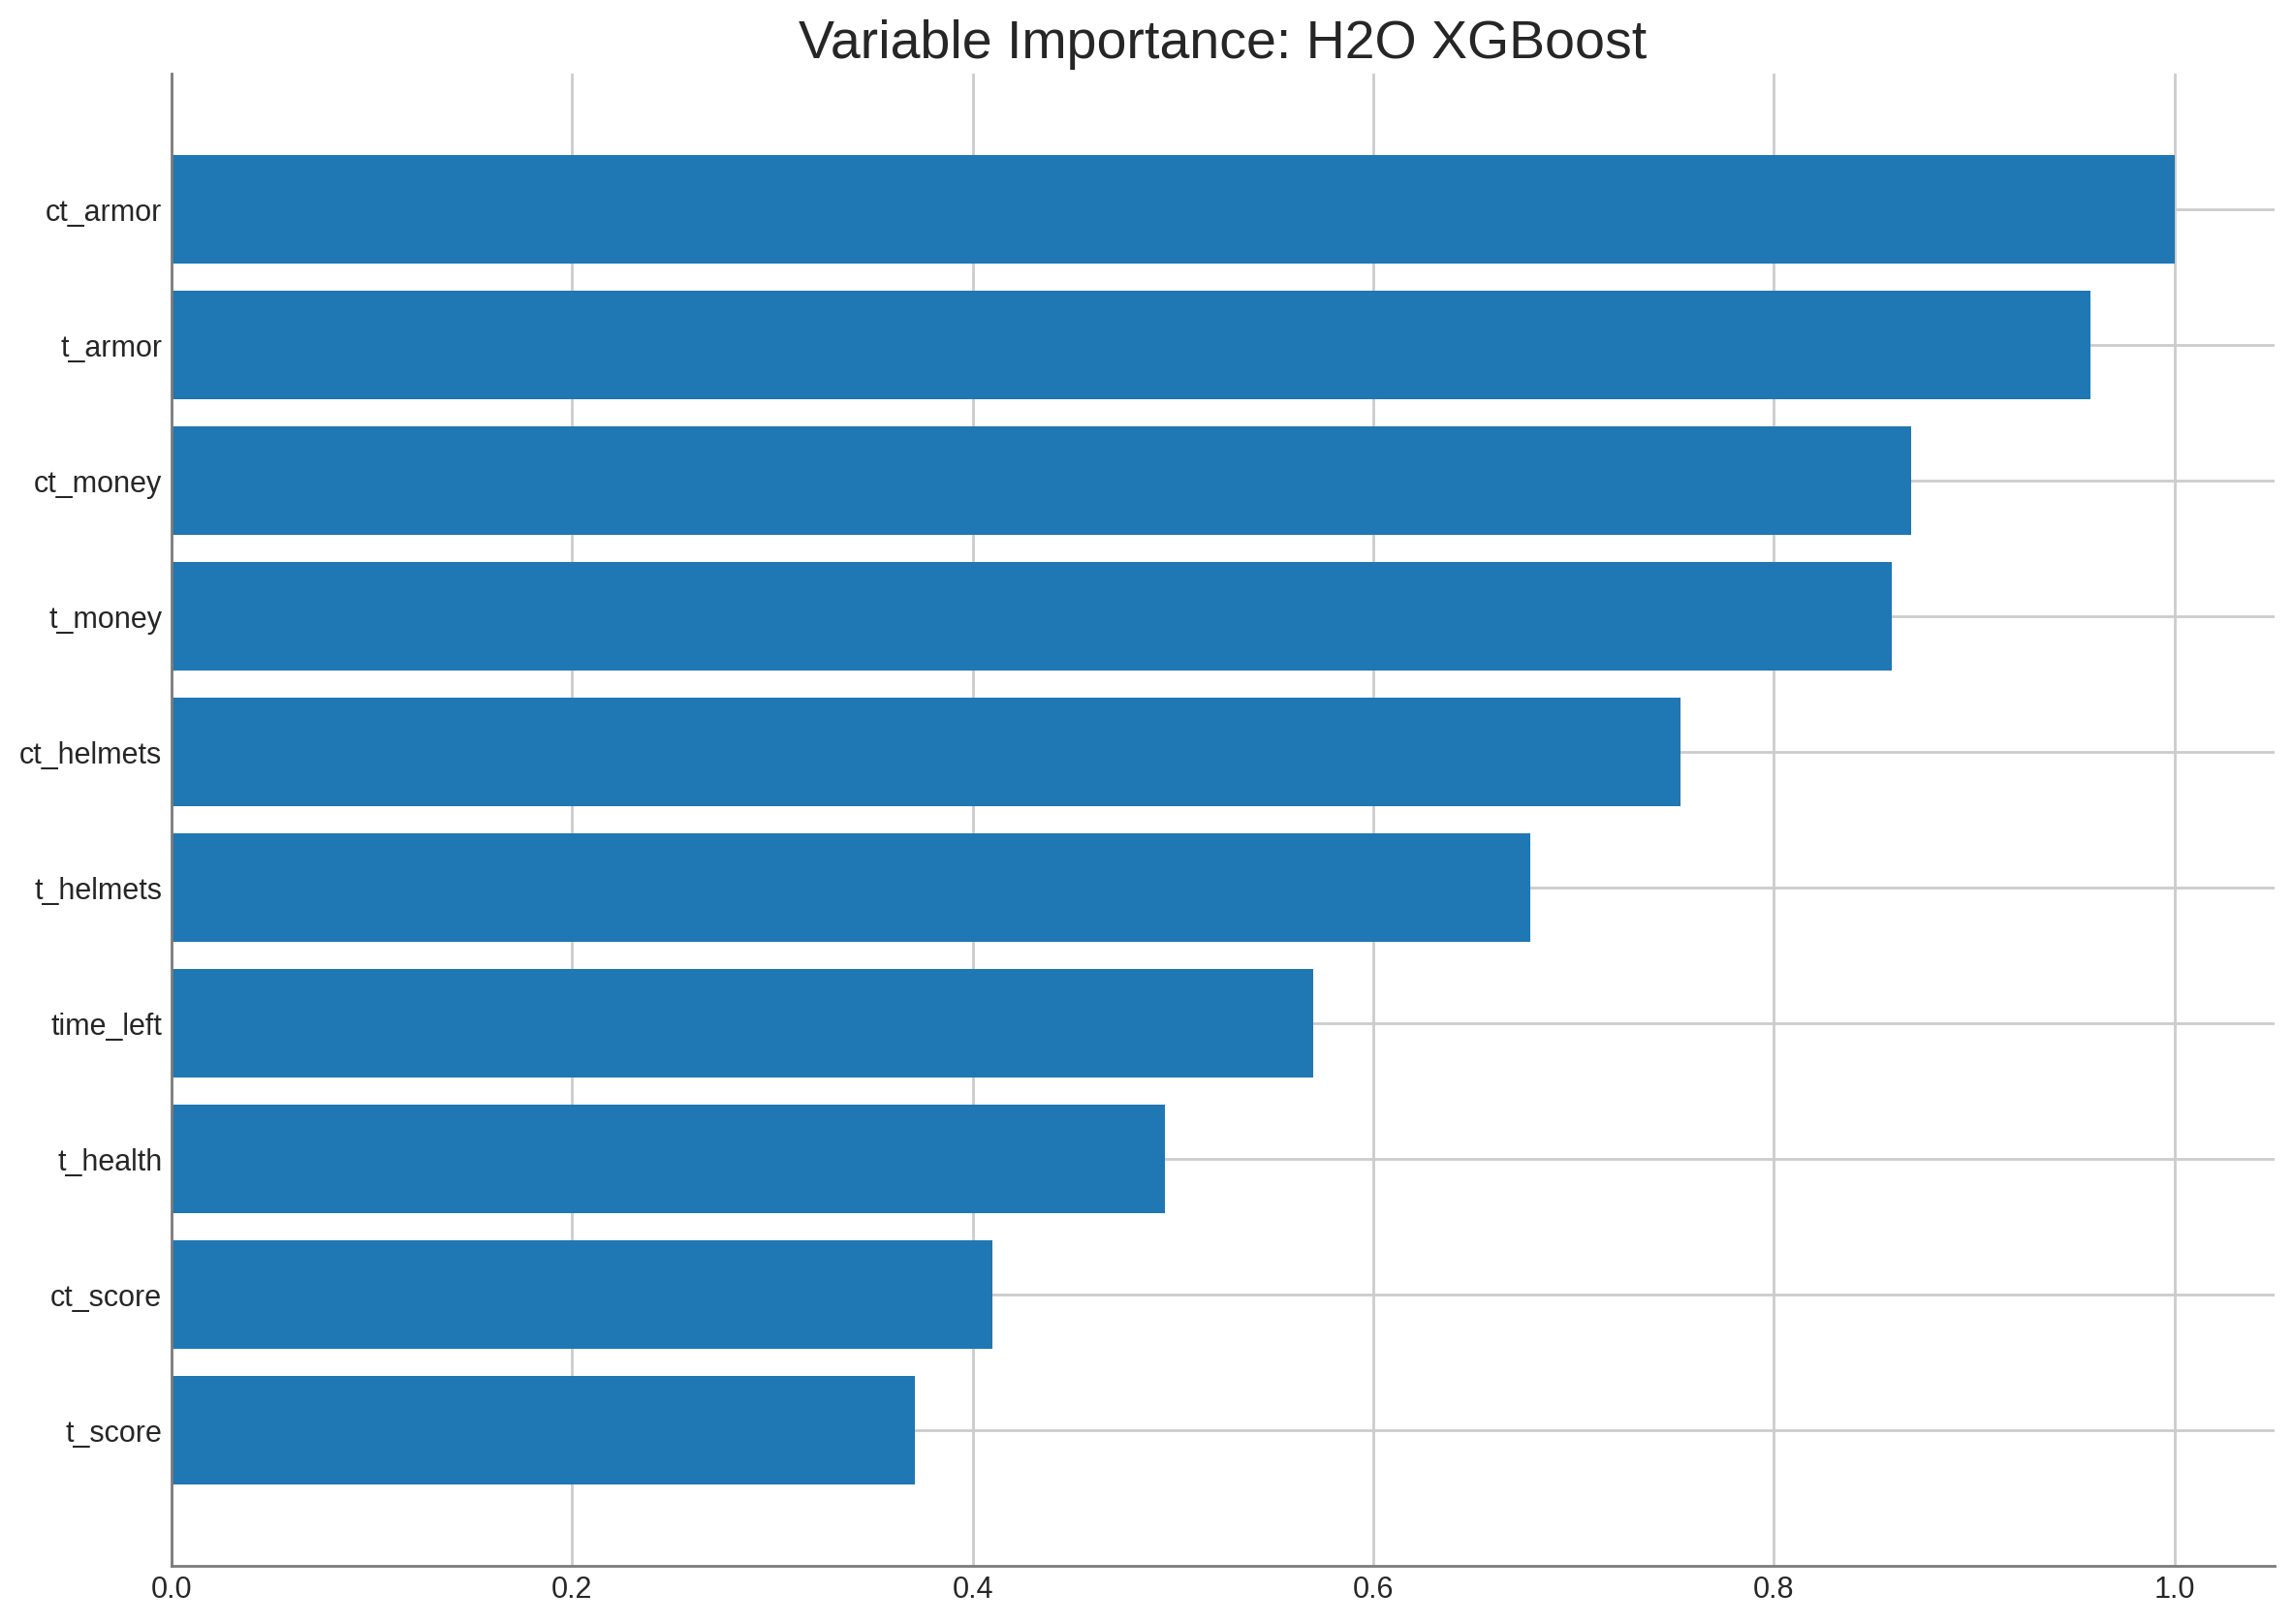

<Figure size 1600x800 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

This code creates a dictionary named models_dict that maps each model ID from the AutoML leaderboard to an index value. The index values are assigned in the order that the models appear on the leaderboard, with the stacked ensemble models getting the first set of index values and the GLM model getting a separate index value. The code first loops through the models on the leaderboard to assign index values to the stacked ensemble models and then loops through the models again to assign an index value to the GLM model. The result is a dictionary where each key is a model ID and each value is an index value.

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'XGBoost_2_AutoML_1_20230410_30946': 0, 'GLM_1_AutoML_1_20230410_30946': 9}

This code prints the value of model_index and retrieves the best model from the H2O AutoML leaderboard by using its ID stored in the model_id column of the aml.leaderboard object at the model_index row. The algorithm used by the best model is then printed using the algo attribute.

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [ ]:
best_model.algo

'xgboost'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

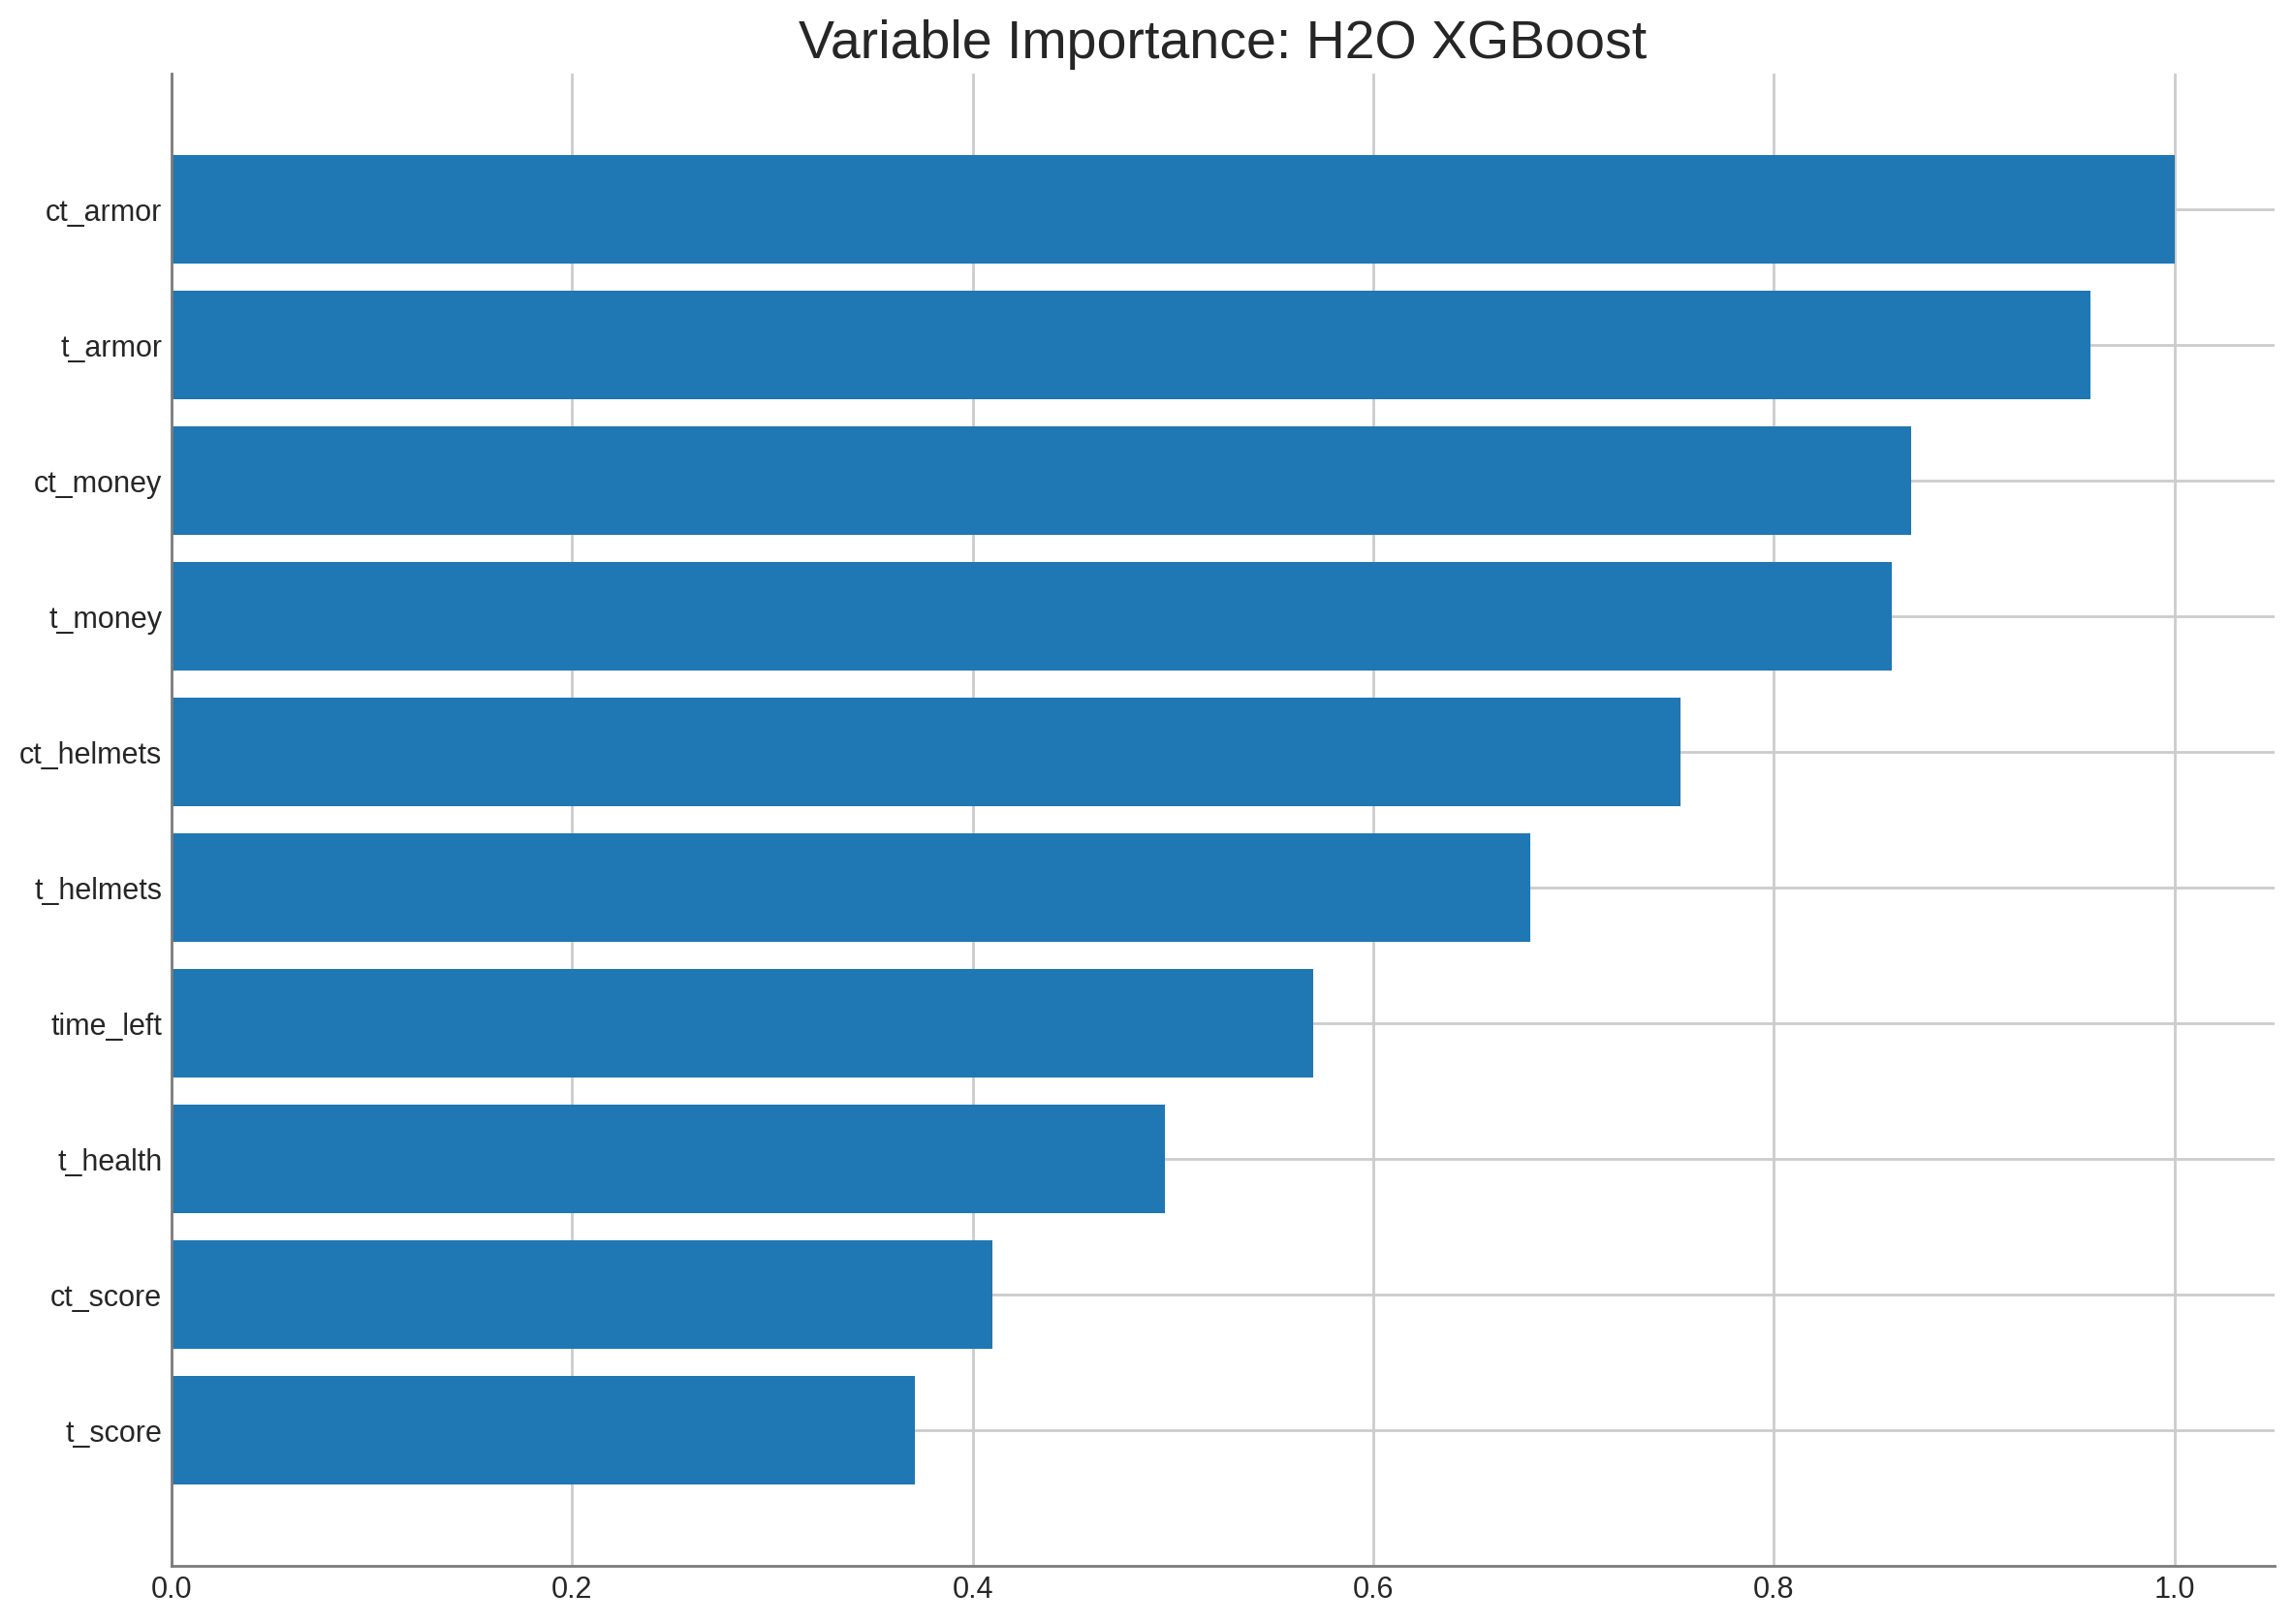

<Figure size 1600x800 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

This code checks if the index of the GLM model in the H2O AutoML leaderboard is not 0, and if so, it prints the index, retrieves the GLM model from the leaderboard using the index, prints the algorithm used by the model, and plots the standardized coefficient magnitudes of the model using the std_coef_plot() function. The std_coef_plot() function is used to visualize the importance of each feature in predicting the target variable based on their standardized coefficients.

9
glm


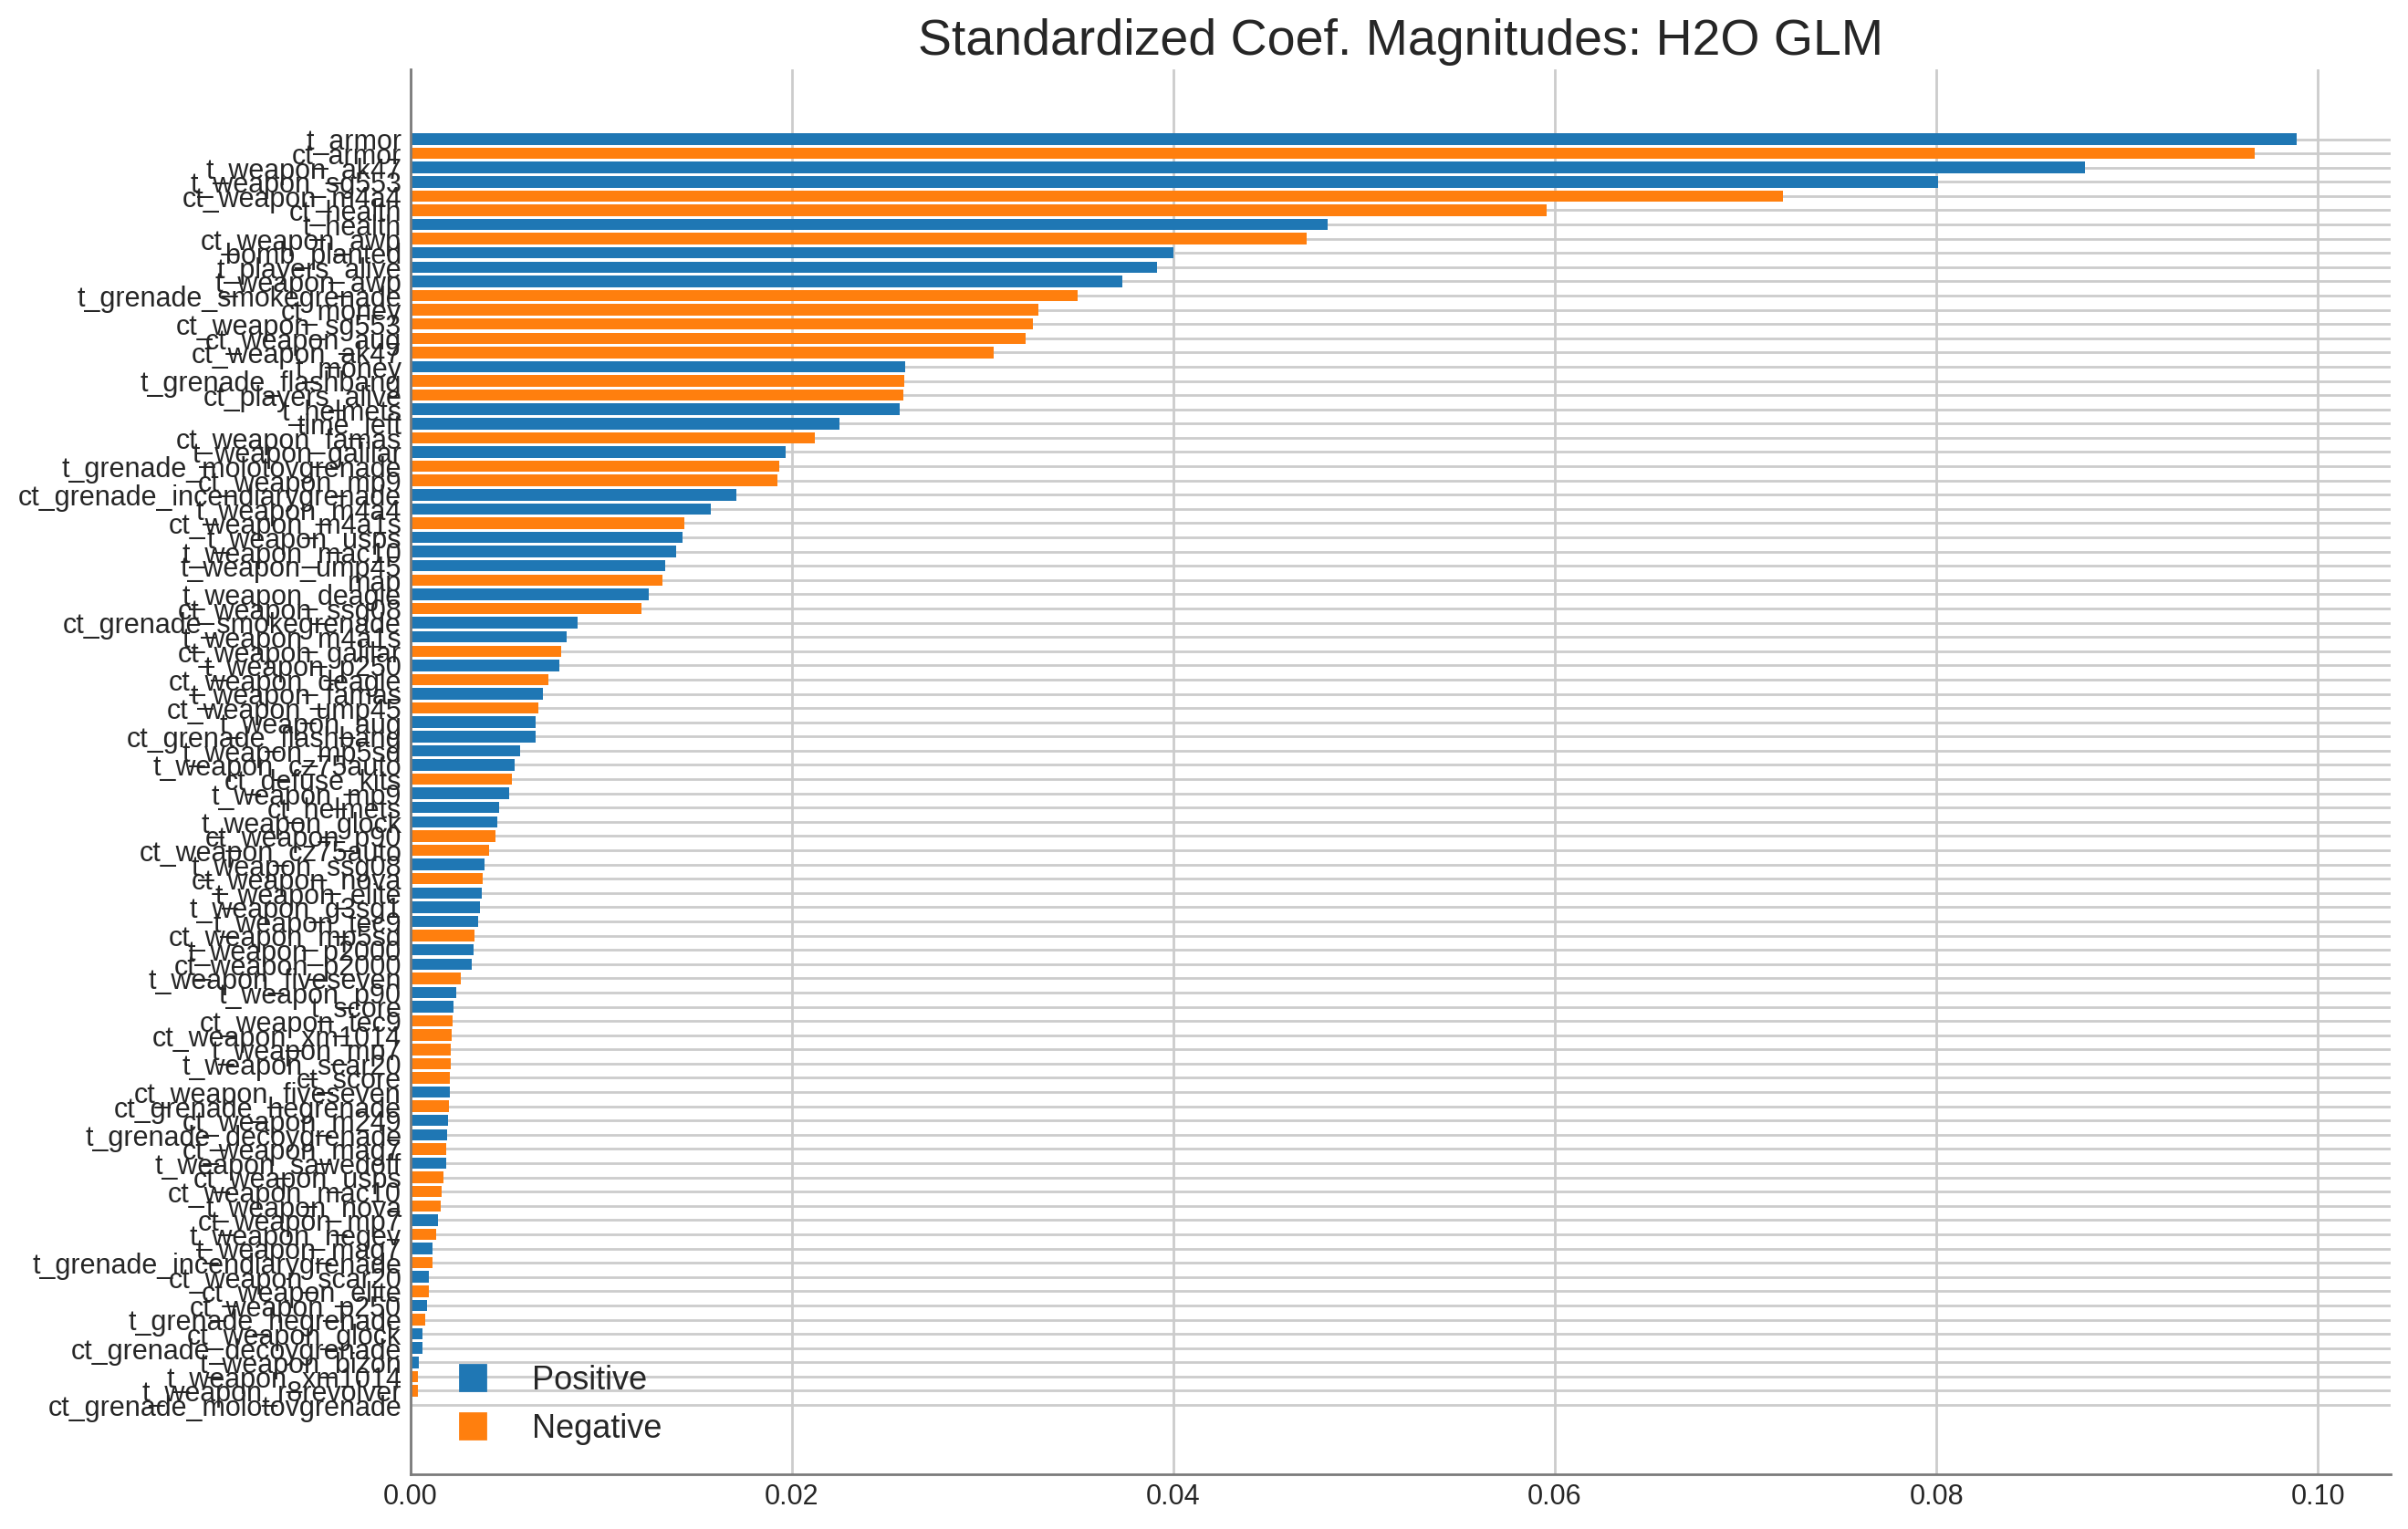

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

0.13064040709138364


This code defines a function called "model_performance_stats" that takes in a parameter "perf" and returns a dictionary "d" containing various performance statistics for a model. The function tries to retrieve several statistics such as mean squared error (mse), root mean squared error (rmse), degrees of freedom, deviance, AIC, log loss, area under the curve (auc), and Gini coefficient from the "perf" object. If any of these statistics are not available or result in an error, the function ignores them and moves on to the next one. Finally, the function returns the dictionary containing the available statistics.

In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

This code computes various performance statistics for a trained machine learning model using a test dataset. It first generates a model performance object mod_perf for the model best_model on the test dataset df_test. Then, it passes the performance object to a function called model_performance_stats which extracts various statistics from it and returns them in a dictionary format. Finally, the statistics are stored in a dictionary object called stats_test.

In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.11121294100260677,
 'rmse': 0.33348604319012626,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred.head())

    predict
0  0.971550
1  0.973040
2  0.761115
3  0.072545
4 -0.080553


In [ ]:
y_test = h2o.as_list(df_test[y3])  # Real Answers
y_test.head()

round_winner
0             1
1             1
2             0
3             0
4             0

In [ ]:
print(x)

        time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
0          175.00         0        0    1             0        500       500   
1          156.03         0        0    1             0        500       500   
2           96.03         0        0    1             0        391       400   
3           76.03         0        0    1             0        391       400   
4          174.97         1        0    1             0        500       500   
...           ...       ...      ...  ...           ...        ...       ...   
122405      15.41        11       14    6             1        200       242   
122406     174.93        11       15    6             0        500       500   
122407     114.93        11       15    6             0        500       500   
122408      94.93        11       15    6             0        500       500   
122409      74.93        11       15    6             0        375       479   

        ct_armor  t_armor  ct_money  ..

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
wine_glm.train(x=x3, y=y3, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681094397588_11


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              90                            90                             1                       py_6_sid_b381

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.15953068572063447
RMSE: 0.39941292633142766
MAE: 0.34224336441934755
RMSLE: 0.2812395511126064
Mean Residual Deviance: 0.15953068572063447
R^2: 0.3615407216394563
Null degrees of freedom: 82364
Residual degrees of freedom: 82274
Null deviance: 20580.396236264452
Residual deviance: 13139.744929380058
AIC: 82743.22310364008

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.15989403441738254
RMSE: 0.399867521083399
MAE: 0.34261828147738954
RMSLE: 0.28155940654180794
Mean Residual Deviance: 0.15989403441738254
R^2: 0.3600865603558694
Null degrees of freedom: 82364
Residual degrees of freedom: 82274
Null deviance: 20580.72019390887
Residual deviance: 13169.672144787712
AIC: 82930.60514659919

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.342609  0.00260117  0.340559      0.341843      0.347157      0.341958      0.341528
mean_residual_deviance  0.159888  0.0020986   0.158344      0.159783      0.16349       0.159322      0.1585
mse                     0.159888  0.0020986   0.158344      0.159783      0.16349       0.159322      0.1585
null_deviance           4116.14   24.8389     4113.55       4088.81       4153.14       4099.96       4125.26
r2                      0.360094  0.00832129  0.366152      0.360274      0.345863      0.362395      0.365789
residual_deviance       2633.93   46.3169     2607.29       2615.49       2716.55       2614.16       2616.2
rmse                    0.399853  0.00261494  0.397924      0.399728      0.404339      0.399152      0.39812
rmsle                   0.281549  0.00191775  0.279772      0.281693      0.284703      0.28125       0.280327

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  -------------------  ------------------
    2023-04-10 03:23:37  0.000 sec   0             20580.396236264452         0.24986822359332791
    2023-04-10 03:23:37  0.969 sec   1                                                             0.39941292633142766  0.15953068572063447  0.34224336441934755  0.3615407216394563

Variable Importances: 
variable                   relative_importance     scaled_importance      percentage
-------------------------  ----------------------  ---------------------  ----------------------
t_armor                    0.10411697626113892     1.0                    0.06758414637095736
t_weapon_ak47              0.09918040037155151     0.9525862537804994     0.06437972880646321
ct_armor                   0.0983521044254303      0.9446308177328395     0.06384206745217337
t_weapon_sg553             0.08985801786184311     0.8630486697622443     0.05832840762247156
ct_weapon_m4a4             0.07458541542291641     0.7163617125784223     0.04841469483744978
ct_health                  0.06838387250900269     0.6567984872849846     0.044389165100891775
t_players_alive            0.05502212420105934     0.5

In [ ]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
OverWeight_pred.head()
#predicitions

predict
----------
 0.97155
 0.97304
 0.761115
 0.0725452
-0.0805525
 0.983498
 0.967253
 0.220891
-0.0138521
-0.165116
[10 rows x 1 column]

In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.11121294100260677
RMSE: 0.33348604319012626
MAE: 0.23652885759872763
RMSLE: 0.236527226535868
Mean Residual Deviance: 0.11121294100260677

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids
#all the models that were used in the automl are below

['XGBoost_2_AutoML_1_20230410_30946',
 'GBM_4_AutoML_1_20230410_30946',
 'DRF_1_AutoML_1_20230410_30946',
 'XGBoost_1_AutoML_1_20230410_30946',
 'GBM_3_AutoML_1_20230410_30946',
 'GBM_1_AutoML_1_20230410_30946',
 'XGBoost_3_AutoML_1_20230410_30946',
 'GBM_2_AutoML_1_20230410_30946',
 'XRT_1_AutoML_1_20230410_30946',
 'GLM_1_AutoML_1_20230410_30946']

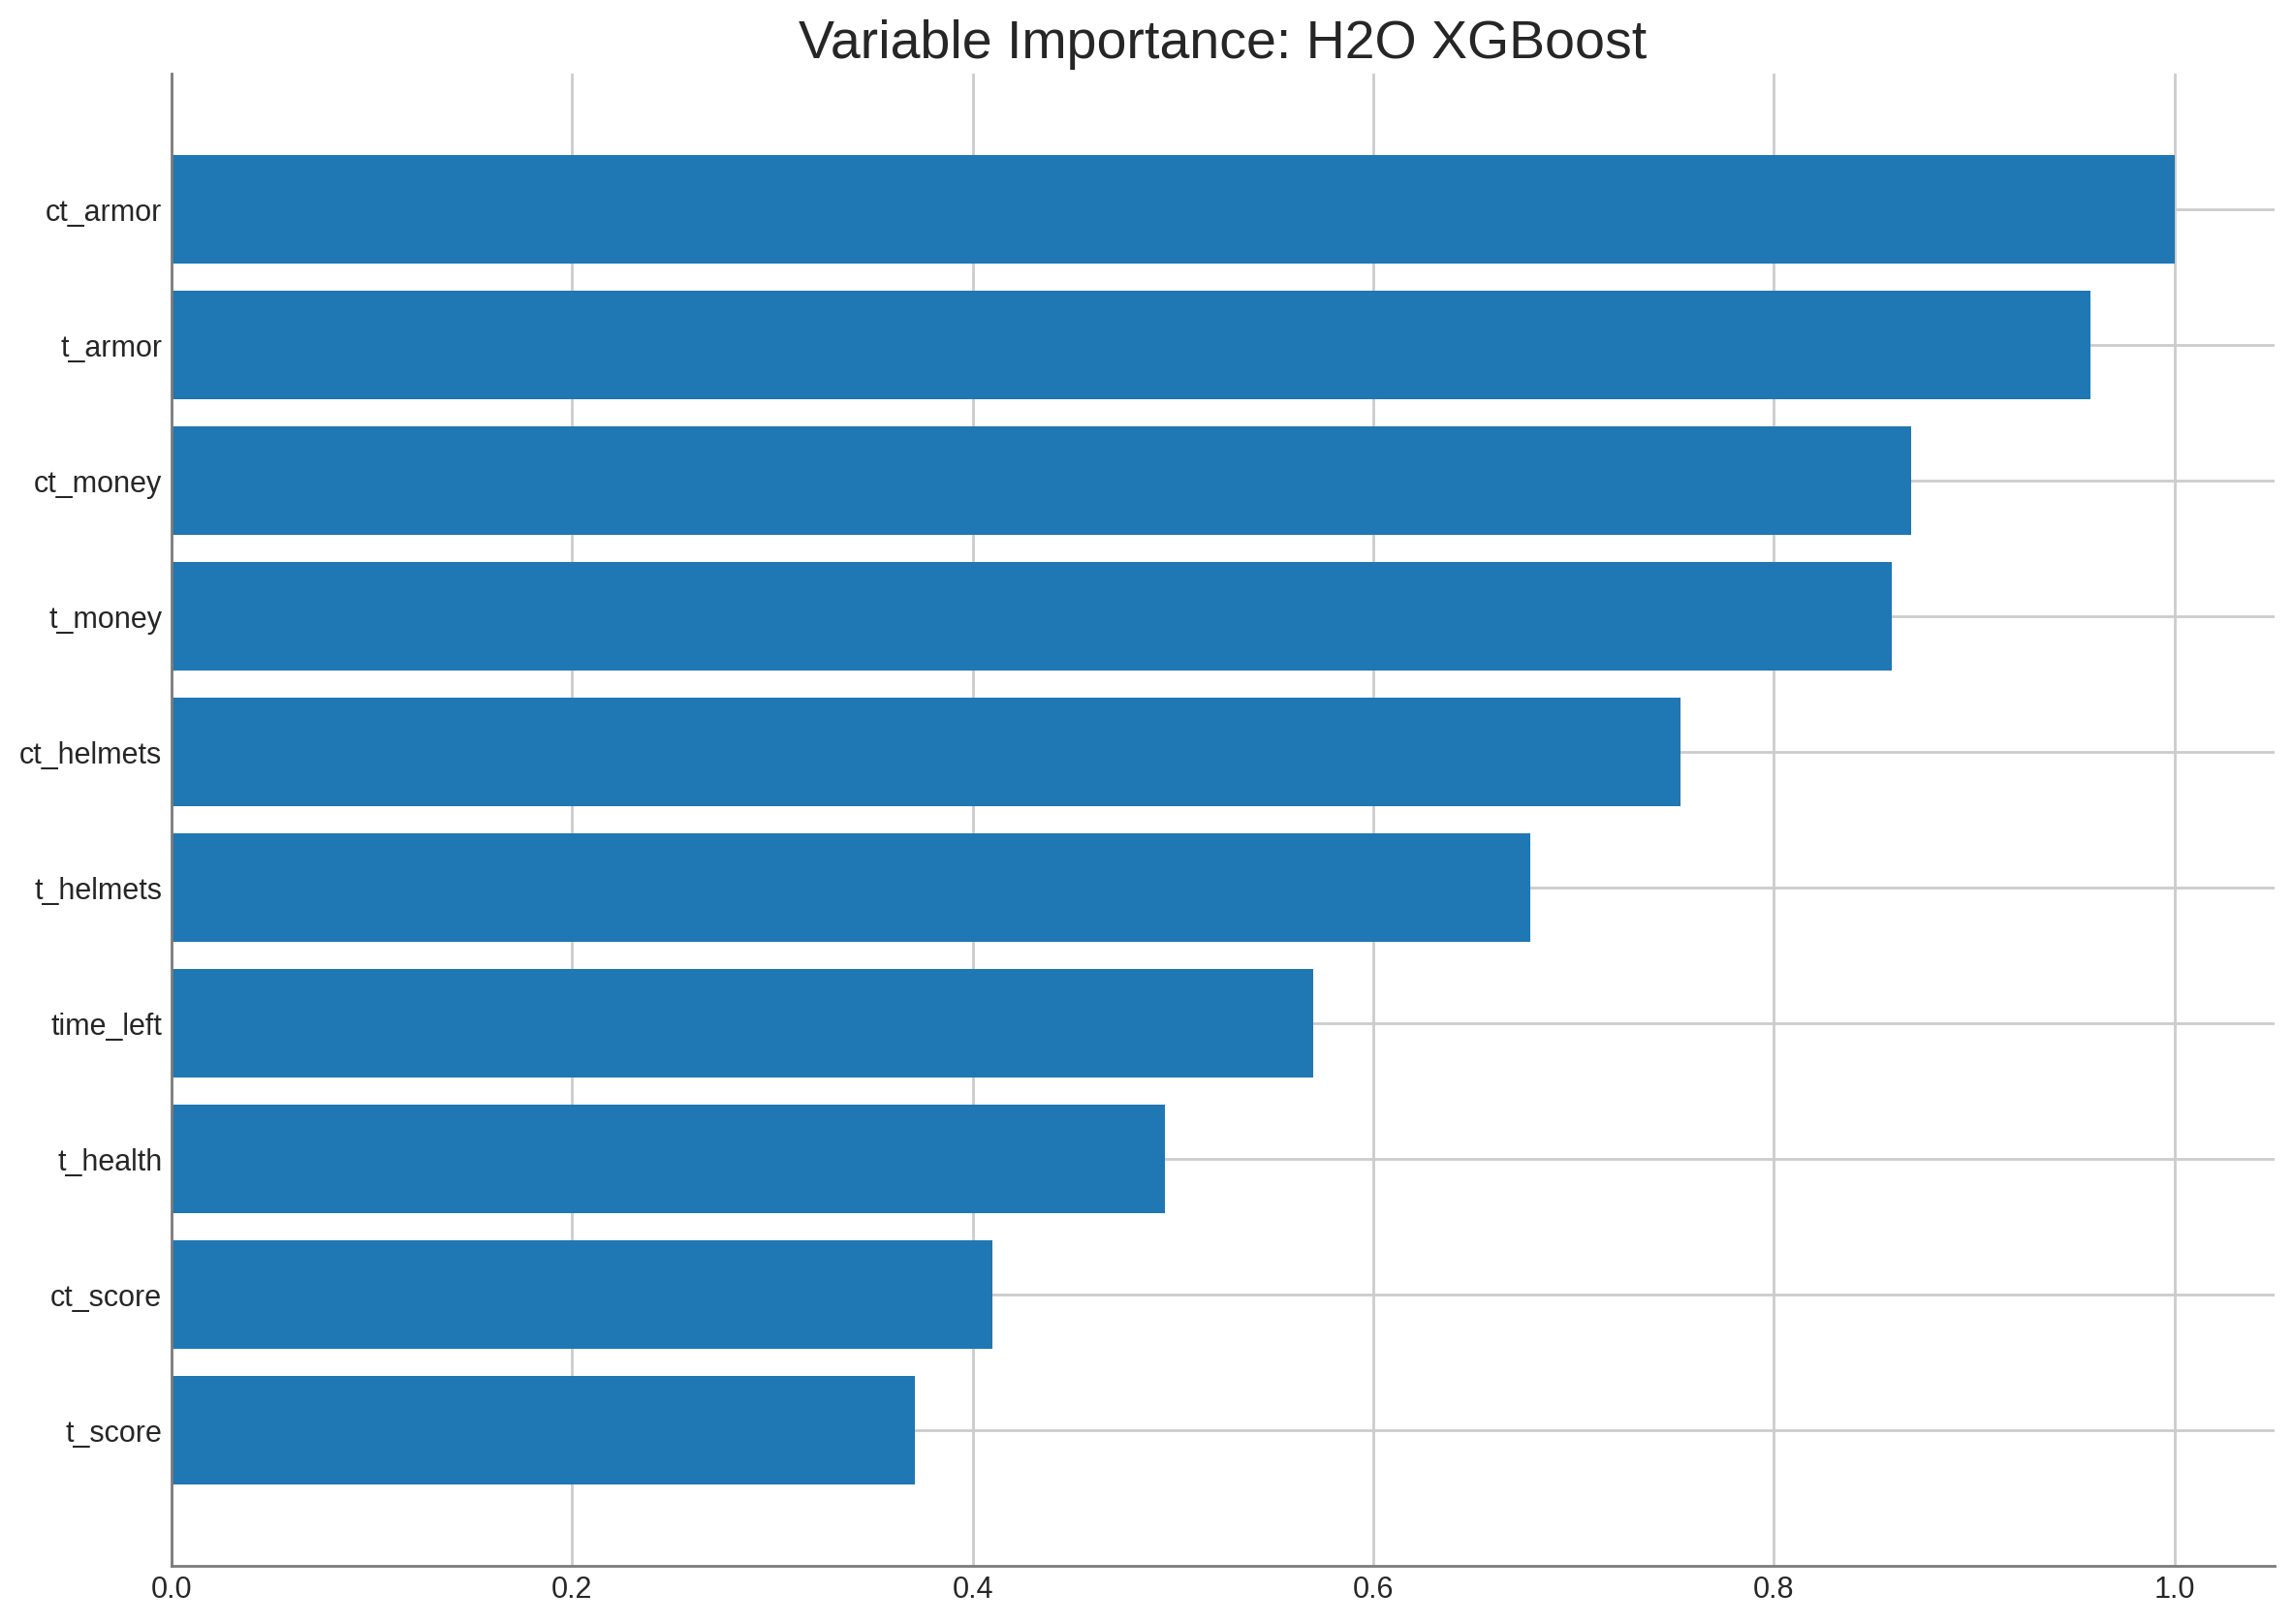

<Figure size 1600x800 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#we are using xgboost model as well to predict, while it's still not in the top of the aml leader board.

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20230410_30946


Model Summary: 
    number_of_trees
--  -----------------
    200

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.017066915965002438
RMSE: 0.13064040709138364
MAE: 0.08922139450456322
RMSLE: 0.09611115156584404
Mean Residual Deviance: 0.017066915965002438

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.10769292676118568
RMSE: 0.32816600488348224
MAE: 0.23131453210092368
RMSLE: 0.2326769073039739
Mean Residual Deviance: 0.10769292676118568

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance     validation_rmse      validation_mae       validation_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------  -------------------  -------------------  ---------------------
     2023-04-10 03:13:22  0.010 sec         0.0                0.5                  0.5                  0.25                  0.5                  0.5                  0.25
     2023-04-10 03:13:25  2.365 sec         5.0                0.3640871305840857   0.30720675748018217  0.13255943865695308   0.37978222161443126  0.3189190512257205   0.144234535854393
     2023-04-10 03:13:27  4.064 sec         10.0               0.34512670857247946  0.2643543217417785   0.11911244497007316   0.3709893370210278   0.28402069195402857  0.13763308818330178
     2023-04-10 03:13:28  5.854 sec         15.0               0.33366388591906415  0.2510806361237185   0.11133158876661026   0.36698769706595136  0.2764231869728289   0.13467996979777047
     2023-04-10 03:13:30  7.960 sec         20.0               0.32269102435875086  0.24093963139436214  0.10412949720169994   0.36279926728686546  0.27134539296516874  0.13162330834388644
     2023-04-10 03:13:33  10.270 sec        25.0               0.3133576798926279   0.23287133304775937  0.09819303554769068   0.36005712183354927  0.26851842747464855  0.12964113098305935
     2023-04-10 03:13:35  12.141 sec        30.0               0.30412745683416426  0.22485567718076696  0.09249351000041645   0.35740564994921864  0.2652616117911949   0.1277387986156234
     2023-04-10 03:13:36  14.020 sec        35.0               0.29611593938621467  0.21800556855688602  0.08768464955858035   0.35445952462563046  0.2624265612504788   0.12564155459782794
     2023-04-10 03:13:38  15.927 sec        40.0               0.28899293613704946  0.21189920801047685  0.08351691713711275   0.3534453322067273   0.26115441366762177  0.12492360285872381
     2023-04-10 03:13:40  17.838 sec        45.0               0.2800001296991981   0.20426583766380035  0.07840007263156773   0.35163466820433237  0.25873515732381164  0.12364693988317092
---  ---                  ---               ---                ---                  ---                  ---                   ---                  ---                  ---
     2023-04-10 03:14:39  1 min 16.409 sec  155.0              0.1596914734961631   0.11021708272624116  0.025501366707375767  0.33008281011036467  0.2342274751867815   0.10895466153035506
     2023-04-10 03:14:42  1 min 19.516 sec  160.0              0.15563669907263658  0.10729816712614097  0.024222782098226432  0.3294726864508323   0.23347818888783212  0.10855225111712843
     2023-04-10 03:14:46  1 min 23.577 sec  165.0              0.1533414954323401   0.10555268509939547  0.023513614221426383  0.329584674028388    0.2334217000290524   0.10862605735439876
     2023-04-10 03:14:49  1 min 26.649 sec  170.0              0.14962260308345798  0.10305516174392015  0.022386923353470013  0.3291777302980367   0.2329232106458047   0.10835797812416698
     2023-04-10 03:14:52  1 min 29.787 sec  175.0              0.14720906082824906  0.10127041012452165  0.021670507589935134  0.32886016147894515  0.2325536294950729   0.10814900580795789
     2023-04

This code is using the H2O library for machine learning to retrieve an XGBoost model from a list of model ids. Then, it prints the parameters of the model and converts the H2O-specific parameters to the XGBoost-specific parameters. Finally, it displays the model and generates a plot of variable importance based on the model.

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_1_20230410_30946',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_1_20230410_30946'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230410_30946_training_py_6_sid_b381',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230410_30946_training_py_6_sid_b381'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230410_30946_training_py_6_sid_b381',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230410_30946_training_py_6_sid_b381'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'reg:squarederror',
  'min_child_weight': 5.0,
  'nthread': 2,
  'seed': 13,
  'max_depth': 10,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 200)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20230410_30946


Model Summary: 
    number_of_trees
--  -----------------
    200

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.017066915965002438
RMSE: 0.13064040709138364
MAE: 0.08922139450456322
RMSLE: 0.09611115156584404
Mean Residual Deviance: 0.017066915965002438

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.10769292676118568
RMSE: 0.32816600488348224
MAE: 0.23131453210092368
RMSLE: 0.2326769073039739
Mean Residual Deviance: 0.10769292676118568

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance     validation_rmse      validation_mae       validation_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------  -------------------  -------------------  ---------------------
     2023-04-10 03:13:22  0.010 sec         0.0                0.5                  0.5                  0.25                  0.5                  0.5                  0.25
     2023-04-10 03:13:25  2.365 sec         5.0                0.3640871305840857   0.30720675748018217  0.13255943865695308   0.37978222161443126  0.3189190512257205   0.144234535854393
     2023-04-10 03:13:27  4.064 sec         10.0               0.34512670857247946  0.2643543217417785   0.11911244497007316   0.3709893370210278   0.28402069195402857  0.13763308818330178
     2023-04-10 03:13:28  5.854 sec         15.0               0.33366388591906415  0.2510806361237185   0.11133158876661026   0.36698769706595136  0.2764231869728289   0.13467996979777047
     2023-04-10 03:13:30  7.960 sec         20.0               0.32269102435875086  0.24093963139436214  0.10412949720169994   0.36279926728686546  0.27134539296516874  0.13162330834388644
     2023-04-10 03:13:33  10.270 sec        25.0               0.3133576798926279   0.23287133304775937  0.09819303554769068   0.36005712183354927  0.26851842747464855  0.12964113098305935
     2023-04-10 03:13:35  12.141 sec        30.0               0.30412745683416426  0.22485567718076696  0.09249351000041645   0.35740564994921864  0.2652616117911949   0.1277387986156234
     2023-04-10 03:13:36  14.020 sec        35.0               0.29611593938621467  0.21800556855688602  0.08768464955858035   0.35445952462563046  0.2624265612504788   0.12564155459782794
     2023-04-10 03:13:38  15.927 sec        40.0               0.28899293613704946  0.21189920801047685  0.08351691713711275   0.3534453322067273   0.26115441366762177  0.12492360285872381
     2023-04-10 03:13:40  17.838 sec        45.0               0.2800001296991981   0.20426583766380035  0.07840007263156773   0.35163466820433237  0.25873515732381164  0.12364693988317092
---  ---                  ---               ---                ---                  ---                  ---                   ---                  ---                  ---
     2023-04-10 03:14:39  1 min 16.409 sec  155.0              0.1596914734961631   0.11021708272624116  0.025501366707375767  0.33008281011036467  0.2342274751867815   0.10895466153035506
     2023-04-10 03:14:42  1 min 19.516 sec  160.0              0.15563669907263658  0.10729816712614097  0.024222782098226432  0.3294726864508323   0.23347818888783212  0.10855225111712843
     2023-04-10 03:14:46  1 min 23.577 sec  165.0              0.1533414954323401   0.10555268509939547  0.023513614221426383  0.329584674028388    0.2334217000290524   0.10862605735439876
     2023-04-10 03:14:49  1 min 26.649 sec  170.0              0.14962260308345798  0.10305516174392015  0.022386923353470013  0.3291777302980367   0.2329232106458047   0.10835797812416698
     2023-04-10 03:14:52  1 min 29.787 sec  175.0              0.14720906082824906  0.10127041012452165  0.021670507589935134  0.32886016147894515  0.2325536294950729   0.10814900580795789
     2023-04

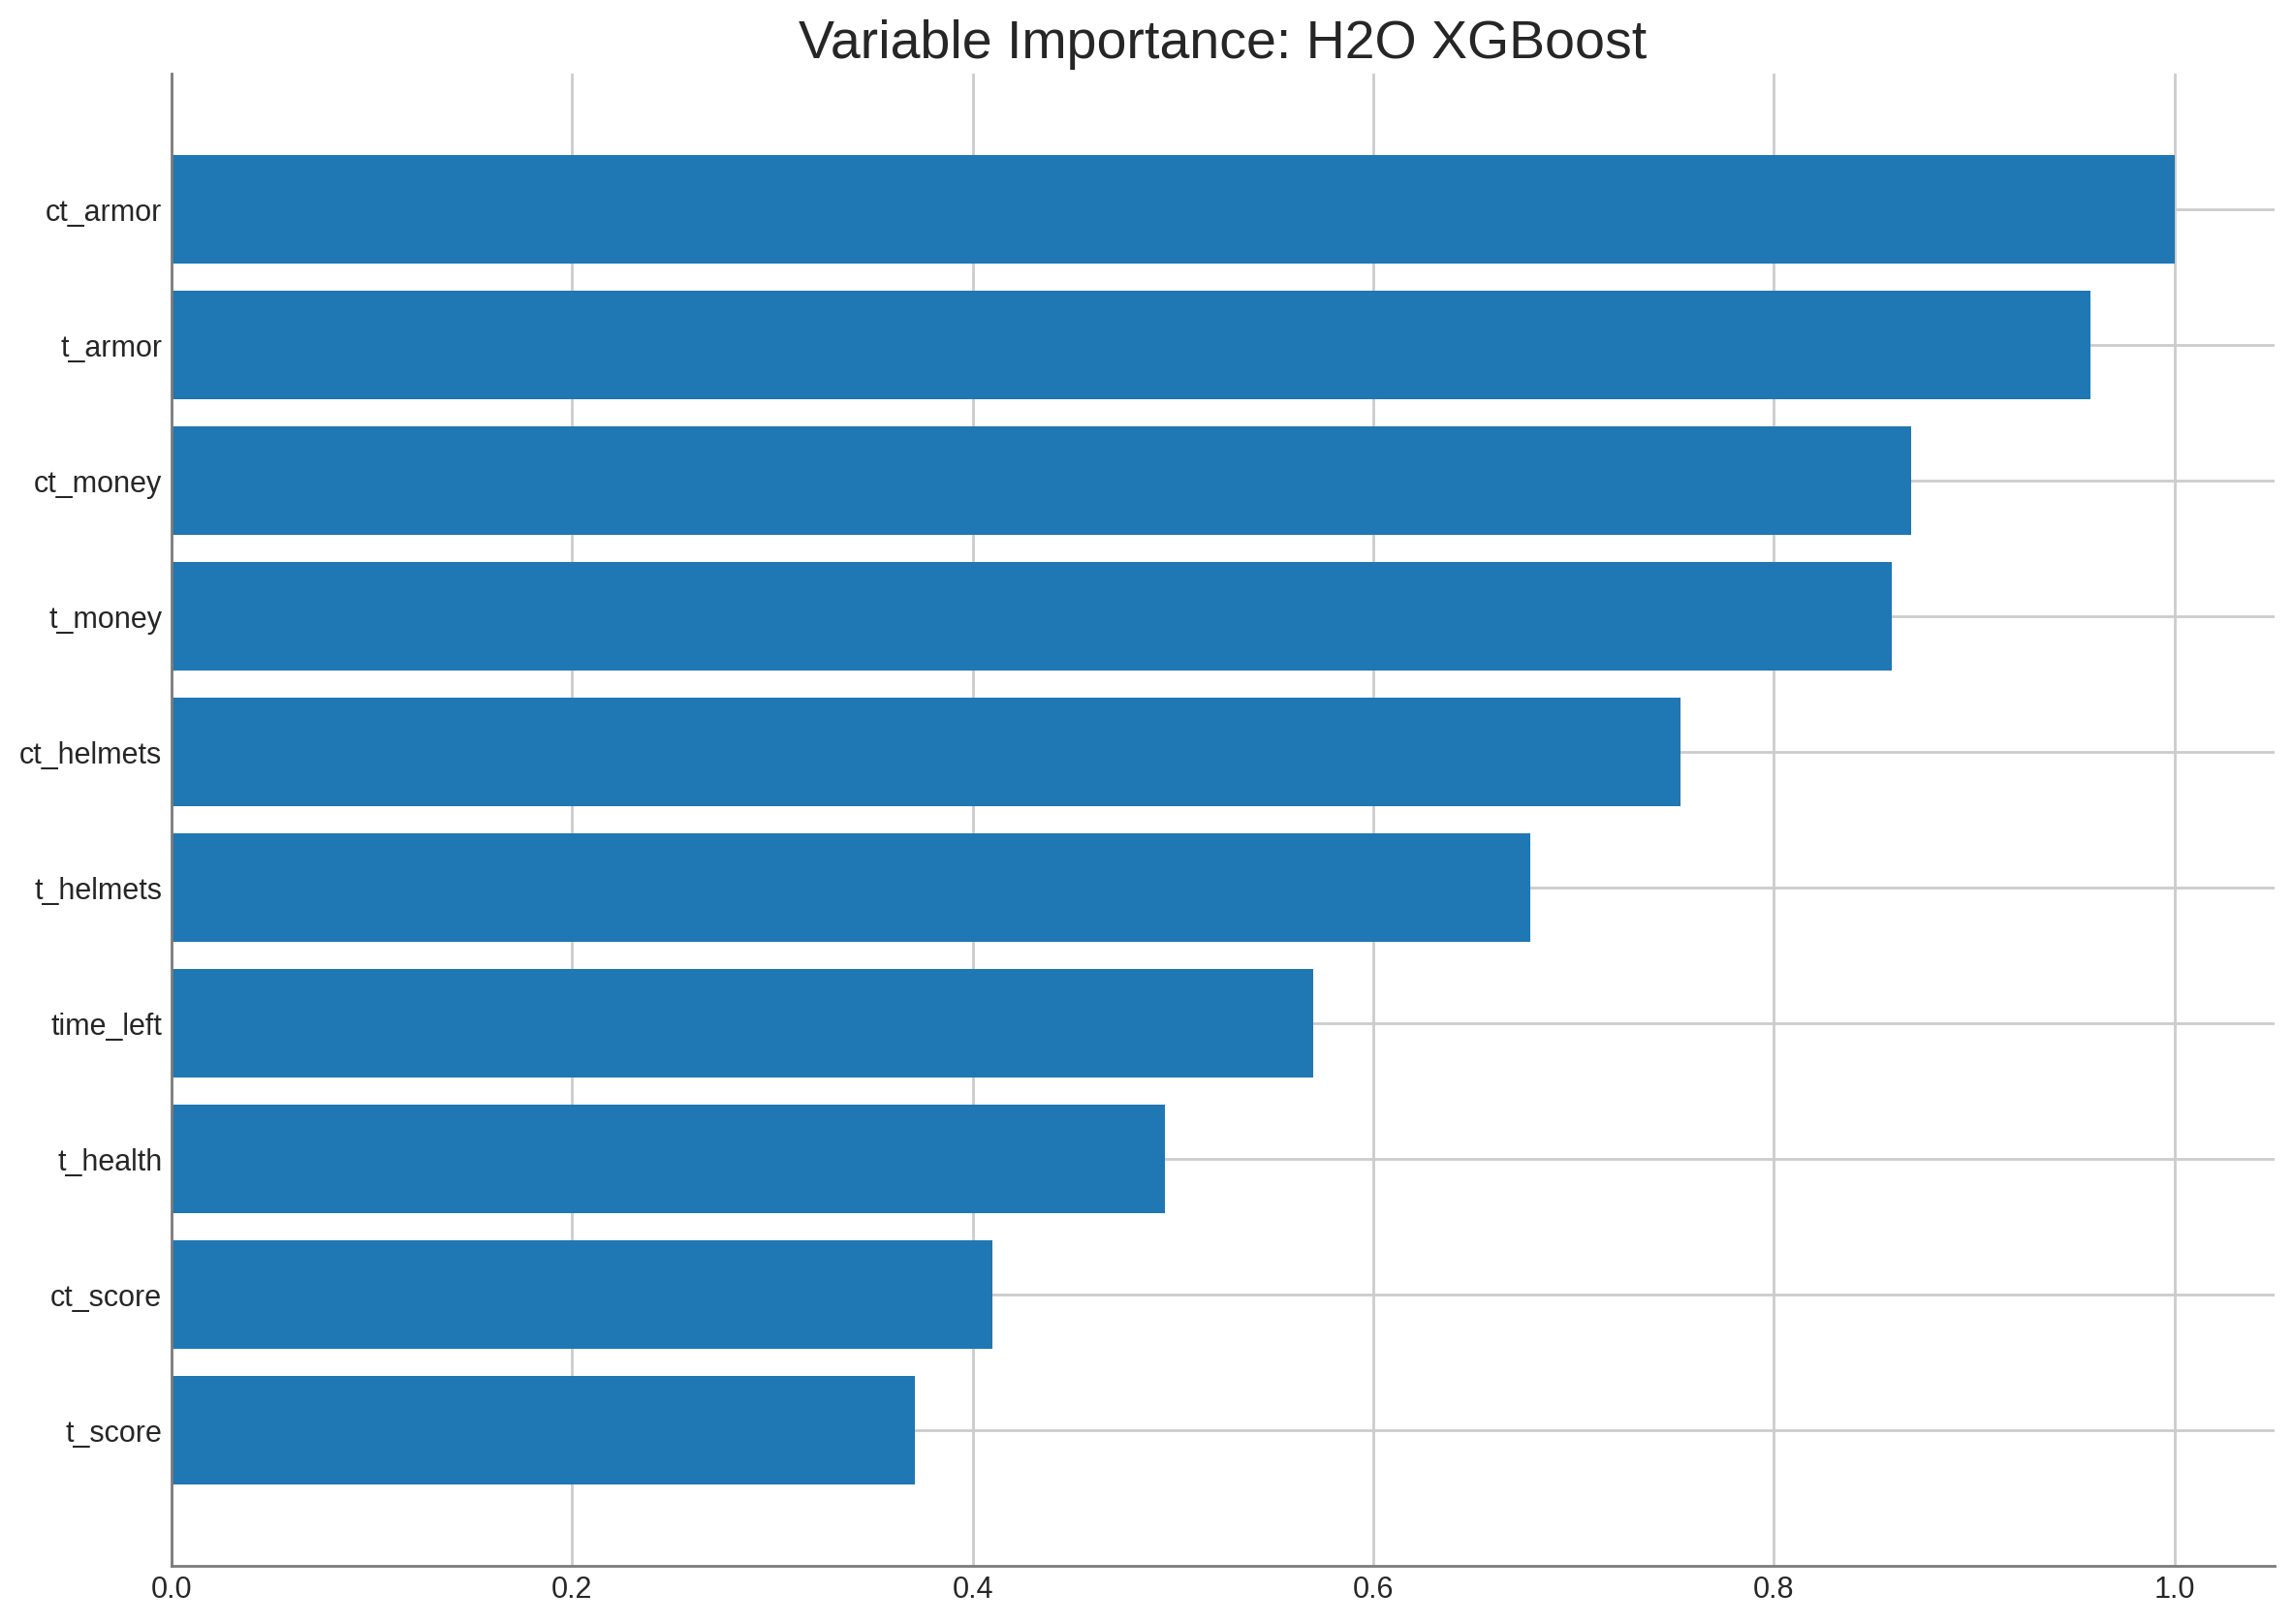

<Figure size 1600x800 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")
#Downloading the deployment ready code in mojo format. For GBM model. 

'/content/XGBoost_2_AutoML_1_20230410_30946.zip'

## Regression

This code performs ridge regression on a given dataset using Ridge from scikit-learn. It splits the data into training and test sets using train_test_split() function. Ridge regression is then performed on the training set using the Ridge object. The hyperparameter alpha is set to 0.5. The model is then used to predict the target values of the test set, and the root mean squared error (RMSE) is calculated as a performance metric using mean_squared_error() function from scikit-learn's metrics module. The RMSE value is returned as output.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[x3], data[y3], test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import metrics
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.40136155425711917

## Linear Regression algorithm

Linear Regression algorithm from Scikit-learn library to fit a model on the training data (X_train and Y_train) and predict the output for the test data (X_test) and store it in y_pred. It then calculates the mean squared error between the actual target values (Y_test) and predicted values (y_pred) using the mean_squared_error function from the Scikit-learn library. Finally, it prints the square root of the mean squared error which gives us the Root Mean Squared Error (RMSE) value of the model's predictions.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
#Applying linear regression and getting the mean squared error value.
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print('Error', np.sqrt(mean_squared_error(y_test, y_pred)))

Error 0.40136404156091515


<Axes: title={'center': "Model Coeff's"}>

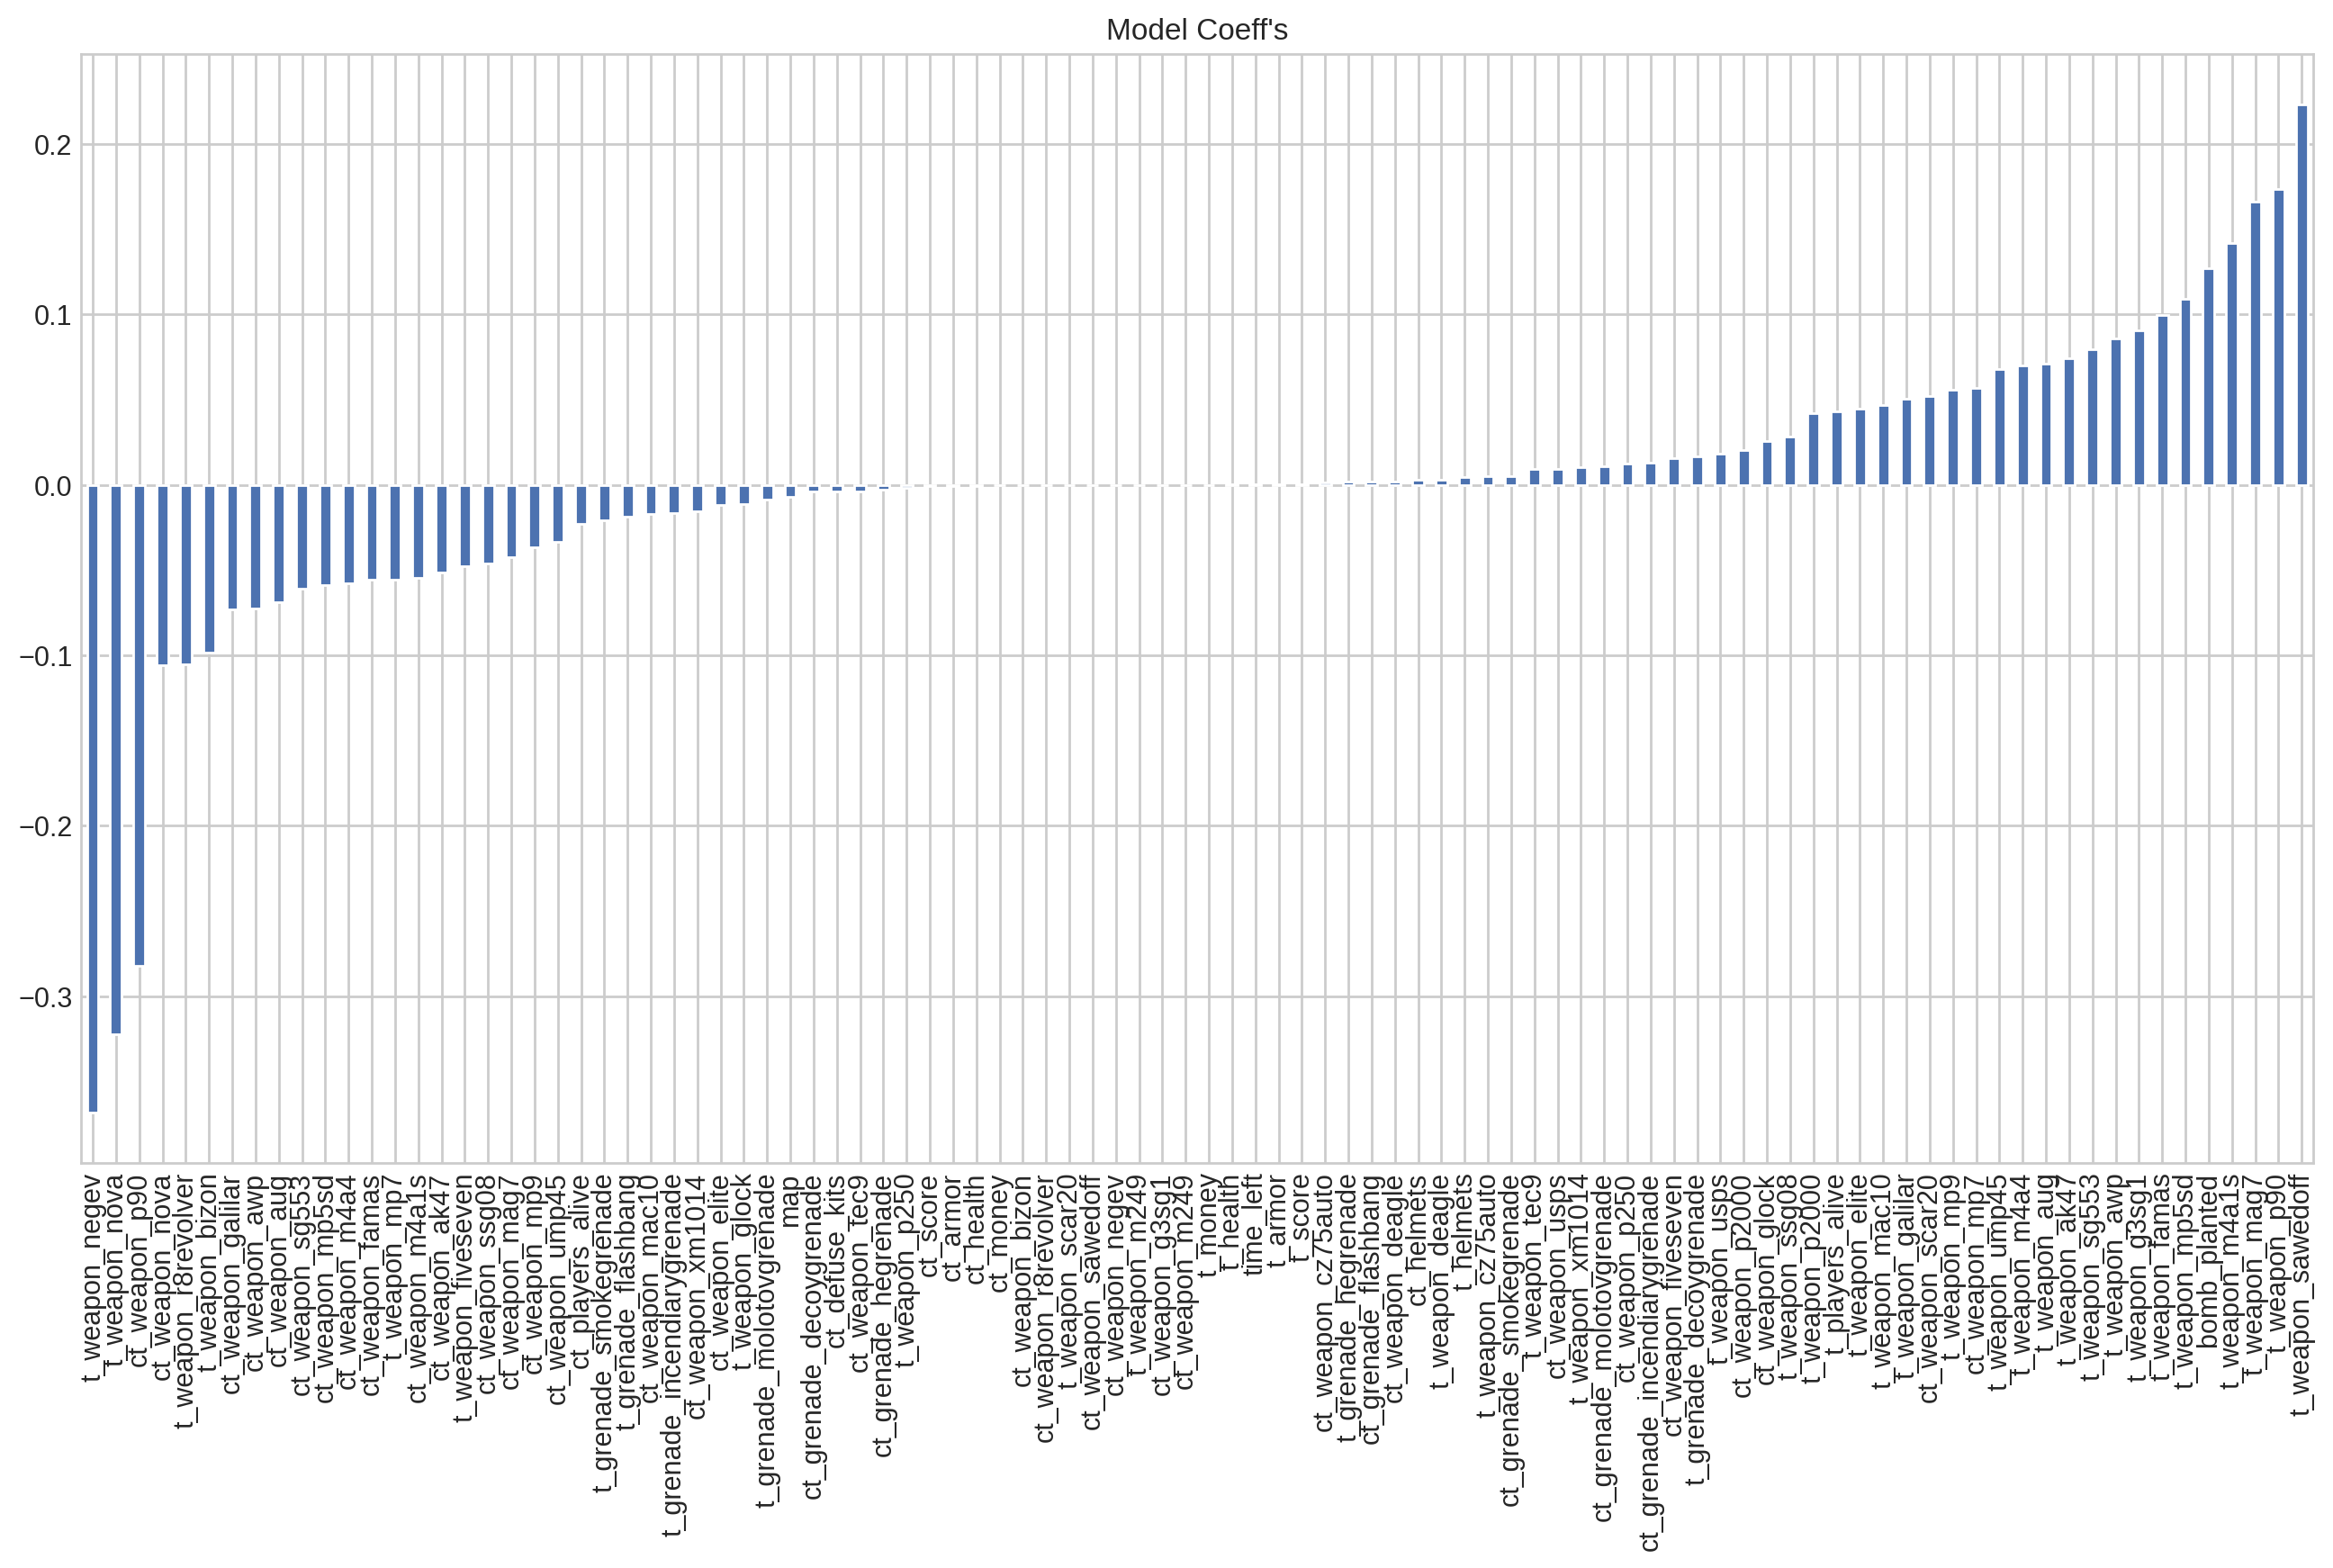

In [ ]:
#Mapping regression model Coefficients, We can see the features that the model is most depended on.
coef = pd.Series(lin_reg.coef_, x3).sort_values()
coef.plot(kind='bar', title =  'Model Coeff\'s')

In [ ]:
reg = sm.OLS(y_train, X_train).fit()
#performing OLS regression on our data

In [ ]:
#summary for the OLS regression.
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              1980.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        03:27:14   Log-Likelihood:                         -42323.
No. Observations:               82213   AIC:                                  8.482e+04
Df Residuals:                   82125   BIC:                                  8.564e+04
Df Model:                          88                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
time_left                        0.0011   5.96e-05     18.118      0.000       0.001       0.001
ct_score                         0.0013      0.000      3.243      0.001       0.001       0.002
t_score                          0.0025      0.000      6.138      0.000       0.002       0.003
map                              0.0043      0.001      6.020      0.000       0.003       0.006
bomb_planted                     0.2709      0.005     53.067      0.000       0.261       0.281
ct_health                       -0.0011   4.97e-05    -21.651      0.000      -0.001      -0.001
t_health                        -0.0002   4.01e-05     -6.215      0.000      -0.000      -0.000
ct_armor                        -0.0005   2.09e-05    -23.589      0.000      -0.001      -0.000
t_armor                          0.0007   2.51e-05     25.960      0.000       0.001       0.001
ct_money                     -3.756e-06   2.05e-07    -18.343      0.000   -4.16e-06   -3.35e-06
t_money                       1.684e-06    1.8e-07      9.357      0.000    1.33e-06    2.04e-06
ct_helmets                       0.0022      0.002      1.304      0.192      -0.001       0.006
t_helmets                       -0.0014      0.003     -0.440      0.660      -0.008       0.005
ct_defuse_kits                  -0.0016      0.002     -0.896      0.370      -0.005       0.002
ct_players_alive                 0.0706      0.014      5.034      0.000       0.043       0.098
t_players_alive                  0.1182      0.013      8.872      0.000       0.092       0.144
ct_weapon_ak47                  -0.0395      0.003    -12.096      0.000      -0.046      -0.033
t_weapon_ak47                    0.0861      0.003     27.905      0.000       0.080       0.092
ct_weapon_aug                   -0.0617      0.004    -16.402      0.000      -0.069      -0.054
t_weapon_aug                     0.0885      0.016      5.700      0.000       0.058       0.119
ct_weapon_awp                   -0.0616      0.003    -19.688      0.000      -0.068      -0.055
t_weapon_awp                     0.1075      0.004     25.849      0.000       0.099       0.116
ct_weapon_bizon              -1.466e-15   1.09e-15     -1.340      0.180   -3.61e-15    6.78e-16
t_weapon_bizon                  -0.0491      0.136     -0.361      0.718      -0.316       0.218
ct_weapon_cz75auto               0.0088      0.014      0.653      0.514      -0.018       0.035
t_weapon_cz75auto                0.0118      0.013      0.893      0.372      -0.014       0.038
ct_weapon_elite                 -0.0025      0.027     -0.091      0.927      -0.055       0.050
t_weapon_elite                   0.0364      0.035      1.041      0.298  

In [ ]:
reg = sm.OLS(y_test, X_test).fit()
#performing OLS regression on Test data.

In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              813.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        03:27:15   Log-Likelihood:                         -18336.
No. Observations:               35235   AIC:                                  3.685e+04
Df Residuals:                   35146   BIC:                                  3.760e+04
Df Model:                          89                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
time_left                        0.0010   9.18e-05     10.865      0.000       0.001       0.001
ct_score                         0.0017      0.001      2.604      0.009       0.000       0.003
t_score                          0.0022      0.001      3.458      0.001       0.001       0.003
map                              0.0050      0.001      4.574      0.000       0.003       0.007
bomb_planted                     0.2656      0.008     33.817      0.000       0.250       0.281
ct_health                       -0.0011   7.63e-05    -14.492      0.000      -0.001      -0.001
t_health                        -0.0003   6.13e-05     -4.196      0.000      -0.000      -0.000
ct_armor                        -0.0005    3.2e-05    -16.572      0.000      -0.001      -0.000
t_armor                          0.0006   3.87e-05     16.630      0.000       0.001       0.001
ct_money                     -3.739e-06   3.08e-07    -12.148      0.000   -4.34e-06   -3.14e-06
t_money                       2.026e-06   2.79e-07      7.268      0.000    1.48e-06    2.57e-06
ct_helmets                      -0.0003      0.003     -0.115      0.908      -0.006       0.005
t_helmets                        0.0048      0.005      0.975      0.330      -0.005       0.015
ct_defuse_kits                  -0.0012      0.003     -0.428      0.669      -0.007       0.004
ct_players_alive                 0.0630      0.021      3.042      0.002       0.022       0.104
t_players_alive                  0.1424      0.021      6.829      0.000       0.102       0.183
ct_weapon_ak47                  -0.0355      0.005     -7.161      0.000      -0.045      -0.026
t_weapon_ak47                    0.0775      0.005     16.428      0.000       0.068       0.087
ct_weapon_aug                   -0.0578      0.006    -10.119      0.000      -0.069      -0.047
t_weapon_aug                     0.0631      0.024      2.676      0.007       0.017       0.109
ct_weapon_awp                   -0.0578      0.005    -12.081      0.000      -0.067      -0.048
t_weapon_awp                     0.0954      0.006     15.071      0.000       0.083       0.108
ct_weapon_bizon                 5.6e-15   2.94e-15      1.906      0.057   -1.59e-16    1.14e-14
t_weapon_bizon                   0.6522      0.408      1.599      0.110      -0.147       1.452
ct_weapon_cz75auto               0.0215      0.020      1.071      0.284      -0.018       0.061
t_weapon_cz75auto               -0.0160      0.021     -0.767      0.443      -0.057       0.025
ct_weapon_elite                 -0.0041      0.038     -0.108      0.914      -0.079       0.071
t_weapon_elite                   0.0689      0.056      1.220      0.222  

##Shap analysis

SHAP (SHapley Additive exPlanations) library and loading the necessary JavaScript files to display the SHAP plots in Jupyter Notebook. It then creates a Linear Regression model object using Scikit-learn library and fits the model on the test data (X_test and Y_test) using the fit() method. This model will be used for SHAP analysis.

In [ ]:
#Performing shap analysis for above regression.
shap.initjs()
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

code is using the SHAP library to compute the SHAP values for the Linear Regression model created earlier. First, a LinearExplainer object is created using the LinearRegression model object and the test data (X_test) as input. The LinearExplainer object will be used to compute the SHAP values for the model. Then, the shap_values variable is assigned the SHAP values computed by the explainer object by calling the shap_values() method on the explainer object, using the test data (X_test) as input.

In [ ]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

SHAP library to generate a summary plot of the SHAP values for a given set of features (X_test) and corresponding SHAP values (shap_values). SHAP values are a measure of feature importance and show how much each feature contributes to the predicted outcome of a model.

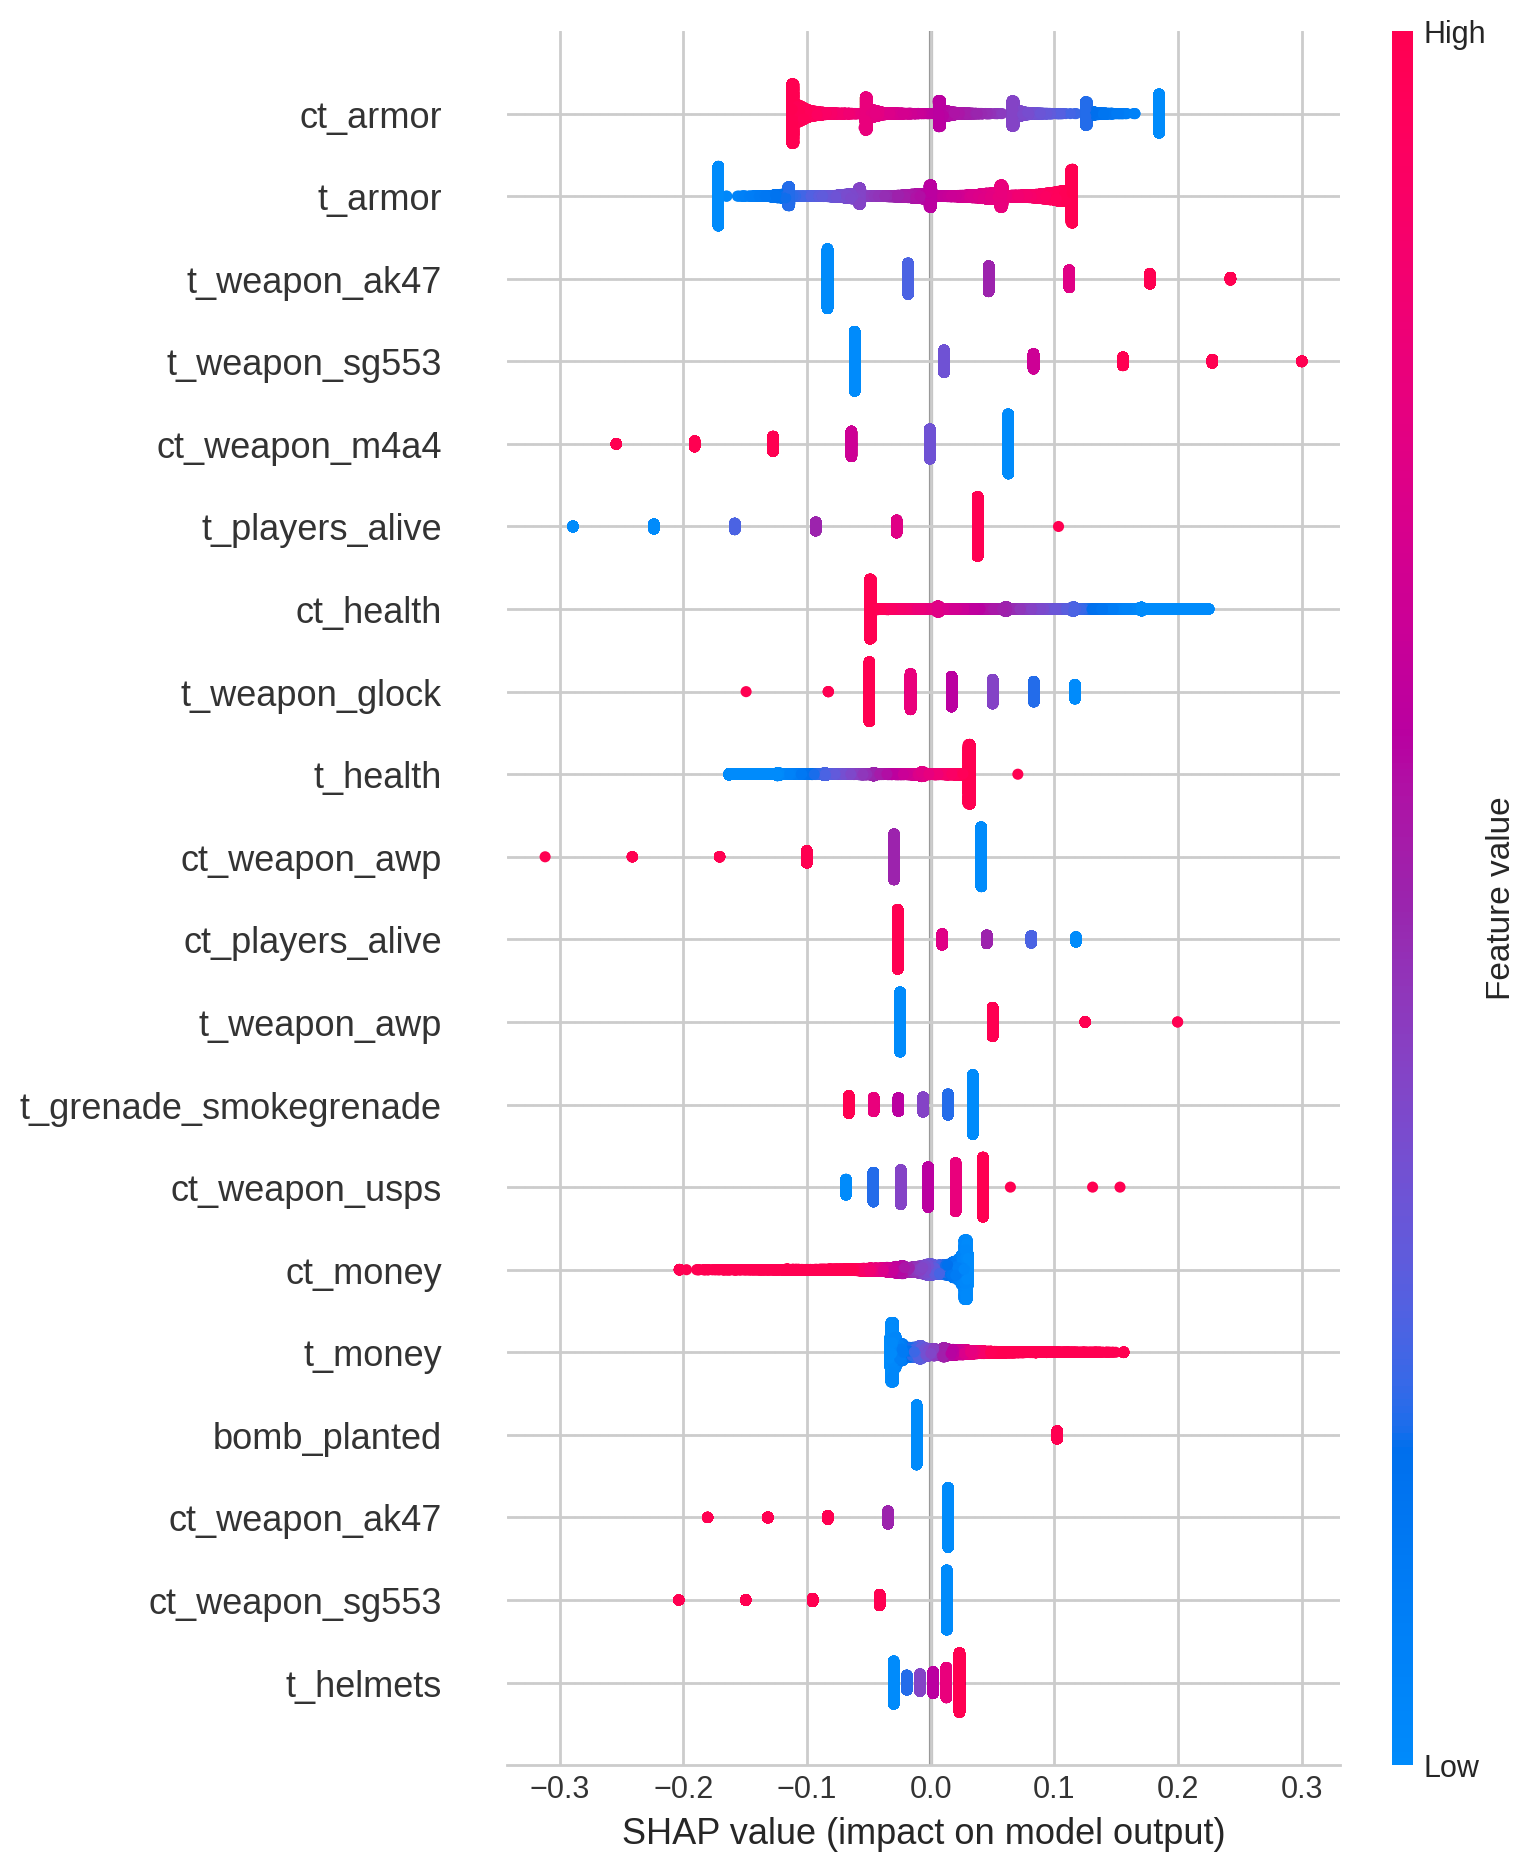

In [ ]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

SHAP library to create a force plot that explains the output of a machine learning model for a specific instance (X_test.iloc[10,:]).

The shap.initjs() function initializes the SHAP javascript visualization library.

In [ ]:
# plot the SHAP values for the 10th observation 

shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[10,:], X_test.iloc[10,:]) 

The pipeline performs the following steps:

Splits the data into training and testing sets using train_test_split function.

Identifies the categorical and numerical features from the training data.

Uses DataFrameMapper to apply preprocessing steps to the numerical and categorical features separately.

Defines a machine learning model, in this case a random forest regressor.

Defines an evaluation function evaluate that calculates the mean absolute error (MAE) between the predicted and true values.

Defines a scikit-learn Pipeline object that applies the preprocessing steps to the data and then fits the model.

Fits the pipeline to the training data.

Evaluates the performance of the trained model on the training data using MAE and prints the result.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train2, y_train2)

train_mae = evaluate(X_train2, y_train2, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}")

train MAE = 0.076


In [ ]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_test2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_test2, y_test2)

test_mae = evaluate(X_test2, y_test2, reg=pipeline)
print(f"test MAE = {round(test_mae, 3)}")

test MAE = 0.071


In [ ]:
#installing treeinterpreter
! pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This code trains a Random Forest Regressor model on the training data using scikit-learn's RandomForestRegressor.

After fitting the model, the code prints the R-squared scores for the model's performance on the training and testing data.

The score method of the trained RandomForestRegressor model calculates the R-squared score which is a statistical measure of how well the model fits the data. It ranges from 0 to 1, with higher values indicating a better fit.

The output of this code gives an indication of how well the model is able to generalize to new, unseen data based on its performance on the test data. A high R-squared score on both the training and testing data indicates that the model is likely to perform well on new data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter as ti

rand_forest = RandomForestRegressor()
rand_forest.fit(X_train2, y_train2)

print("Test  R^2 Score : %.2f"%rand_forest.score(X_test2, y_test2))
print("Train R^2 Score : %.2f"%rand_forest.score(X_train2, y_train2))

Test  R^2 Score : 0.38
Train R^2 Score : 0.95


This code is used to plot the feature importance of a trained machine learning model reg, specifically for a regression problem.

First, it sorts the features in ascending order of their importance using the argsort method on the feature importances returned by the model.

Next, it concatenates the numerical and categorical features into a single list called features.

Then, it creates a list of tuples containing each feature and its corresponding importance. It sorts this list in descending order of importance using sorted and the key argument.

Finally, it uses matplotlib to create a horizontal bar chart of the feature importances. The y-axis shows the features, while the x-axis shows their corresponding importances. The bar chart is sorted in ascending order of importance to help identify the most important features.

<BarContainer object of 79 artists>

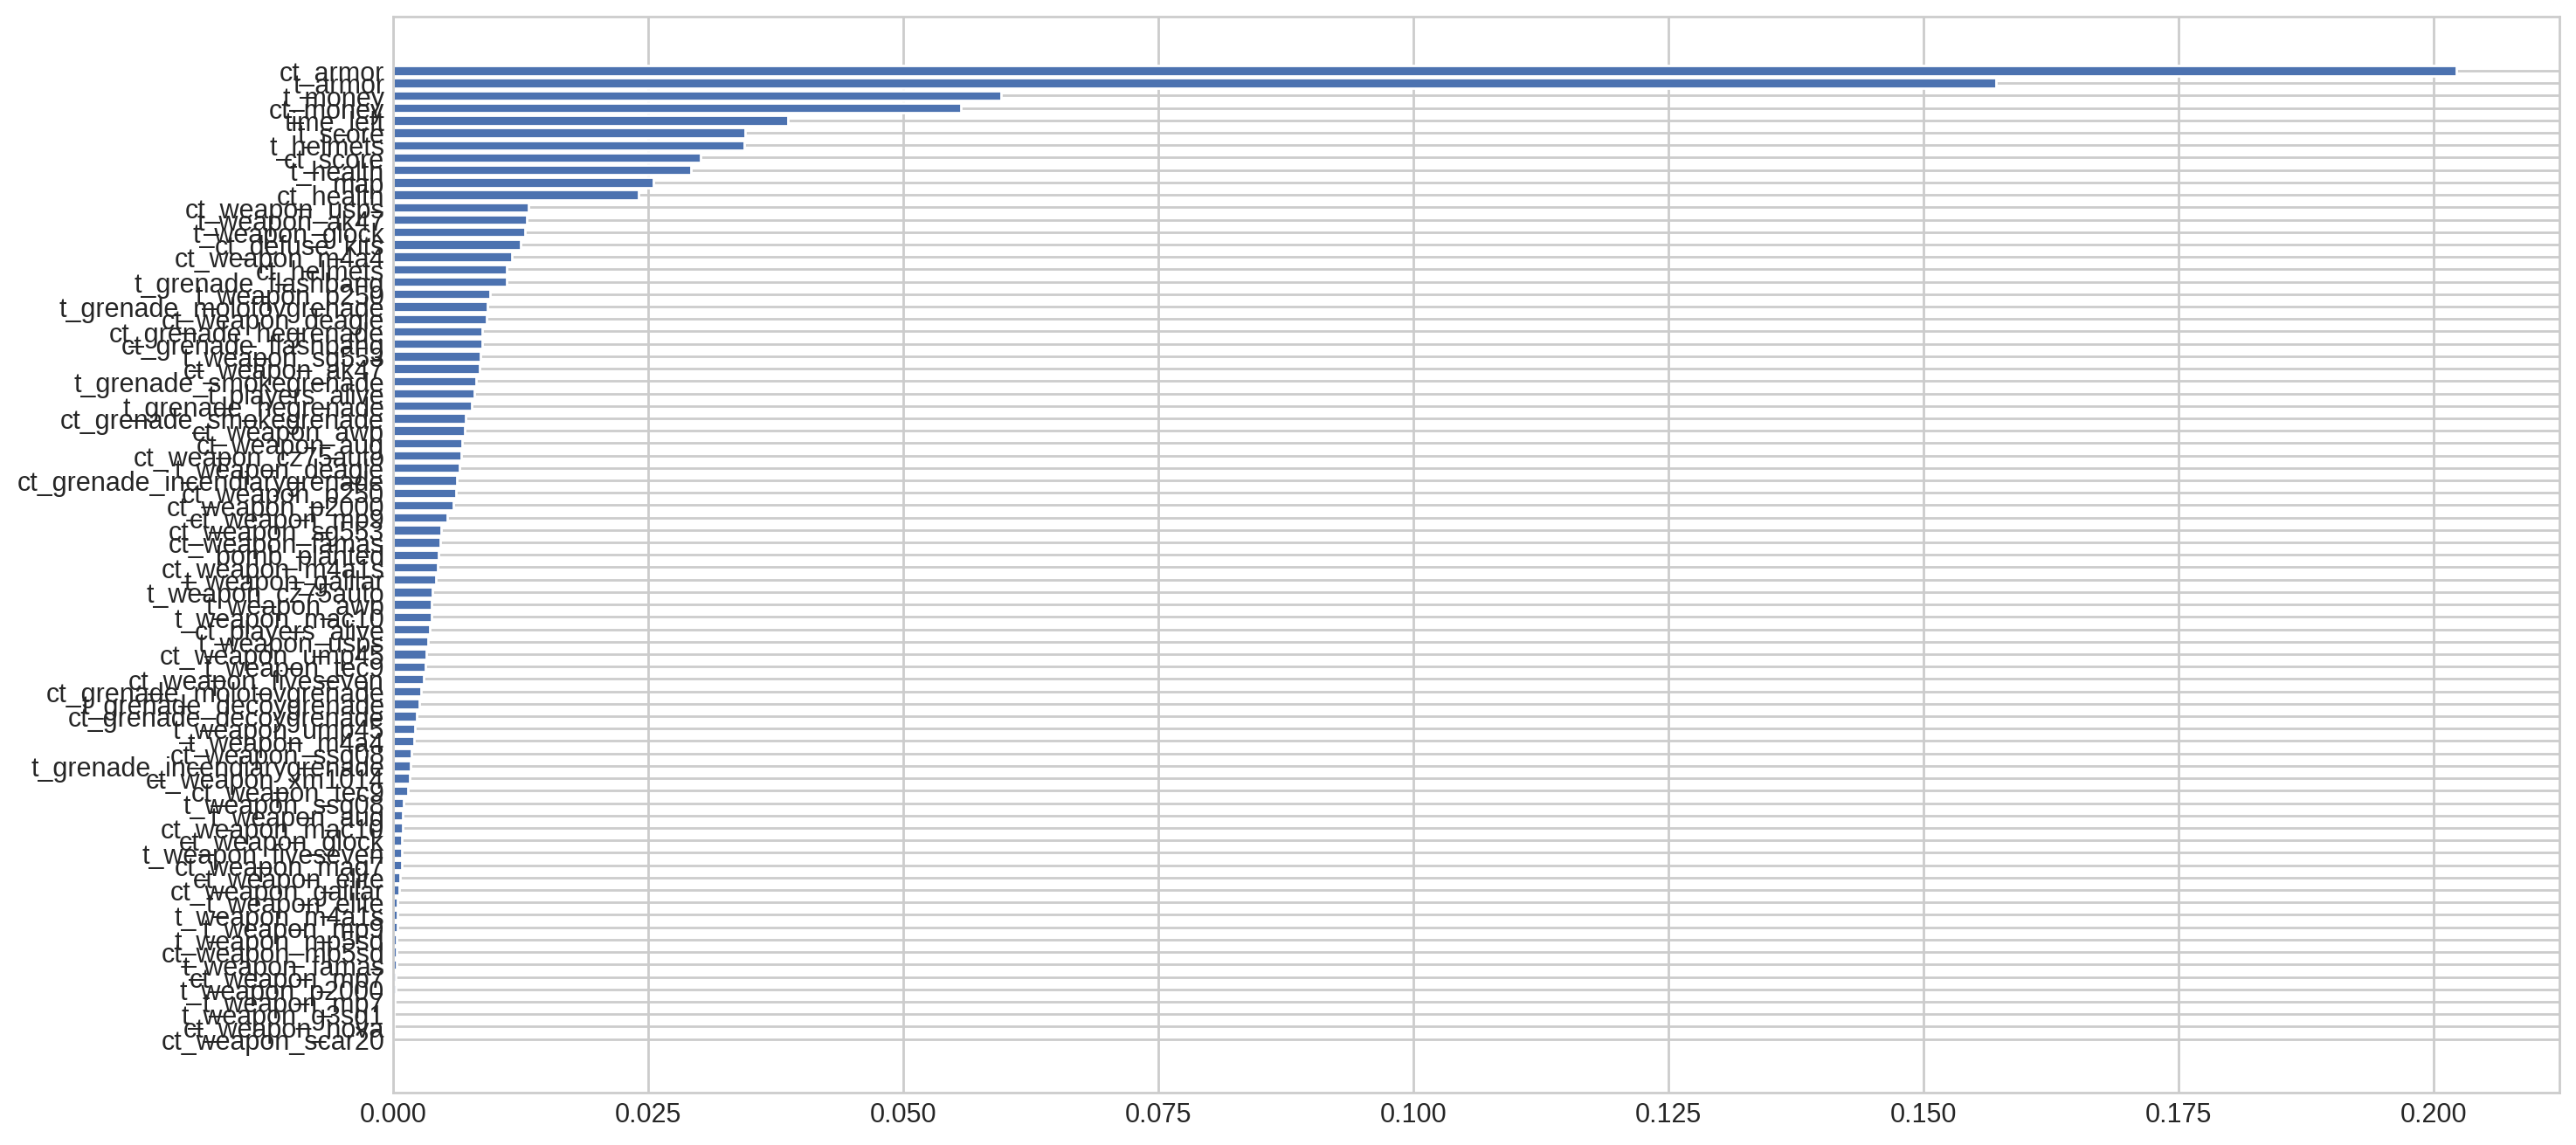

In [ ]:
#looking for Feature importance 
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [ ]:
datac = pd.get_dummies(data)

In [ ]:
datac2 = datac.copy(deep=True)

In [ ]:
datac2

time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
0          175.00         0        0    1             0        500       500   
1          156.03         0        0    1             0        500       500   
2           96.03         0        0    1             0        391       400   
3           76.03         0        0    1             0        391       400   
4          174.97         1        0    1             0        500       500   
...           ...       ...      ...  ...           ...        ...       ...   
122405      15.41        11       14    6             1        200       242   
122406     174.93        11       15    6             0        500       500   
122407     114.93        11       15    6             0        500       500   
122408      94.93        11       15    6             0        500       500   
122409      74.93        11       15    6             0        375       479   

        ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0              0        0      4000  ...                    0   
1            400      300       600  ...                    0   
2            294      200       750  ...                    0   
3            294      200       750  ...                    0   
4            192        0     18350  ...                    0   
...          ...      ...       ...  ...                  ...   
122405       195      359       100  ...                    2   
122406        95      175     11500  ...                    2   
122407       495      475      1200  ...                    4   
122408       495      475      1200  ...                    5   
122409       395      466      1100  ...                    3   

        ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                             0                       0   
1                             0                       2   
2                             0                       2   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
122405                        1                       1   
122406                        1                       0   
122407                        3                       5   
122408                        0                       3   
122409                        0                       2   

        ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   
...                              ...                          ...   
122405                             0                            0   
122406                             0                            0   
122407                             1                            0   
122408                             0                            0   
122409                             0                            0   

        ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
122405                          0                         0   
122406                          0                         0   
122407                          0                         5   
122408                          0                         4   
122409                          0  

In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y2 = y
datac2.drop(['round_winner'],axis=1,inplace=True)
x2 = datac2.copy(deep=True)

In [ ]:
#creating training and test data split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=False)
#setting my model as Random forest classifier.
my_model = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)

## Final Takeaways

The performance reports for our leading machine learning model - XG_BOOST show that it performed reasonably well on the test data, with an MSE of 0.102 and an RMSE of 0.320. While the model's MAE and RMSLE scores were also good, there is room for improvement in terms of its Mean Residual Deviance. Overall, the model met our project goals. Further analysis showed that the model's strengths include its ability to accurately predict the target variable for some features, while its weaknesses include its struggles with other features.

## Learning Outcomes

I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning

Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc


Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks

Model Interpretation(Unboxing the Black Blox) is the best takeaway from the series of this assignments. SHAP have made it easier to understand what made a model to predict a outcome.

## References

https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

https://www.kaggle.com/code/cristianlazoquispe/automl-h2o-shap-explanation/notebook

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://publications.lib.chalmers.se/records/fulltext/256129/256129.pdf

https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/code

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

## MIT License

MIT License

Copyright (c) 2023 Sri Krishna Karumanchi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.